<a href="https://colab.research.google.com/github/Sabah-Khan/DW/blob/main/Sentiment_Analysis_Website_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is a Sentiment Analysis of Dr. Will's wesbite and retailer reviews.

# Table of Contents

- [Install Libraries](#install-libraries)
- [Data Preparation](#data-preparation)
  - [Yotpo Reviews](#yotpo-reviews)
  - [External Reviews : Tesco, Ocado and Waitrose](#external-reviews--tesco-ocado-and-waitrose)
  - [Combine Yotpo + External Reviews for complete dataset](#combine-yotpo--external-reviews-for-complete-dataset)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
  - [Yotpo Sentiment Score distribution](#yotpo-sentiment-score-distribution)
  - [Overall Distribution of Ratings](#overall-distribution-of-ratings)
  - [Sentiment Distribution Overview](#sentiment-distribution-overview)
- [NLP Sentiment Analysis](#nlp-sentiment-analysis)
  - [Data Preprocessing](#data-preprocessing)
- [Sentiment Analysis using VADER](#sentiment-analysis-using-vader)
- [Sentiment Breakdown by VADER](#sentiment-breakdown-by-vader)
- [Data Visualisation](#data-visualisation)
  - [Platform Based Sentiment Analysis](#platform-based-sentiment-analysis)
- [Product Level Sentiment Analysis](#product-level-sentiment-analysis)
  - [Sentiment Analysis by Time](#sentiment-analysis-by-time)
- [TF-IDF & N-Grams](#tf-idf--n-grams)
  - [TF-IDF by Platform (Postive Reviews)](#tf-idf-by-platform-postive-reviews)
  - [TF-IDF by Platform (Negative Reviews & Neutral Reviews)](#tf-idf-by-platform-negative-reviews--neutral-reviews)
  - [Export TF-IDF for Tableau](#export-tf-idf-for-tableau)
  - [TF-IDF by Product](#tf-idf-by-product)
  - [N-Grams of Postive, Negative and Neutral Comments](#n-grams-of-postive-negative-and-neutral-comments)
    - [Postive Bigram](#postive-bigram)
    - [Top 5 Postive Bigram by Time](#top-5-postive-bigram-by-time)
    - [Negative Bigram](#negative-bigram)
    - [Neutral Bigram](#neutral-bigram)
    - [Top 5 Negative & Neutral Comments by Time](#top-5-negative--neutral-comments-by-time)
  - [N-grams by Product Group](#n-grams-by-product-group)
    - [Postive Comments](#postive-comments)
    - [Negative Comments](#negative-comments)
    - [Neutral Comments](#neutral-comments)
  - [Trigrams of Postive, Negative and Neutral Reviews](#trigrams-of-postive-negative-and-neutral-reviews)
    - [Postive Trigram](#postive-trigram)
    - [Negative Trigrams](#negative-trigrams)
    - [Neutral Trigrams](#neutral-trigrams)
    - [Postive Trigrams by Time](#postive-trigrams-by-time)
    - [Negative + Neutral Trigrams by Time](#negative--neutral-trigrams-by-time)
  - [N-gram by Product Group](#n-gram-by-product-group)
    - [Postive Trigram by Product](#postive-trigram-by-product)
    - [Negative Trigram by Product](#negative-trigram-by-product)
    - [Neutral Trigram by Product](#neutral-trigram-by-product)
- [Theme Analysis](#theme-analysis)
- [Net Promoter Score & Star Ratings](#net-promoter-score--star-ratings)
  - [NPS = % Promoters - % Detractors](#nps--promoters---detractors)
  - [NPS by Product Group](#nps-by-product-group)
  - [NPS by Platform](#nps-by-platform)
  - [STAR Rating](#star-rating)
- [Time Analysis](#time-analysis)
  - [Number of reviews per month](#number-of-reviews-per-month)
  - [Monthly average sentiment over time](#monthly-average-sentiment-over-time)
  - [Rolling Average](#rolling-average)
  - [Sentiment Trend by Product over time](#sentiment-trend-by-product-over-time)
- [Sentiment + NPS Trend by Product](#sentiment--nps-trend-by-product)
- [Season Decomposition](#season-decomposition)
- [In-Depth Theme Analysis](#in-depth-theme-analysis)
  - [Time Trend of Problem Reviews](#time-trend-of-problem-reviews)
    - [Trend of Problem Reviews by Theme](#trend-of-problem-reviews-by-theme)
    - [Top Product Groups with Most Problem Reviews](#top-product-groups-with-most-problem-reviews)
    - [Problem Theme Distribution as Pie Chart](#problem-theme-distribution-as-pie-chart)
- [Google Trends](#google-trends)
  - [What are people searching in health condiments?](#what-are-people-searching-in-health-condiments)
  - [How does Dr. Will’s range compare to search interest?](#how-does-dr-wills-range-compare-to-search-interest)


## Install Libraries


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import html
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from ipywidgets import interact, widgets
import plotly.graph_objects as go
from sklearn.feature_extraction.text import TfidfVectorizer
import ipywidgets as widgets
from IPython.display import display

## Data Preparation

### Yotpo Reviews

In [57]:
df_yotpo = pd.read_csv('/content/Yotpo Reviews copy.csv')
df_yotpo.head()

app_key  Review ID Review Creation Date  \
0  m8haUpltDsBafOcODlduyCApOhqNnWXKZFanlc1I  708305901     10/05/2025 22:56   
1  m8haUpltDsBafOcODlduyCApOhqNnWXKZFanlc1I  707537715     10/05/2025 12:15   
2  m8haUpltDsBafOcODlduyCApOhqNnWXKZFanlc1I  706975012     10/05/2025 06:57   
3  m8haUpltDsBafOcODlduyCApOhqNnWXKZFanlc1I  706760398     09/05/2025 21:09   
4  m8haUpltDsBafOcODlduyCApOhqNnWXKZFanlc1I  705102399     07/05/2025 11:37   

      Review Type Review Status Status Details             Review Source  \
0  product_review     Published            NaN                 widget_v2   
1  product_review     Published            NaN                  reminder   
2  product_review     Published            NaN                  reminder   
3     site_review     Published            NaN  review_request_link_site   
4  product_review     Published            NaN                  reminder   

   Review Score               Review Title  \
0             3  Wish it was seed oil free   
1             5              No going back   
2             5     Avocado oil mayonnaise   
3             5                   Avo mayo   
4             5        Classic mayo winner   

                                      Review Content  ...  \
0  It is made with seed oils - rapeseed oil. What...  ...   
1  We swapped our normal big brand mayo to Japane...  ...   
2  I really like your mayonnaise although I would...  ...   
3  Superb product delicious and healthy! \nAnd ex...  ...   
4  Most majors are tangy and I&#x27;ve never been...  ...   

                     Product Handle Product Group Product Category  \
0  dr-wills-chipotle-ranch-dressing           NaN              NaN   
1         dr-wills-avocado-oil-mayo           NaN              NaN   
2         dr-wills-avocado-oil-mayo           NaN              NaN   
3                               NaN           NaN              NaN   
4             dr-wills-classic-mayo           NaN              NaN   

  Product UPC  Product SKU  Product Brand Product MPN Product ISBN  \
0         NaN         125s            NaN         NaN          NaN   
1         NaN          68s            NaN         NaN          NaN   
2         NaN          68s            NaN         NaN          NaN   
3         NaN          NaN            NaN         NaN          NaN   
4         NaN         120s            NaN         NaN          NaN   

   Incentivized Flag                                  Metaobject handle  
0                NaN  eb7dfd7d-db44-4334-bc49-c893b51b36cf-4bc9996f-...  
1                NaN                                                NaN  
2                NaN                                                NaN  
3                NaN                                                NaN  
4                NaN  eb7dfd7d-db44-4334-bc49-c893b51b36cf-c03b8e11-...  

[5 rows x 45 columns]

In [58]:
df_yotpo.info()           # Data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   app_key                 653 non-null    object 
 1   Review ID               653 non-null    int64  
 2   Review Creation Date    653 non-null    object 
 3   Review Type             653 non-null    object 
 4   Review Status           653 non-null    object 
 5   Status Details          6 non-null      object 
 6   Review Source           653 non-null    object 
 7   Review Score            653 non-null    int64  
 8   Review Title            628 non-null    object 
 9   Review Content          653 non-null    object 
 10  Sentiment Score         653 non-null    float64
 11  Profanity Flag          10 non-null     object 
 12  Published Image URLs    1 non-null      object 
 13  Unpublished Image URLs  5 non-null      object 
 14  Published Video URLs    0 non-null      fl

In [59]:
df_yotpo.describe() #describe

Review ID  Review Score  Sentiment Score  Published Video URLs  \
count  6.530000e+02    653.000000       653.000000                   0.0   
mean   4.503290e+08      4.626340         0.838877                   NaN   
std    1.802787e+08      0.992941         0.304696                   NaN   
min    5.571935e+07      1.000000        -1.000000                   NaN   
25%    2.466468e+08      5.000000         0.921237                   NaN   
50%    4.988441e+08      5.000000         0.979024                   NaN   
75%    6.132865e+08      5.000000         0.988550                   NaN   
max    7.083059e+08      5.000000         0.996541                   NaN   

       Unpublished Video URLs  Comment Public  Review Tags   Thumbs Up  \
count                     0.0           280.0          0.0  653.000000   
mean                      NaN             1.0          NaN    0.139357   
std                       NaN             0.0          NaN    0.483340   
min                       NaN             1.0          NaN    0.000000   
25%                       NaN             1.0          NaN    0.000000   
50%                       NaN             1.0          NaN    0.000000   
75%                       NaN             1.0          NaN    0.000000   
max                       NaN             1.0          NaN    6.000000   

       Thumbs Down     Order ID  Pushed to Social  Product Group  \
count   653.000000   379.000000               0.0            0.0   
mean      0.091884  5571.387863               NaN            NaN   
std       0.443921  2159.831679               NaN            NaN   
min       0.000000  1146.000000               NaN            NaN   
25%       0.000000  3827.500000               NaN            NaN   
50%       0.000000  5873.000000               NaN            NaN   
75%       0.000000  7273.500000               NaN            NaN   
max       9.000000  9227.000000               NaN            NaN   

       Product Category   Product UPC  Product Brand  Product MPN  \
count               0.0  4.300000e+01            0.0          0.0   
mean                NaN  7.832203e+11            NaN          NaN   
std                 NaN  1.878544e+10            NaN          NaN   
min                 NaN  7.065020e+11            NaN          NaN   
25%                 NaN  7.870999e+11            NaN          NaN   
50%                 NaN  7.870999e+11            NaN          NaN   
75%                 NaN  7.870999e+11            NaN          NaN   
max                 NaN  7.930521e+11            NaN          NaN   

       Product ISBN  Incentivized Flag  
count           0.0                0.0  
mean            NaN                NaN  
std             NaN                NaN  
min             NaN                NaN  
25%             NaN                NaN  
50%             NaN                NaN  
75%             NaN                NaN  
max             NaN                NaN

In [60]:
df_yotpo.columns #columns

Index(['app_key', 'Review ID', 'Review Creation Date', 'Review Type',
       'Review Status', 'Status Details', 'Review Source', 'Review Score',
       'Review Title', 'Review Content', 'Sentiment Score', 'Profanity Flag',
       'Published Image URLs', 'Unpublished Image URLs',
       'Published Video URLs', 'Unpublished Video URLs', 'Comment Date',
       'Comment Content', 'Comment Public', 'Review Tags', 'Thumbs Up',
       'Thumbs Down', 'Order ID', 'Order Date', 'Pushed to Social',
       'Reviewer Display Name', 'Reviewer Email', 'Reviewer Type',
       'Reviewer Country', 'Reviewer Device Type', 'Product ID',
       'Product Title', 'Product Description', 'Product URL',
       'Product Image URL', 'Product Handle', 'Product Group',
       'Product Category', 'Product UPC', 'Product SKU', 'Product Brand',
       'Product MPN', 'Product ISBN', 'Incentivized Flag',
       'Metaobject handle'],
      dtype='object')

In [61]:
df_yotpo.isnull().sum() #missing values

app_key                     0
Review ID                   0
Review Creation Date        0
Review Type                 0
Review Status               0
Status Details            647
Review Source               0
Review Score                0
Review Title               25
Review Content              0
Sentiment Score             0
Profanity Flag            643
Published Image URLs      652
Unpublished Image URLs    648
Published Video URLs      653
Unpublished Video URLs    653
Comment Date              373
Comment Content           373
Comment Public            373
Review Tags               653
Thumbs Up                   0
Thumbs Down                 0
Order ID                  274
Order Date                274
Pushed to Social          653
Reviewer Display Name       0
Reviewer Email              0
Reviewer Type               0
Reviewer Country           59
Reviewer Device Type      124
Product ID                  0
Product Title               0
Product Description        69
Product URL                69
Product Image URL          71
Product Handle             77
Product Group             653
Product Category          653
Product UPC               610
Product SKU                71
Product Brand             653
Product MPN               653
Product ISBN              653
Incentivized Flag         653
Metaobject handle         573
dtype: int64

In [62]:
# view column names

df_yotpo = df_yotpo[[
    'Review Creation Date',
    'Review Score',
    'Review Content',
    'Product Title',
    'Sentiment Score'
]].copy()

# rename column names for simplicity

df_yotpo.columns = [
    'date',
    'rating',
    'comment',
    'product',
    'yotpo_sentiment'
]

In [63]:
df_yotpo['source'] = 'Yotpo'

In [64]:
df_yotpo.head()

date  rating  \
0  10/05/2025 22:56       3   
1  10/05/2025 12:15       5   
2  10/05/2025 06:57       5   
3  09/05/2025 21:09       5   
4  07/05/2025 11:37       5   

                                             comment  \
0  It is made with seed oils - rapeseed oil. What...   
1  We swapped our normal big brand mayo to Japane...   
2  I really like your mayonnaise although I would...   
3  Superb product delicious and healthy! \nAnd ex...   
4  Most majors are tangy and I&#x27;ve never been...   

                              product  yotpo_sentiment source  
0  Dr. Will's Chipotle Ranch Dressing         0.952684  Yotpo  
1   Dr. Will's Avocado Oil Mayonnaise         0.710523  Yotpo  
2   Dr. Will's Avocado Oil Mayonnaise         0.461072  Yotpo  
3             http://www.dr-wills.com         0.992493  Yotpo  
4             Dr. Will's Classic Mayo         0.428422  Yotpo

In [65]:
 # some products are listed as link this is to see how many of those are not product based
df_yotpo['product'].value_counts(dropna=False)

product
http://www.dr-wills.com                       69
Dr. Will's Tomato Ketchup                     54
Dr. Will's BBQ Sauce                          41
Dr. Will's Classic Mayonnaise                 38
Dr. Will's Avocado Oil Mayonnaise             37
Dr. Will‚Äôs Squeezy Tomato Ketchup           36
Dr. Will's Vegan Mayonnaise                   29
Dr. Will's Ketchup & Mayo Pack                28
Dr. Will's Ketchup & BBQ Sauce Pack           28
Dr. Will's Squeezy Sriracha                   23
Dr. Will's Sriracha Mayonnaise                22
Dr. Will‚Äôs Squeezy Barbecue Sauce           21
Dr. Will's Sriracha                           20
Dr. Will's Jalape√±o Hot Sauce                16
Swap Box                                      15
Dr. Will's Chilli Mayo                        15
Dr. Will's Classic Mayo                       14
Dr. Will's Mayonnaise Selection Pack          14
Ketchup 2 Pack                                11
Dr. Will's The Full House (Do not use)        11
Dr. Will's Miso Tahini                        10
Dr. Will's Beetroot Ketchup                   10
Dr. Will's Tomato Ketchup Triple Pack          9
Ketchup and Barbecue 2 Pack                    8
Dr. Will's Sriracha Squeezy 270g               8
Dr. Will's Sweet Chilli Sauce                  8
Dr. Will's Sweet Mango Sriracha                7
Dr. Will's The Squeezy Selection               6
Dr. Will's Condiment Selection                 6
Dr. Will's Caesar Dressing                     5
Dr. Will's THIS Isn't Bacon Ketchup            4
Dr. Will's Buffalo Hot Sauce                   4
Dr. Will's Must-Haves Set                      2
Dr Will&#x27;s BBQ Sauce Sachets - 30          2
Avocado Oil Mayonnaise 2 Pack                  2
Dr. Will's Sriracha and BBQ Pack               2
Dr Will's Mayonnaise Gift Set                  2
Dr Will&#x27;s Taster Pack                     2
Dr. Will's Vegan Pack (Do not use)             2
Dr. Will's Chipotle Ranch Dressing             1
Dr. Will's Great Taste Award Winners Pack      1
Sriracha Hot Sauce 2 Pack                      1
Dr. Will's Scorcher Set                        1
Dr. Will's Squeezy Essentials                  1
Barbecue Sauce 2 Pack                          1
Dr. Will's Dip Pot BBQ Sauce                   1
Dr. Will's Great Taste Award Winning Pack      1
Dr Will&#x27;s Classic Mayonnaise              1
Dr Will&#x27;s Tote Bag                        1
Dr Will&#x27;s Tomato Ketchup Sachets - 30     1
Dr Will&#x27;s Logo Jumper                     1
Name: count, dtype: int64

In [66]:
# view dataset
df_yotpo.head()

date  rating  \
0  10/05/2025 22:56       3   
1  10/05/2025 12:15       5   
2  10/05/2025 06:57       5   
3  09/05/2025 21:09       5   
4  07/05/2025 11:37       5   

                                             comment  \
0  It is made with seed oils - rapeseed oil. What...   
1  We swapped our normal big brand mayo to Japane...   
2  I really like your mayonnaise although I would...   
3  Superb product delicious and healthy! \nAnd ex...   
4  Most majors are tangy and I&#x27;ve never been...   

                              product  yotpo_sentiment source  
0  Dr. Will's Chipotle Ranch Dressing         0.952684  Yotpo  
1   Dr. Will's Avocado Oil Mayonnaise         0.710523  Yotpo  
2   Dr. Will's Avocado Oil Mayonnaise         0.461072  Yotpo  
3             http://www.dr-wills.com         0.992493  Yotpo  
4             Dr. Will's Classic Mayo         0.428422  Yotpo

In [67]:
df_yotpo.shape
df_yotpo.isnull().any(axis=1).sum()
df_yotpo.isnull().sum()

date               0
rating             0
comment            0
product            0
yotpo_sentiment    0
source             0
dtype: int64

In [68]:
import html
df_yotpo['product'] = df_yotpo['product'].apply(lambda x: html.unescape(str(x)).strip())

In [69]:
# replace any product entry that looks like a URL with "General Feedback"
df_yotpo['product'] = df_yotpo['product'].apply(
    lambda x: "General Feedback" if isinstance(x, str) and 'http' in x.lower() else x
)
df_yotpo.head()

date  rating  \
0  10/05/2025 22:56       3   
1  10/05/2025 12:15       5   
2  10/05/2025 06:57       5   
3  09/05/2025 21:09       5   
4  07/05/2025 11:37       5   

                                             comment  \
0  It is made with seed oils - rapeseed oil. What...   
1  We swapped our normal big brand mayo to Japane...   
2  I really like your mayonnaise although I would...   
3  Superb product delicious and healthy! \nAnd ex...   
4  Most majors are tangy and I&#x27;ve never been...   

                              product  yotpo_sentiment source  
0  Dr. Will's Chipotle Ranch Dressing         0.952684  Yotpo  
1   Dr. Will's Avocado Oil Mayonnaise         0.710523  Yotpo  
2   Dr. Will's Avocado Oil Mayonnaise         0.461072  Yotpo  
3                    General Feedback         0.992493  Yotpo  
4             Dr. Will's Classic Mayo         0.428422  Yotpo

In [70]:
df_yotpo['product'].value_counts()

product
General Feedback                             69
Dr. Will's Tomato Ketchup                    54
Dr. Will's BBQ Sauce                         41
Dr. Will's Classic Mayonnaise                38
Dr. Will's Avocado Oil Mayonnaise            37
Dr. Will‚Äôs Squeezy Tomato Ketchup          36
Dr. Will's Vegan Mayonnaise                  29
Dr. Will's Ketchup & Mayo Pack               28
Dr. Will's Ketchup & BBQ Sauce Pack          28
Dr. Will's Squeezy Sriracha                  23
Dr. Will's Sriracha Mayonnaise               22
Dr. Will‚Äôs Squeezy Barbecue Sauce          21
Dr. Will's Sriracha                          20
Dr. Will's Jalape√±o Hot Sauce               16
Swap Box                                     15
Dr. Will's Chilli Mayo                       15
Dr. Will's Classic Mayo                      14
Dr. Will's Mayonnaise Selection Pack         14
Ketchup 2 Pack                               11
Dr. Will's The Full House (Do not use)       11
Dr. Will's Miso Tahini                       10
Dr. Will's Beetroot Ketchup                  10
Dr. Will's Tomato Ketchup Triple Pack         9
Ketchup and Barbecue 2 Pack                   8
Dr. Will's Sriracha Squeezy 270g              8
Dr. Will's Sweet Chilli Sauce                 8
Dr. Will's Sweet Mango Sriracha               7
Dr. Will's The Squeezy Selection              6
Dr. Will's Condiment Selection                6
Dr. Will's Caesar Dressing                    5
Dr. Will's THIS Isn't Bacon Ketchup           4
Dr. Will's Buffalo Hot Sauce                  4
Dr. Will's Must-Haves Set                     2
Dr Will's BBQ Sauce Sachets - 30              2
Avocado Oil Mayonnaise 2 Pack                 2
Dr. Will's Sriracha and BBQ Pack              2
Dr Will's Mayonnaise Gift Set                 2
Dr Will's Taster Pack                         2
Dr. Will's Vegan Pack (Do not use)            2
Dr. Will's Chipotle Ranch Dressing            1
Dr. Will's Great Taste Award Winners Pack     1
Sriracha Hot Sauce 2 Pack                     1
Dr. Will's Scorcher Set                       1
Dr. Will's Squeezy Essentials                 1
Barbecue Sauce 2 Pack                         1
Dr. Will's Dip Pot BBQ Sauce                  1
Dr. Will's Great Taste Award Winning Pack     1
Dr Will's Classic Mayonnaise                  1
Dr Will's Tote Bag                            1
Dr Will's Tomato Ketchup Sachets - 30         1
Dr Will's Logo Jumper                         1
Name: count, dtype: int64

In [71]:
# map products to the product group
product_mapping = {
    # Tomato Ketchup
    "Dr. Will's Tomato Ketchup": "Tomato Ketchup",
    "Dr. Will‚Äôs Squeezy Tomato Ketchup": "Tomato Ketchup",
    "Dr. Will's Tomato Ketchup Triple Pack": "Tomato Ketchup",

    # BBQ Sauce
    "Dr. Will's BBQ Sauce": "BBQ Sauce",
    "Dr. Will‚Äôs Squeezy Barbecue Sauce": "BBQ Sauce",

    # Mayonnaise
    "Dr. Will's Classic Mayonnaise": "Classic Mayo",
    "Dr. Will's Classic Mayo": "Classic Mayo",
    "Dr Will&#x27;s Classic Mayonnaise": "Classic Mayo",

    # Vegan Mayonnaise
    "Dr. Will's Vegan Mayonnaise": "Vegan Mayo",

    # Avo Mayo
    "Dr. Will's Avocado Oil Mayonnaise": "Avocado Mayo",

    # Sriracha Mayo
    "Dr. Will's Sriracha Mayonnaise": "Sriracha Mayo",

    # Sriracha Hot Sauce
    "Dr. Will's Sriracha": "Sriracha Hot Sauce",
    "Dr. Will's Squeezy Sriracha": "Sriracha Hot Sauce",


    # Jalapeno Hot Sauces
    "Dr. Will's Jalape√±o Hot Sauce": "Jalapeño Hot Sauce",

    # Buffalo Hot Sauces
    "Dr. Will's Buffalo Hot Sauce": "Buffalo Hot Sauce",

    # Specialty Sauces
    "Dr. Will's Beetroot Ketchup": "Specialty Sauces",
    "Dr. Will's Sweet Chilli Sauce": "Specialty Sauces",
    "Dr. Will's Sweet Mango Sriracha": "Specialty Sauces",
    "Dr. Will's Miso Tahini": "Specialty Sauces",
    "Dr. Will's THIS Isn't Bacon Ketchup": "Specialty Sauces",

    #  Caesar Dressings
    "Dr. Will's Caesar Dressing": "Caesar Dressing",

    # Chipotle Dressings
    "Dr. Will's Chipotle Ranch Dressing": "Chipotle Ranch",

    # Combo Packs
    "Dr. Will's Ketchup & Mayo Pack": "Combo Pack",
    "Dr. Will's Ketchup & BBQ Sauce Pack": "Combo Pack",
    "Dr. Will's Sriracha and BBQ Pack": "Combo Pack",
    "Dr. Will's Mayonnaise Selection Pack": "Combo Pack",
    "Ketchup 2 Pack": "Combo Pack",
    "Ketchup and Barbecue 2 Pack": "Combo Pack",
    "Dr. Will's The Squeezy Selection": "Combo Pack",
    "Dr. Will's Condiment Selection": "Combo Pack",
    "Dr Will&#x27;s Mayonnaise Gift Set": "Combo Pack",
    "Dr. Will's Great Taste Award Winners Pack": "Combo Pack",
    "Dr. Will's Great Taste Award Winning Pack": "Combo Pack",
    "Dr. Will's Must-Haves Set": "Combo Pack",

    # Irrelevant (to be removed)
    "Swap Box": None,
    "Dr. Will's The Full House (Do not use)": None,
    "Dr. Will's Vegan Pack (Do not use)": None,
    "Dr Will&#x27;s Taster Pack": None,
    "Dr Will&#x27;s Tote Bag": None,
    "Dr Will&#x27;s Logo Jumper": None,
}

In [72]:
df_yotpo.head(3)

date  rating  \
0  10/05/2025 22:56       3   
1  10/05/2025 12:15       5   
2  10/05/2025 06:57       5   

                                             comment  \
0  It is made with seed oils - rapeseed oil. What...   
1  We swapped our normal big brand mayo to Japane...   
2  I really like your mayonnaise although I would...   

                              product  yotpo_sentiment source  
0  Dr. Will's Chipotle Ranch Dressing         0.952684  Yotpo  
1   Dr. Will's Avocado Oil Mayonnaise         0.710523  Yotpo  
2   Dr. Will's Avocado Oil Mayonnaise         0.461072  Yotpo

In [73]:
df_yotpo.shape

(653, 6)

In [74]:
# Map messy product names to clean group names
df_yotpo['product_group'] = df_yotpo['product'].map(product_mapping)

# Keep only rows with valid product_group (remove None, irrelevant, etc.)
df_yotpo = df_yotpo[df_yotpo['product_group'].notna()]

# Final filter: keep only current products from the website
valid_products = [

    'Tomato Ketchup',
    'BBQ Sauce',
    'Sriracha Hot Sauce',
    'Buffalo Hot Sauce',
    'Jalapeño Hot Sauce',
    'Beetroot Ketchup',
    'Sweet Chilli Sauce',
    'Caesar Dressing',
    'Chipotle Ranch',
    'Classic Mayo',
    'Vegan Mayo',
    'Avocado Mayo',
    'Sriracha Mayo'
]


df_yotpo = df_yotpo[df_yotpo['product_group'].isin(valid_products)]
df_yotpo.head(40)

date  rating  \
0   10/05/2025 22:56       3   
1   10/05/2025 12:15       5   
2   10/05/2025 06:57       5   
4   07/05/2025 11:37       5   
6   30/04/2025 16:01       5   
8   22/04/2025 10:51       5   
9   21/04/2025 16:52       4   
17  05/04/2025 13:24       2   
18  29/03/2025 07:59       5   
19  28/03/2025 17:59       5   
20  23/03/2025 15:42       1   
22  13/03/2025 16:58       3   
24  12/03/2025 07:13       1   
25  12/03/2025 07:11       4   
27  06/03/2025 09:53       5   
31  28/02/2025 15:54       5   
33  25/02/2025 18:11       5   
34  25/02/2025 18:11       4   
35  25/02/2025 18:10       5   
36  23/02/2025 10:19       1   
37  15/02/2025 09:40       5   
39  12/02/2025 12:39       5   
40  12/02/2025 12:38       5   
41  08/02/2025 04:35       5   
42  08/02/2025 04:17       5   
43  07/02/2025 08:21       5   
46  03/02/2025 21:34       5   
48  31/01/2025 13:19       5   
51  28/01/2025 09:14       5   
52  28/01/2025 09:13       3   
53  28/01/2025 09:12       3   
54  23/01/2025 21:57       5   
55  23/01/2025 21:56       5   
56  20/01/2025 21:03       5   
57  20/01/2025 20:58       5   
58  20/01/2025 20:57       5   
59  20/01/2025 20:57       5   
60  16/01/2025 18:21       5   
61  14/01/2025 18:18       5   
62  13/01/2025 20:02       5   

                                              comment  \
0   It is made with seed oils - rapeseed oil. What...   
1   We swapped our normal big brand mayo to Japane...   
2   I really like your mayonnaise although I would...   
4   Most majors are tangy and I&#x27;ve never been...   
6   Top stuff. Ideal for special diets and tastes ...   
8   Absolutely lovely flavour to the siracha mayo ...   
9   Only thing stopping it from being 5 star is be...   
17           Sadly not impressed as too sweet for me.   
18  The only one I can rely on not to be full of s...   
19  Always looking for healthier and tastier optio...   
20  I didn‚Äôt realise this Mayo has a very high c...   
22  Loved the taste but the nozzle/packaging desig...   
24                                      We love them!   
25                                     We love them!!   
27                             Best tomato sauce ever   
31  I like the classic mayonnaise which goes with ...   
33  One of the best ketchup i have had . infact it...   
34  Only reason it doesn&#x27;t get 5 stars is tha...   
35  Love this bbq sauce one of the best I have and...   
36  Wow what a lovely taste so smooth ,this is tas...   
37  Im salt intolerant so its perfect for me but t...   
39                        A very nice, tasty ketchup.   
40                 This is a lovely vegan mayonnaise.   
41  Delicious, reasonably priced for what it is an...   
42  The perfect trifecta of taste, healthy ingredi...   
43  I don&#x27;t feel guilty about eating mayonnai...   
46  Great sauce, good taste and alot healthy than ...   
48  It has a spice, a kick, but the flavour is gre...   
51                                         Amazing!!!   
52  Disappointed as stickers come off and this is ...   
53  Disappointed that stickers come off the bottle...   
54  Both the ketchup and mayo are amazing. Sauces ...   
55  Ketchup is so rich tasting and the mayo is dev...   
56  I prefer this to any brand of normal tomato sa...   
57  As someone who usually doesn‚Äôt like hot sauc...   
58  This tastes incredible and works perfectly wit...   
59  A sweet hot sauce ! We have this with burgers ...   
60  As a coeliac with egg and dairy intolerance as...   
61  Love replacing my high sugar bbq with this one...   
62  A creamy tasty sauce, hot and spicy, without b...   

                                product  yotpo_sentiment source  \
0    Dr. Will's Chipotle Ranch Dressing         0.952684  Yotpo   
1     Dr. Will's Avocado Oil Mayonnaise         0.710523  Yotpo   
2     Dr. Will's Avocado Oil Mayonnaise         0.461072  Yotpo   
4               Dr. Will's Classic Mayo         0.428422  Yotpo   
6               Dr. Will's Cla

## External Reviews : Tesco, Ocado and Waitrose

In [75]:
#Upload and read
df_external = pd.read_csv('/content/External Reviews.csv')
df_external.head()

date                                        review_text  \
0       10th May 2025  This a delicious alternative to the sweeter mo...   
1     22nd March 2025  Tomato ketchup that actually tastes of tomatoe...   
2     22nd March 2025  I didn't like this at all. Really runny with a...   
3  22nd December 2024                Excellent product! Full of flavour.   
4  22nd November 2024  I was looking for a tomato sauce that I could ...   

   rating                    product    Source  
0       5  Dr. Will's Tomato Ketchup  Waitrose  
1       5  Dr. Will's Tomato Ketchup  Waitrose  
2       2  Dr. Will's Tomato Ketchup  Waitrose  
3       5  Dr. Will's Tomato Ketchup  Waitrose  
4       5  Dr. Will's Tomato Ketchup  Waitrose

In [76]:
df_external.info() #info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         472 non-null    object
 1   review_text  473 non-null    object
 2   rating       473 non-null    int64 
 3   product      473 non-null    object
 4   Source       473 non-null    object
dtypes: int64(1), object(4)
memory usage: 18.6+ KB


In [77]:
df_external.describe() #describe

rating
count  473.000000
mean     4.103594
std      1.374652
min      1.000000
25%      4.000000
50%      5.000000
75%      5.000000
max      5.000000

In [78]:
df_external.columns #columns

Index(['date', 'review_text', 'rating', 'product', 'Source'], dtype='object')

In [79]:
df_external.isnull().sum() #missing values
df_external.shape

(473, 5)

In [80]:
# Consistent column naming
df_external = df_external.rename(columns={'Source': 'source'})
# Rename review_text to comment
df_external = df_external.rename(columns={'review_text': 'comment'})
df_external.head()
df_external.shape

(473, 5)

In [81]:
# Clean up product names for consistency
df_external['product'] = (
    df_external['product']
    .str.strip()
    .str.replace('’', "'")
    .str.replace('‘', "'")
    .str.replace('“', '"')
    .str.replace('”', '"')
    .str.replace("Dr Wills", "Dr. Will's", regex=False)
    .str.replace("Dr Will's", "Dr. Will's", regex=False)
)

# Define  external product mapping (based on website)
product_mapping_external = {
    "Dr. Will's Tomato Ketchup": "Tomato Ketchup",
    "Dr Will's Tomato Ketchup 250g": "Tomato Ketchup",

    "Dr. Will's BBQ Sauce 250g": "BBQ Sauce",
    "Dr Will's BBQ Sauce 250g": "BBQ Sauce",

    "Dr Wills Avocado Oil Mayonnaise Sugar Free 175G": "Avocado Mayo",
    "Dr. Will's Avocado Oil Mayonnaise": "Avocado Mayo",


    "Dr. Will's Classic Mayo": "Classic Mayo",
    "Dr. Will's Vegan Mayo": "Vegan Mayo",

    "Dr. Will's Sriracha Hot Sauce 275g": "Sriracha Hot Sauce",
    "Dr. Will's Chipotle Ranch Dressing 250g": "Chipotle Ranch",
    "Dr. Will's Sriracha Mayo 245g": "Sriracha Mayo",
    "Dr. Will's Sriracha Mayo 250g": "Sriracha Mayo",

    "Dr. Will's Jalapeno Hot Sauce": "Jalapeño Hot Sauce",
    "Dr. Will's Jalapeno Hot Sauce 270g": "Jalapeño Hot Sauce",

    "Dr. Will's Buffalo Hot Sauce": "Buffalo Hot Sauce"
}

# Map to product group
df_external['product_group'] = df_external['product'].map(product_mapping_external)

# Check if all rows were mapped
print("Total rows in df_external:", df_external.shape[0])
print("Mapped product_group count:", df_external['product_group'].notna().sum())
print("Unmapped rows (if any):", df_external['product_group'].isna().sum())

Total rows in df_external: 473
Mapped product_group count: 346
Unmapped rows (if any): 127


In [82]:
df_external.head()

date                                            comment  \
0       10th May 2025  This a delicious alternative to the sweeter mo...   
1     22nd March 2025  Tomato ketchup that actually tastes of tomatoe...   
2     22nd March 2025  I didn't like this at all. Really runny with a...   
3  22nd December 2024                Excellent product! Full of flavour.   
4  22nd November 2024  I was looking for a tomato sauce that I could ...   

   rating                    product    source   product_group  
0       5  Dr. Will's Tomato Ketchup  Waitrose  Tomato Ketchup  
1       5  Dr. Will's Tomato Ketchup  Waitrose  Tomato Ketchup  
2       2  Dr. Will's Tomato Ketchup  Waitrose  Tomato Ketchup  
3       5  Dr. Will's Tomato Ketchup  Waitrose  Tomato Ketchup  
4       5  Dr. Will's Tomato Ketchup  Waitrose  Tomato Ketchup

In [83]:
df_external.shape

(473, 6)

## Combine Yotpo + External Reviews for complete dataset

In [84]:
# Combine the two datasets
df_reviews = pd.concat([df_yotpo, df_external], ignore_index=True)

# Check the final combined DataFrame
print("Combined shape:", df_reviews.shape)
print("Sources in combined dataset:", df_reviews['source'].unique())
df_reviews.sample(7)  # Preview 7 random rows

Combined shape: (843, 7)
Sources in combined dataset: ['Yotpo' 'Waitrose' 'Tesco' 'Ocado']


date  rating  \
690          23-Jan-24       5   
139   17/06/2024 21:24       5   
561      12th May 2024       5   
583  1st February 2024       5   
38    14/01/2025 18:18       5   
530     28th July 2021       4   
37    16/01/2025 18:21       5   

                                               comment  \
690  Savory Fusion: Dr. Will's Avocado Sriracha Hot...   
139  This is a slightly spicy, creamy sauce which g...   
561  A creamy mayo with a spicy kick. This yummy ma...   
583  Great Sauce - and healthy too! I bought this f...   
38   Love replacing my high sugar bbq with this one...   
530  Healthy Mayo! This Mayo tastes great and conta...   
37   As a coeliac with egg and dairy intolerance as...   

                                               product  yotpo_sentiment  \
690                      Dr. Will's Jalapeno Hot Sauce              NaN   
139                     Dr. Will's Sriracha Mayonnaise         0.850220   
561                      Dr. Will's Sriracha Mayo 245g              NaN   
583                 Dr. Will's Jalapeno Hot Sauce 270g              NaN   
38                                Dr. Will's BBQ Sauce         0.980213   
530  Dr. Will's Avocado Oil Mayonnaise Sugar Free 175G              NaN   
37                         Dr. Will's Vegan Mayonnaise         0.966971   

    source       product_group  
690  Ocado  Jalapeño Hot Sauce  
139  Yotpo       Sriracha Mayo  
561  Tesco       Sriracha Mayo  
583  Tesco  Jalapeño Hot Sauce  
38   Yotpo           BBQ Sauce  
530  Tesco                 NaN  
37   Yotpo          Vegan Mayo

In [85]:
df_reviews.head()

date  rating  \
0  10/05/2025 22:56       3   
1  10/05/2025 12:15       5   
2  10/05/2025 06:57       5   
3  07/05/2025 11:37       5   
4  30/04/2025 16:01       5   

                                             comment  \
0  It is made with seed oils - rapeseed oil. What...   
1  We swapped our normal big brand mayo to Japane...   
2  I really like your mayonnaise although I would...   
3  Most majors are tangy and I&#x27;ve never been...   
4  Top stuff. Ideal for special diets and tastes ...   

                              product  yotpo_sentiment source   product_group  
0  Dr. Will's Chipotle Ranch Dressing         0.952684  Yotpo  Chipotle Ranch  
1   Dr. Will's Avocado Oil Mayonnaise         0.710523  Yotpo    Avocado Mayo  
2   Dr. Will's Avocado Oil Mayonnaise         0.461072  Yotpo    Avocado Mayo  
3             Dr. Will's Classic Mayo         0.428422  Yotpo    Classic Mayo  
4             Dr. Will's Classic Mayo         0.985937  Yotpo    Classic Mayo

In [86]:
df_reviews.shape

(843, 7)

## Exploratory Data Analysis (EDA)
### The objective of this EDA is to Understand review distribution and identify trend patterns across products and platforms of Dr. Will's

In [87]:
# Overview of the datasets
print("Shape:", df_reviews.shape)
print("\nColumn types:\n", df_reviews.dtypes)
print("\nMissing values:\n", df_reviews.isnull().sum())
print("\nValue counts - Source:\n", df_reviews['source'].value_counts())
print("\nValue counts - Product Group:\n", df_reviews['product_group'].value_counts())

Shape: (843, 7)

Column types:
 date                object
rating               int64
comment             object
product             object
yotpo_sentiment    float64
source              object
product_group       object
dtype: object

Missing values:
 date                 1
rating               0
comment              0
product              0
yotpo_sentiment    473
source               0
product_group      127
dtype: int64

Value counts - Source:
 source
Yotpo       370
Tesco       225
Ocado       200
Waitrose     48
Name: count, dtype: int64

Value counts - Product Group:
 product_group
Tomato Ketchup        124
Jalapeño Hot Sauce    114
Avocado Mayo          102
Classic Mayo           89
BBQ Sauce              86
Sriracha Mayo          64
Vegan Mayo             62
Sriracha Hot Sauce     50
Buffalo Hot Sauce      18
Caesar Dressing         5
Chipotle Ranch          2
Name: count, dtype: int64


### Yotpo Sentiment Score distribution

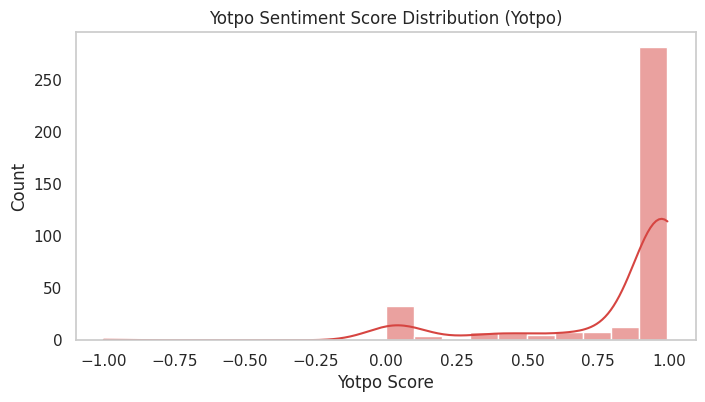

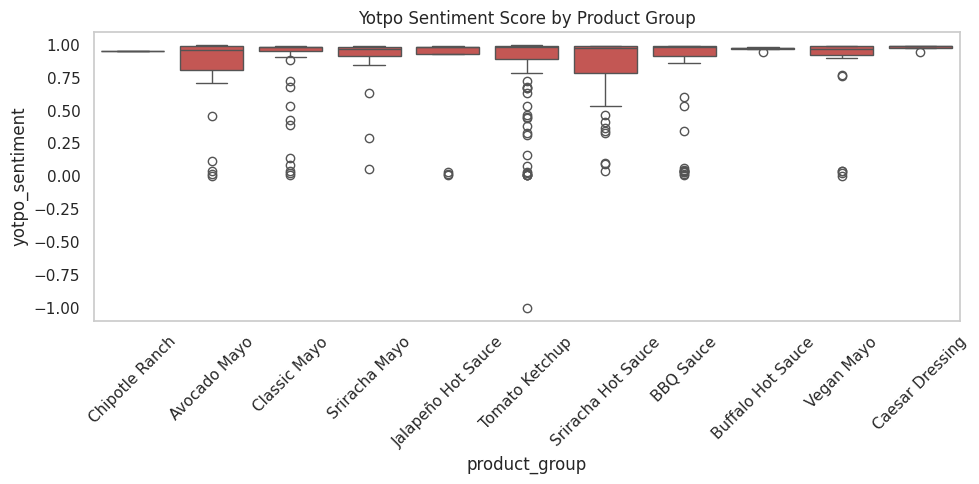

In [88]:
# Sentiment Distribution of Yotpo (excl external retailers)
sentiment_data = df_reviews[df_reviews['yotpo_sentiment'].notna()]
plt.figure(figsize=(8, 4))
sns.histplot(sentiment_data['yotpo_sentiment'], bins=20, kde=True, color='#D64541')
plt.title("Yotpo Sentiment Score Distribution (Yotpo)")
plt.xlabel("Yotpo Score")
plt.grid(False)
plt.show()

# Sentiment by product group (Yotpo)
plt.figure(figsize=(10, 5))
sns.boxplot(x='product_group', y='yotpo_sentiment', data=sentiment_data, color='#D64541')
plt.xticks(rotation=45)
plt.title("Yotpo Sentiment Score by Product Group")
plt.tight_layout()
plt.grid(False)
plt.show()

### Overall Distribution of Ratings

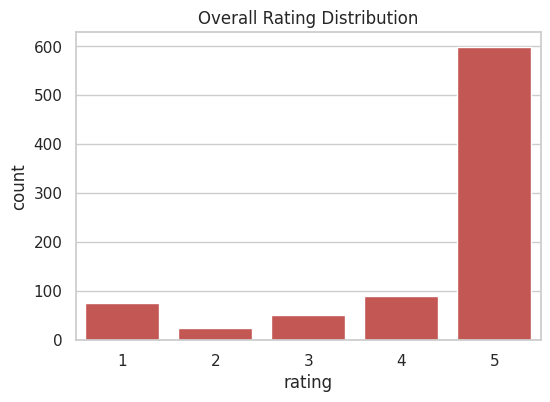

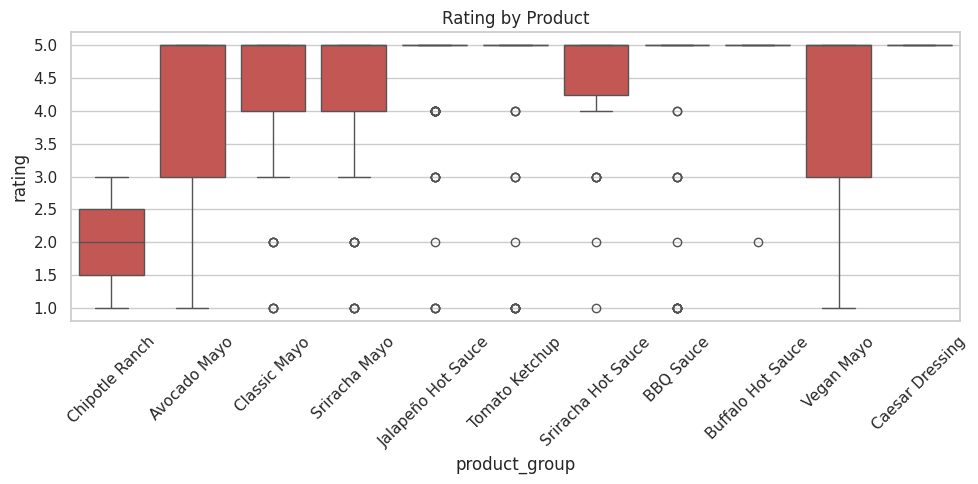

In [89]:
# Distribution of rating
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=df_reviews,color='#D64541')
plt.title("Overall Rating Distribution")
plt.show()

# Boxplot of rating by product group
plt.figure(figsize=(10, 5))
sns.boxplot(x='product_group', y='rating', data=df_reviews,color='#D64541')
plt.xticks(rotation=45)
plt.title("Rating by Product")
plt.tight_layout()
plt.show()

### Sentiment Distribution Overview

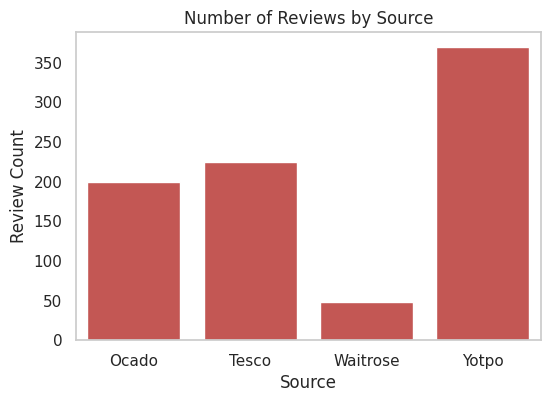

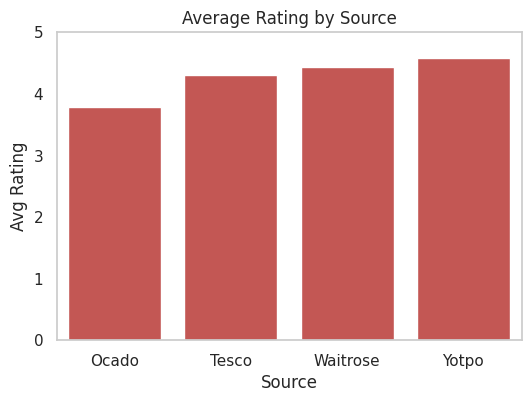

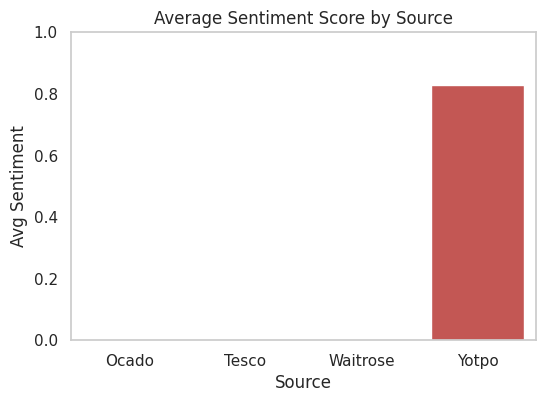

In [90]:
# Group by source
platform_stats = df_reviews.groupby('source').agg(
    review_count=('rating', 'count'),
    avg_rating=('rating', 'mean'),
    avg_sentiment=('yotpo_sentiment', 'mean')
).reset_index()

# Set plot style
sns.set(style="whitegrid")

# Define custom color
custom_color = "#D64541"

# Review count per source
plt.figure(figsize=(6, 4))
sns.barplot(x='source', y='review_count', data=platform_stats, color=custom_color)
plt.title("Number of Reviews by Source")
plt.ylabel("Review Count")
plt.xlabel("Source")
plt.grid(False)
plt.show()

# Average rating per source
plt.figure(figsize=(6, 4))
sns.barplot(x='source', y='avg_rating', data=platform_stats, color=custom_color)
plt.title("Average Rating by Source")
plt.ylabel("Avg Rating")
plt.ylim(0, 5)
plt.xlabel("Source")
plt.grid(False)
plt.show()

# Average sentiment score (Yotpo only has values)
plt.figure(figsize=(6, 4))
sns.barplot(x='source', y='avg_sentiment', data=platform_stats, color=custom_color)
plt.title("Average Sentiment Score by Source")
plt.ylabel("Avg Sentiment")
plt.ylim(0, 1)
plt.xlabel("Source")
plt.grid(False)
plt.show()


In [91]:
# Top reviewed products
product_stats = df_reviews.groupby('product_group').agg(
    review_count=('rating', 'count'),
    avg_rating=('rating', 'mean'),
    avg_sentiment=('yotpo_sentiment', 'mean')
).sort_values(by='review_count', ascending=False)

print("\nProduct Group Summary:\n", product_stats)



Product Group Summary:
                     review_count  avg_rating  avg_sentiment
product_group                                              
Tomato Ketchup               124    4.645161       0.822439
Jalapeño Hot Sauce           114    4.605263       0.796127
Avocado Mayo                 102    3.892157       0.822651
Classic Mayo                  89    4.370787       0.846997
BBQ Sauce                     86    4.476744       0.814473
Sriracha Mayo                 64    4.265625       0.872192
Vegan Mayo                    62    4.016129       0.827185
Sriracha Hot Sauce            50    4.540000       0.814911
Buffalo Hot Sauce             18    4.833333       0.971472
Caesar Dressing                5    5.000000       0.978348
Chipotle Ranch                 2    2.000000       0.952684


In [92]:
# For example: 'product_name' or 'product'

review_counts = df_reviews['product_group'].value_counts().reset_index()
review_counts.columns = ['product_group', 'review_count']
print(review_counts)


         product_group  review_count
0       Tomato Ketchup           124
1   Jalapeño Hot Sauce           114
2         Avocado Mayo           102
3         Classic Mayo            89
4            BBQ Sauce            86
5        Sriracha Mayo            64
6           Vegan Mayo            62
7   Sriracha Hot Sauce            50
8    Buffalo Hot Sauce            18
9      Caesar Dressing             5
10      Chipotle Ranch             2


## NLP Sentiment Analysis  

### Data Preprocessing

In [95]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def clean_text(text):
    if pd.isnull(text):
        return ""

    text = text.lower()  # lowercase
    text = re.sub(r'&[a-z]+;', '', text)  # remove HTML entities
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = text.split()  # tokenize
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # lemmatize
    return ' '.join(tokens)

# Apply to df_reviews
df_reviews['clean_comment'] = df_reviews['comment'].apply(clean_text)

# Preview result
df_reviews[['comment', 'clean_comment']].sample(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


comment  \
272  It&#x27;s the second lot I have bought, the fi...   
308  Wow, we have tried the tomato ketchup, srirach...   
775  very nice: lovely mayo with no artificial addi...   
568  Deceptively Delicious ! At first I thought it ...   
594  I like Dr Wills sauces and I’m really impresse...   

                                         clean_comment  
272  itxs second lot bought first diffrent flavour ...  
308  wow tried tomato ketchup sriracha sauce tahini...  
775  nice lovely mayo artificial additive please ma...  
568  deceptively delicious first thought simply rat...  
594  like dr will sauce i’m really impressed one lo...

In [96]:
df_reviews.drop(columns=['comment'], inplace=True)

In [97]:
# Reorder columns with clean_comment placed between product and yotpo_sentiment
cols = df_reviews.columns.tolist()
cols.remove('clean_comment')
# Insert it after 'product'
product_index = cols.index('product')
cols.insert(product_index + 1, 'clean_comment')

# Apply the new column order
df_reviews = df_reviews[cols]

In [98]:
df_reviews.head()

date  rating                             product  \
0  10/05/2025 22:56       3  Dr. Will's Chipotle Ranch Dressing   
1  10/05/2025 12:15       5   Dr. Will's Avocado Oil Mayonnaise   
2  10/05/2025 06:57       5   Dr. Will's Avocado Oil Mayonnaise   
3  07/05/2025 11:37       5             Dr. Will's Classic Mayo   
4  30/04/2025 16:01       5             Dr. Will's Classic Mayo   

                                       clean_comment  yotpo_sentiment source  \
0  made seed oil rapeseed oil market really need ...         0.952684  Yotpo   
1  swapped normal big brand mayo japanese mayo ta...         0.710523  Yotpo   
2  really like mayonnaise although would like bit...         0.461072  Yotpo   
3  major tangy ixve never fan mayo hand best woul...         0.428422  Yotpo   
4          top stuff ideal special diet taste lovely         0.985937  Yotpo   

    product_group  
0  Chipotle Ranch  
1    Avocado Mayo  
2    Avocado Mayo  
3    Classic Mayo  
4    Classic Mayo

## Sentiment Analysis using VADER

In [99]:
# Install and import
!pip install -q nltk
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [100]:
# Apply VADER to clean_comment
def get_vader_score(text):
    return sia.polarity_scores(str(text))['compound']

df_reviews = df_reviews.drop(columns=['neg', 'neu', 'pos', 'compound'], errors='ignore')  # Clean any duplicates first

df_reviews['vader_score'] = df_reviews['clean_comment'].apply(get_vader_score)


In [101]:
# Classify compound score into sentiment labels
def classify_vader(score):
    if score >= 0.1:
        return 'Positive'
    elif score <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_reviews['vader_sentiment_label'] = df_reviews['vader_score'].apply(classify_vader)

In [102]:
# Create flag for 'mixed sentiment'
df_reviews['sentiment_flag'] = None

for i, row in df_reviews.iterrows():
    comment = row['clean_comment']
    if isinstance(comment, str) and 'love' in comment.lower() and 'wish' in comment.lower():
        df_reviews.at[i, 'sentiment_flag'] = 'Mixed Sentiment'

In [103]:
# Quick check
df_reviews[['clean_comment', 'vader_score', 'vader_sentiment_label', 'sentiment_flag']].sample(10)

clean_comment  vader_score  \
726  nice mayo received mayo free gift know expect ...       0.8885   
450  horrible bought try healthier consume seed oil...      -0.8748   
29                      disappointed sticker come gift      -0.0516   
497  totally disappointed bought two jar looked int...      -0.3956   
123  mayo really hit spot kick heat much it‚äô ligh...       0.3182   
493  smooth smooth creamy great taste much healthie...       0.6249   
552  excellent product excellent product low additi...       0.7430   
111  gave pack five sauce present visit family didn...       0.0000   
745  sharp tangy liked flavour mayo reminded sandwi...       0.6808   
160  always buy ketchup itxs ultra processed taste ...       0.4404   

    vader_sentiment_label sentiment_flag  
726              Positive           None  
450              Negative           None  
29                Neutral           None  
497              Negative           None  
123              Positive           None  
493              Positive           None  
552              Positive           None  
111               Neutral           None  
745              Positive           None  
160              Positive           None

In [104]:
df_reviews.head(5)

date  rating                             product  \
0  10/05/2025 22:56       3  Dr. Will's Chipotle Ranch Dressing   
1  10/05/2025 12:15       5   Dr. Will's Avocado Oil Mayonnaise   
2  10/05/2025 06:57       5   Dr. Will's Avocado Oil Mayonnaise   
3  07/05/2025 11:37       5             Dr. Will's Classic Mayo   
4  30/04/2025 16:01       5             Dr. Will's Classic Mayo   

                                       clean_comment  yotpo_sentiment source  \
0  made seed oil rapeseed oil market really need ...         0.952684  Yotpo   
1  swapped normal big brand mayo japanese mayo ta...         0.710523  Yotpo   
2  really like mayonnaise although would like bit...         0.461072  Yotpo   
3  major tangy ixve never fan mayo hand best woul...         0.428422  Yotpo   
4          top stuff ideal special diet taste lovely         0.985937  Yotpo   

    product_group  vader_score vader_sentiment_label sentiment_flag  
0  Chipotle Ranch       0.7178              Positive           None  
1    Avocado Mayo       0.8442              Positive           None  
2    Avocado Mayo       0.8514              Positive           None  
3    Classic Mayo       0.7193              Positive           None  
4    Classic Mayo       0.8934              Positive           None

## Sentiment Breakdown by VADER

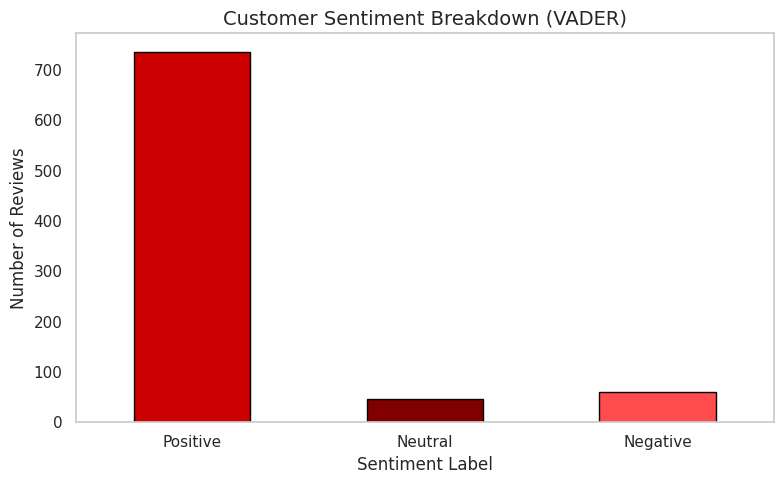

In [106]:
# Reindex to ensure consistent label order
vader_counts = df_reviews['vader_sentiment_label'].value_counts().reindex(['Positive', 'Neutral', 'Negative'])

# Define custom colours
sentiment_colors = ['#cc0000', '#800000', '#ff4d4d']  # Positive, Neutral, Negative


# Plotting
plt.figure(figsize=(8, 5))
vader_counts.plot(kind='bar', color=sentiment_colors, edgecolor='black')

# Aesthetics
plt.title('Customer Sentiment Breakdown (VADER)', fontsize=14)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()


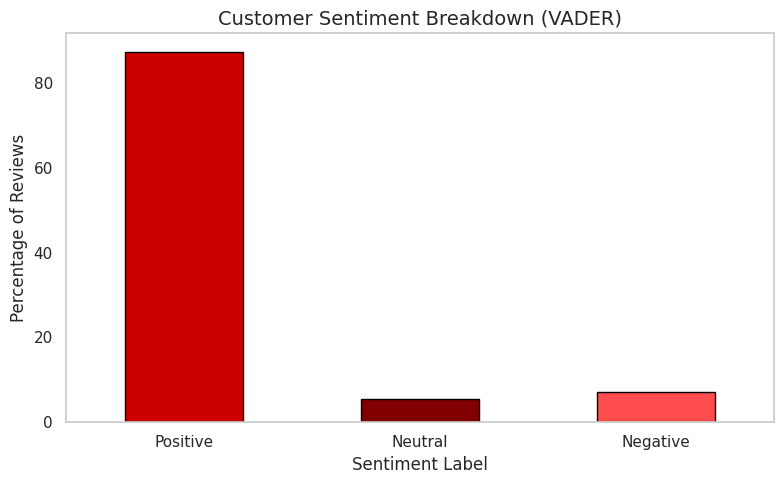

In [107]:
# Get sentiment counts and ensure consistent order
vader_counts = df_reviews['vader_sentiment_label'].value_counts().reindex(['Positive', 'Neutral', 'Negative'])

# Convert to percentages
vader_percentages = (vader_counts / vader_counts.sum()) * 100

# Define custom colours
sentiment_colors = ['#cc0000', '#800000', '#ff4d4d']  # Positive, Neutral, Negative

# Plotting
plt.figure(figsize=(8, 5))
vader_percentages.plot(kind='bar', color=sentiment_colors, edgecolor='black')

# Aesthetics
plt.title('Customer Sentiment Breakdown (VADER)', fontsize=14)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('Percentage of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()


## Data Visualisation

### Platform Based Sentiment Analysis

In [108]:
# Count number of reviews per source per sentiment
sentiment_counts = df_reviews.groupby(['source', 'vader_sentiment_label']).size().unstack().fillna(0)

In [113]:
# Group data and calculate sentiment percentage per platform
df_platform = df_reviews.groupby(['source', 'vader_sentiment_label']).size().reset_index(name='count')
df_platform['total'] = df_platform.groupby('source')['count'].transform('sum')
df_platform['percentage'] = (df_platform['count'] / df_platform['total']) * 100

# Custom order: Positive → Negative → Neutral
custom_order = ["Positive", "Negative", "Neutral"]
df_platform['vader_sentiment_label'] = pd.Categorical(
    df_platform['vader_sentiment_label'],
    categories=custom_order,
    ordered=True
)

# Color map
color_map = {
    "Positive": "#cc0000",   # Light red
    "Neutral": "#800000",    # Medium red
    "Negative": "#ff4d4d"    # Dark red
}

# Sort by source and sentiment for plotting
df_platform = df_platform.sort_values(['source', 'vader_sentiment_label'])

# Create figure
fig = go.Figure()

# Add bars for each platform and sentiment
for sentiment in custom_order:
    sentiment_data = df_platform[df_platform['vader_sentiment_label'] == sentiment]
    fig.add_trace(go.Bar(
        x=sentiment_data['source'],
        y=sentiment_data['percentage'],
        name=sentiment,
        text=sentiment_data['percentage'].round(1).astype(str) + '%',
        textposition='outside',
        marker_color=color_map[sentiment]
    ))

# Update layout for static, clean report-style figure
fig.update_layout(
    title="Sentiment Distribution (%) Across Retail Platforms",
    xaxis_title="Retail Platform",
    yaxis_title="Percentage of Reviews",
    barmode='group',
    template='plotly_white',
    font=dict(family="Arial", size=16),
    showlegend=True,
    bargap=0.2,
    margin=dict(t=80),
)

# Remove grid lines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


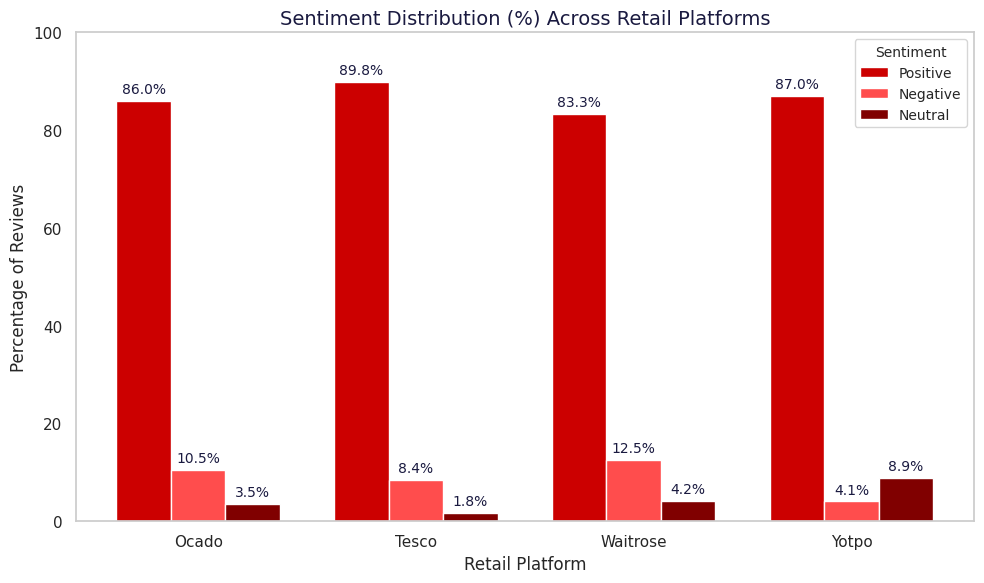

In [114]:
# Group and calculate sentiment percentage per platform
df_platform = df_reviews.groupby(['source', 'vader_sentiment_label']).size().reset_index(name='count')
df_platform['total'] = df_platform.groupby('source')['count'].transform('sum')
df_platform['percentage'] = (df_platform['count'] / df_platform['total']) * 100

# Pivot for plotting
sentiment_order = ["Positive", "Negative", "Neutral"]
df_platform['vader_sentiment_label'] = pd.Categorical(
    df_platform['vader_sentiment_label'], categories=sentiment_order, ordered=True
)
pivot_df = df_platform.pivot(index='source', columns='vader_sentiment_label', values='percentage').fillna(0)
pivot_df = pivot_df[sentiment_order]  # Reorder columns

# Color map
sentiment_colors = {
    "Positive": "#cc0000",
    "Negative": "#ff4d4d",
    "Neutral": "#800000"
}

# Set x-axis values
platforms = pivot_df.index.tolist()
x = np.arange(len(platforms))
width = 0.25

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))

# Plot grouped bars
for i, sentiment in enumerate(sentiment_order):
    values = pivot_df[sentiment]
    ax.bar(
        x + i * width,
        values,
        width=width,
        color=sentiment_colors[sentiment],
        label=sentiment
    )
    for j, val in enumerate(values):
        ax.text(
            x[j] + i * width,
            val + 1,
            f'{val:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10,
            color='#1A1A40'
        )

# Axis settings
ax.set_title("Sentiment Distribution (%) Across Retail Platforms", fontsize=14, color='#1A1A40')
ax.set_xlabel("Retail Platform", fontsize=12)
ax.set_ylabel("Percentage of Reviews", fontsize=12)
ax.set_ylim(0, 100)
ax.set_xticks(x + width)
ax.set_xticklabels(platforms, fontsize=11)

# Layout and legend
ax.grid(False)
ax.legend(title='Sentiment', fontsize=10, title_fontsize=10)
plt.tight_layout()
plt.show()


In [117]:
# Export sentiment distribution to CSV for Tableau
df_platform.to_csv("Sentiment_Distribution_By_Platform.csv", index=False)
from google.colab import files
files.download("Sentiment_Distribution_By_Platform.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
# Export sentiment distribution to CSV for Tableau
df_reviews.to_csv("Sentiment_Distribution_By_Platform.csv", index=False)
from google.colab import files
files.download("Sentiment_Distribution_By_Platform.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

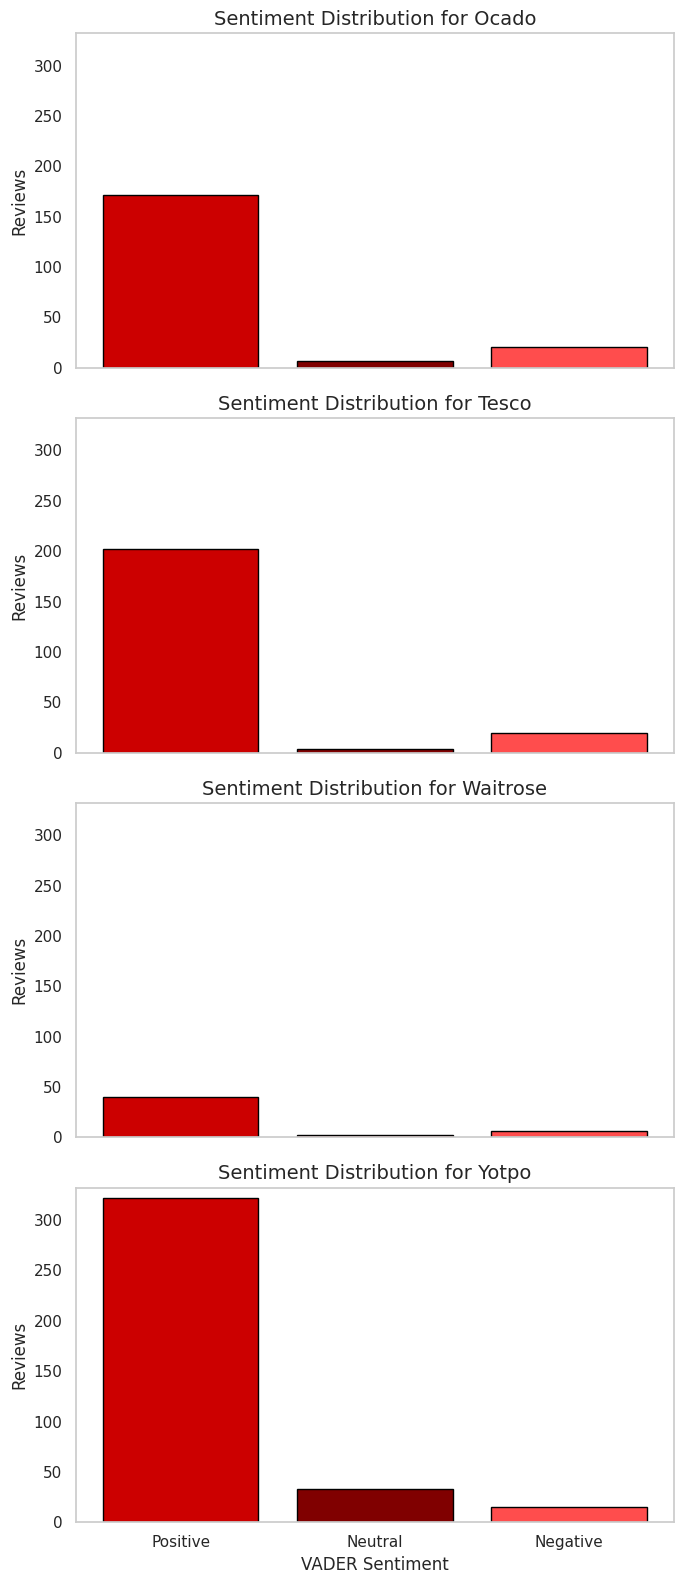

In [119]:
# Prepare data
df_platform = df_reviews.groupby(['source', 'vader_sentiment_label']).size().reset_index(name='count')

# Ensure all sentiment labels exist for each platform
sentiment_order = ["Positive", "Neutral", "Negative"]
platforms = df_platform['source'].unique()

# Create subplot grid
fig, axes = plt.subplots(nrows=len(platforms), figsize=(7, 4 * len(platforms)), sharex=True)

# Red color mapping
color_map = {
    "Positive": "#cc0000",
    "Neutral": "#800000",
    "Negative": "#FF4D4D"
}

# Plot each platform
for i, platform in enumerate(platforms):
    ax = axes[i] if len(platforms) > 1 else axes
    platform_data = df_platform[df_platform['source'] == platform].set_index('vader_sentiment_label')
    platform_data = platform_data.reindex(sentiment_order, fill_value=0).reset_index()

    bars = ax.bar(
        platform_data['vader_sentiment_label'],
        platform_data['count'],
        color=[color_map[s] for s in platform_data['vader_sentiment_label']],
        edgecolor='black'
    )

    ax.set_title(f"Sentiment Distribution for {platform}", fontsize=14)
    ax.set_ylabel("Reviews")
    ax.set_ylim(0, df_platform['count'].max() + 10)
    ax.grid(False)

plt.xlabel("VADER Sentiment")
plt.tight_layout()
plt.show()

## Product Level Sentiment Analysis

In [120]:
df_reviews.groupby('product_group')['vader_sentiment_label'].value_counts() #sentiment by product

product_group       vader_sentiment_label
Avocado Mayo        Positive                  79
                    Negative                  13
                    Neutral                   10
BBQ Sauce           Positive                  73
                    Neutral                    7
                    Negative                   6
Buffalo Hot Sauce   Positive                  17
                    Neutral                    1
Caesar Dressing     Positive                   5
Chipotle Ranch      Negative                   1
                    Positive                   1
Classic Mayo        Positive                  81
                    Negative                   5
                    Neutral                    3
Jalapeño Hot Sauce  Positive                 105
                    Negative                   6
                    Neutral                    3
Sriracha Hot Sauce  Positive                  44
                    Neutral                    5
                    Negative                   1
Sriracha Mayo       Positive                  58
                    Negative                   3
                    Neutral                    3
Tomato Ketchup      Positive                 110
                    Neutral                    8
                    Negative                   6
Vegan Mayo          Positive                  54
                    Negative                   5
                    Neutral                    3
Name: count, dtype: int64

In [121]:
import plotly.express as px

# Group sentiment count per product
df_grouped = df_reviews.groupby(['product_group', 'vader_sentiment_label']).size().reset_index(name='count')

# Set proper sentiment order
df_grouped['vader_sentiment_label'] = pd.Categorical(
    df_grouped['vader_sentiment_label'],
    categories=["Positive", "Neutral", "Negative"],
    ordered=True
)

# Plotly interactive bar chart with custom colours
fig = px.bar(
    df_grouped,
    x="vader_sentiment_label",
    y="count",
    color="vader_sentiment_label",
    animation_frame="product_group",  # Dropdown by product
    title="Product Group - Level VADER Sentiment Distribution",
    labels={
        "vader_sentiment_label": "VADER Sentiment",
        "count": "Number of Reviews"
    },
    category_orders={
        "vader_sentiment_label": ["Positive", "Neutral", "Negative"]
    },
    color_discrete_map={
        "Positive": '#cc0000',
        "Neutral": '#800000',
        "Negative": '#FF4D4D'
    }
)

fig.update_layout(
    template="plotly_white",
    font=dict(family="Arial", size=14),
    showlegend=False
)

fig.show()


In [122]:
# Export grouped sentiment by product group to CSV
df_grouped.to_csv("Product_Group_Sentiment_Distribution.csv", index=False)
from google.colab import files
files.download("Product_Group_Sentiment_Distribution.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
!pip install -q ipywidgets
# To enable the interactive backend in Jupyter Lab or Notebook, you might need to explicitly enable it.
# For JupyterLab: !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# For classic Jupyter Notebook: !jupyter nbextension enable --py widgetsnbextension

import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.7 MB/s eta 0:00:00


### Sentiment Analysis by Time

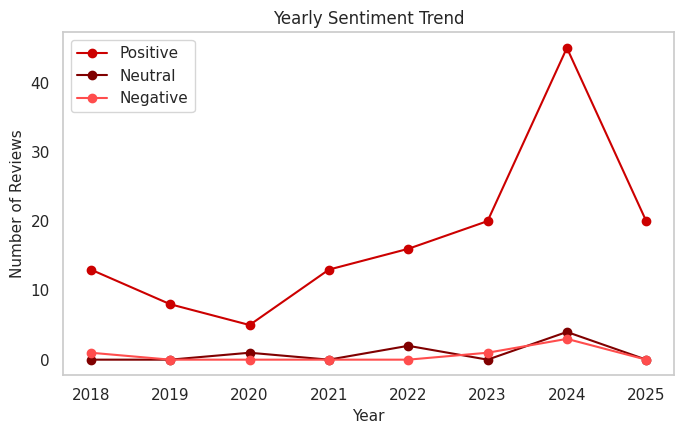

In [128]:
# Prepare Data
df_trend = df_reviews.copy()
df_trend['date'] = pd.to_datetime(df_trend['date'], errors='coerce')
df_trend = df_trend[df_trend['date'].notna()]

# Extract Year
df_trend['year'] = df_trend['date'].dt.year

# Group by year and sentiment
sentiment_trend = df_trend.groupby(['year', 'vader_sentiment_label']).size().reset_index(name='count')

# Pivot for plotting
pivot_df = sentiment_trend.pivot(index='year', columns='vader_sentiment_label', values='count').fillna(0)

# Plot
plt.figure(figsize=(7, 4.5))
colors = {'Positive': '#cc0000', 'Neutral': '#800000', 'Negative': '#ff4d4d'}

for sentiment in ['Positive', 'Neutral', 'Negative']:
    if sentiment in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[sentiment], label=sentiment, color=colors[sentiment], marker='o')

plt.title("Yearly Sentiment Trend", fontsize=12)
plt.xlabel("Year", fontsize=11)
plt.ylabel("Number of Reviews", fontsize=11)
plt.xticks(pivot_df.index, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()


In [129]:
# Export yearly sentiment trend data
sentiment_trend.to_csv("Yearly_Sentiment_Trend.csv", index=False)
from google.colab import files
files.download("Yearly_Sentiment_Trend.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## TF-IDF & N-Grams


### TF-IDF by Platform (Postive Reviews)

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
import ipywidgets as widgets
from IPython.display import display

# Filter reviews (Neutral + Negative)
filtered_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Positive'])]
filtered_df = filtered_df[filtered_df['clean_comment'].notna()]

# Platform dropdown
platform_dropdown = widgets.Dropdown(
    options=sorted(filtered_df['source'].unique()),
    description='Platform:',
    layout=widgets.Layout(width='50%')
)

# TF-IDF plotting function
def plot_tfidf_by_platform(source_name, top_n=10):
    group_data = filtered_df[filtered_df['source'] == source_name]

    if group_data.empty:
        print(f"No data available for {source_name}")
        return

    tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
    tfidf_matrix = tfidf.fit_transform(group_data['clean_comment'])

    tfidf_scores = tfidf_matrix.mean(axis=0).A1
    tfidf_terms = tfidf.get_feature_names_out()

    tfidf_df = pd.DataFrame({'term': tfidf_terms, 'score': tfidf_scores})
    top_terms = tfidf_df.sort_values(by='score', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.barh(top_terms['term'][::-1], top_terms['score'][::-1], color='#cc0000', edgecolor='black')
    plt.title(f"Top TF-IDF Terms for {source_name} (Positive Reviews)")
    plt.xlabel("TF-IDF Score")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Step 4: Create the interactive dropdown
widgets.interact(plot_tfidf_by_platform, source_name=platform_dropdown)


interactive(children=(Dropdown(description='Platform:', layout=Layout(width='50%'), options=('Ocado', 'Tesco',…

<function __main__.plot_tfidf_by_platform(source_name, top_n=10)>

### TF-IDF by Platform (Negative Reviews & Neutral Reviews)

In [131]:
# Filter reviews (Neutral + Negative)
filtered_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])]
filtered_df = filtered_df[filtered_df['clean_comment'].notna()]

# Platform dropdown
platform_dropdown = widgets.Dropdown(
    options=sorted(filtered_df['source'].unique()),
    description='Platform:',
    layout=widgets.Layout(width='50%')
)

# TF-IDF plotting function
def plot_tfidf_by_platform(source_name, top_n=10):
    group_data = filtered_df[filtered_df['source'] == source_name]

    if group_data.empty:
        print(f"No data available for {source_name}")
        return

    tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
    tfidf_matrix = tfidf.fit_transform(group_data['clean_comment'])

    tfidf_scores = tfidf_matrix.mean(axis=0).A1
    tfidf_terms = tfidf.get_feature_names_out()

    tfidf_df = pd.DataFrame({'term': tfidf_terms, 'score': tfidf_scores})
    top_terms = tfidf_df.sort_values(by='score', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.barh(top_terms['term'][::-1], top_terms['score'][::-1], color='#cc0000', edgecolor='black')
    plt.title(f"Top TF-IDF Terms for {source_name} (Neg/Neutral Reviews)")
    plt.xlabel("TF-IDF Score")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Create the interactive dropdown
widgets.interact(plot_tfidf_by_platform, source_name=platform_dropdown)


interactive(children=(Dropdown(description='Platform:', layout=Layout(width='50%'), options=('Ocado', 'Tesco',…

<function __main__.plot_tfidf_by_platform(source_name, top_n=10)>

### Export TF-IDF for Tableau

In [132]:
# Create a list to collect results
all_tfidf_results = []

# Platforms and sentiments
platforms = df_reviews['source'].dropna().unique()
sentiment_types = ['Positive', 'Neutral', 'Negative']

# TF-IDF setup
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)

for sentiment in sentiment_types:
    for platform in platforms:
        filtered_df = df_reviews[
            (df_reviews['vader_sentiment_label'].str.lower() == sentiment.lower()) &
            (df_reviews['source'] == platform) &
            (df_reviews['clean_comment'].notna())
        ]

        if filtered_df.empty:
            continue

        tfidf_matrix = vectorizer.fit_transform(filtered_df['clean_comment'])
        tfidf_scores = tfidf_matrix.mean(axis=0).A1
        tfidf_terms = vectorizer.get_feature_names_out()

        temp_df = pd.DataFrame({
            'term': tfidf_terms,
            'score': tfidf_scores,
            'platform': platform,
            'sentiment': sentiment
        }).sort_values(by='score', ascending=False).head(15)  # you can change top-N here

        all_tfidf_results.append(temp_df)

# Combine and export
final_tfidf_df = pd.concat(all_tfidf_results, ignore_index=True)

# Save to CSV
final_tfidf_df.to_csv("tfidf_by_platform_sentiment_new.csv", index=False)


In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Re-define a helper to collect TF-IDF terms into a list
def get_tfidf_df(filtered_df, source_name, sentiment_label, top_n=10):
    group_data = filtered_df[filtered_df['source'] == source_name]
    if group_data.empty:
        return None

    tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
    tfidf_matrix = tfidf.fit_transform(group_data['clean_comment'])
    tfidf_scores = tfidf_matrix.mean(axis=0).A1
    tfidf_terms = tfidf.get_feature_names_out()

    tfidf_df = pd.DataFrame({
        'term': tfidf_terms,
        'score': tfidf_scores
    }).sort_values(by='score', ascending=False).head(top_n)

    tfidf_df['platform'] = source_name
    tfidf_df['sentiment'] = sentiment_label
    return tfidf_df


# Combine all (Positive, Negative/Neutral)
platforms = df_reviews['source'].dropna().unique()

results = []

# POSITIVE
for platform in platforms:
    pos_df = df_reviews[(df_reviews['vader_sentiment_label'] == 'Positive') & df_reviews['clean_comment'].notna()]
    tfidf_pos = get_tfidf_df(pos_df, platform, 'Positive', top_n=10)
    if tfidf_pos is not None:
        results.append(tfidf_pos)

# NEGATIVE + NEUTRAL
for platform in platforms:
    negneu_df = df_reviews[
        df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral']) &
        df_reviews['clean_comment'].notna()
    ]
    tfidf_negneu = get_tfidf_df(negneu_df, platform, 'Negative/Neutral', top_n=10)
    if tfidf_negneu is not None:
        results.append(tfidf_negneu)

# Combine and export
final_tfidf_df = pd.concat(results, ignore_index=True)
final_tfidf_df.to_csv("TFIDF_By_Platform_Sentiment.csv", index=False)


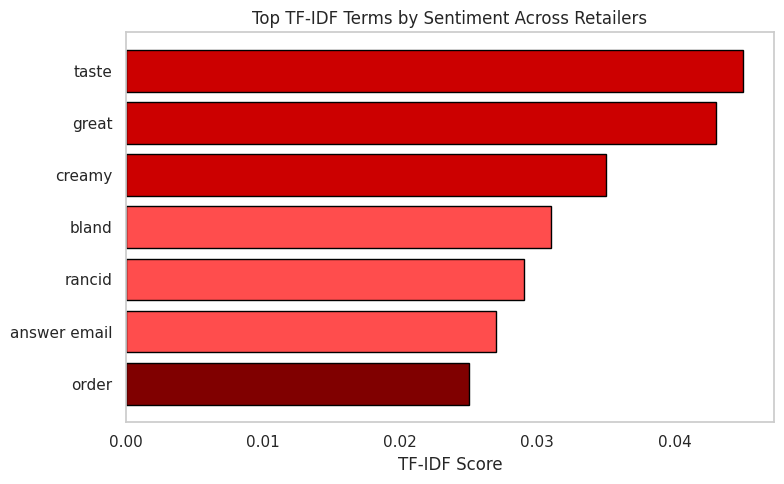

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Example aggregated TF-IDF results
data = {
    'term': ['taste', 'great', 'creamy', 'bland', 'rancid', 'answer email', 'order'],
    'tfidf': [0.045, 0.043, 0.035, 0.031, 0.029, 0.027, 0.025],
    'sentiment': ['Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Neutral']
}

df = pd.DataFrame(data)

# Set colour by sentiment
color_map = color_map = {'Positive': '#cc0000', 'Negative': '#ff4d4d', 'Neutral': '#800000'}

colors = df['sentiment'].map(color_map)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.barh(df['term'], df['tfidf'], color=colors, edgecolor='black')
plt.xlabel("TF-IDF Score")
plt.title("Top TF-IDF Terms by Sentiment Across Retailers")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(False)
plt.show()


### TF-IDF by Product

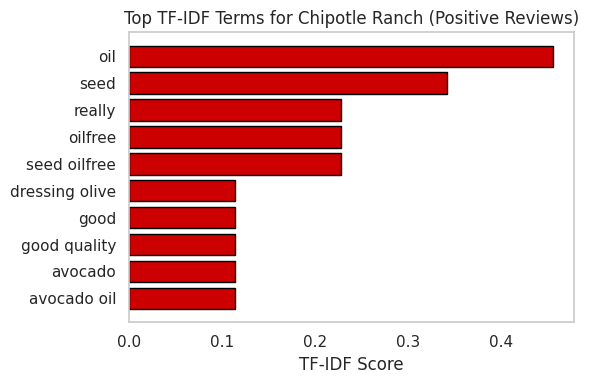

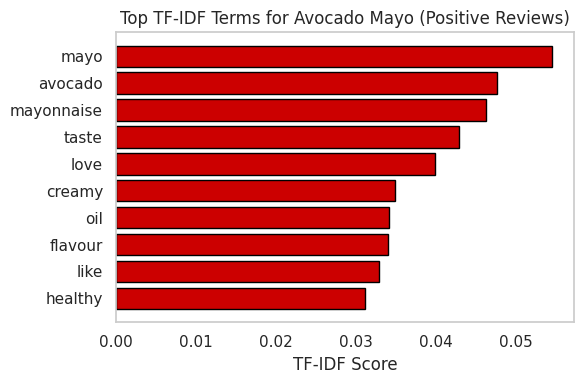

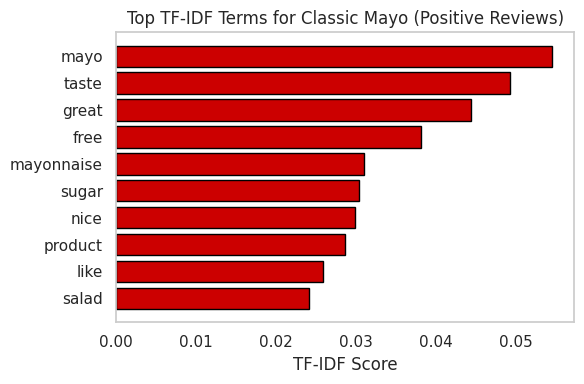

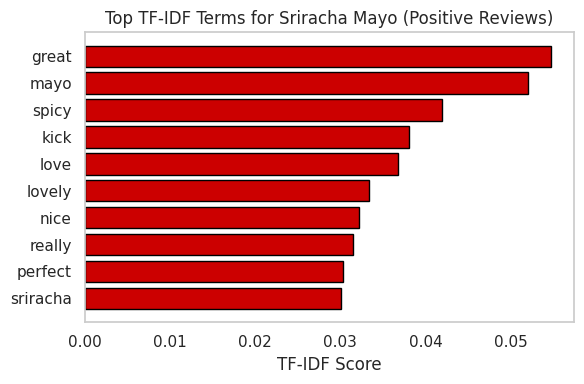

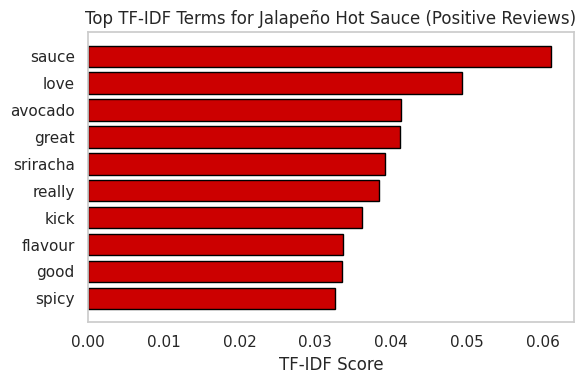

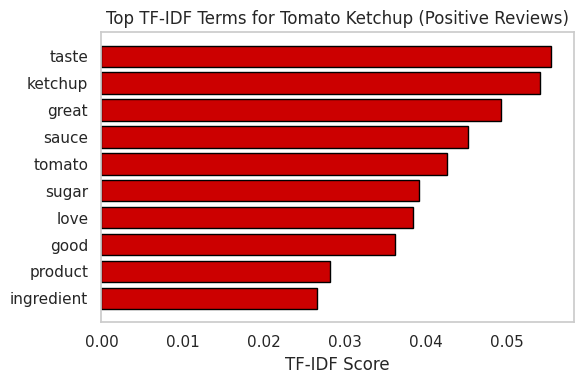

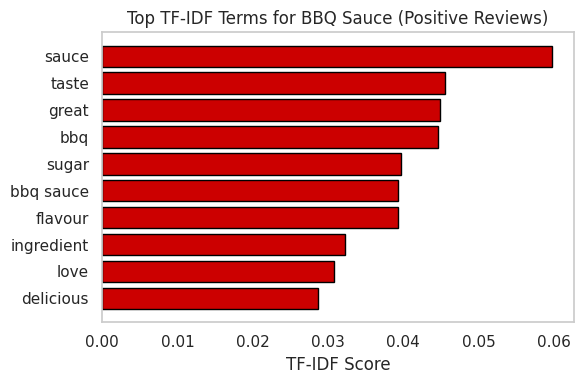

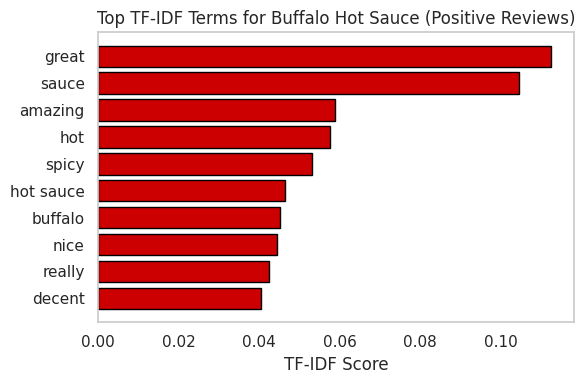

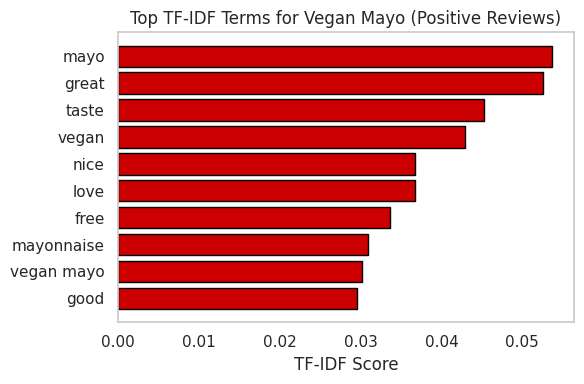

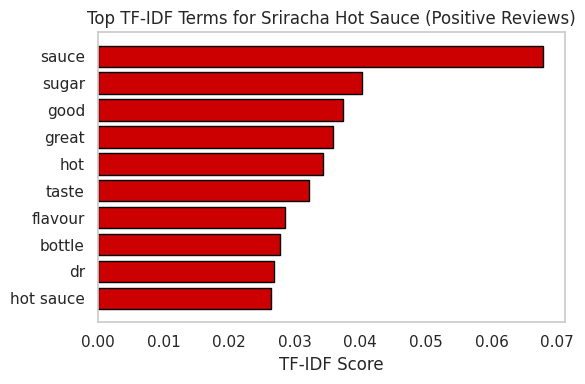

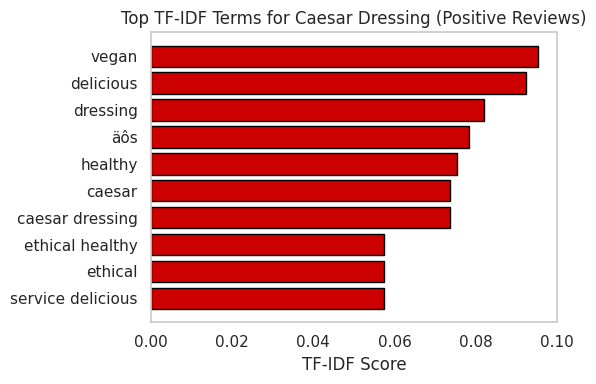

In [135]:
# Filter only positive reviews
filtered_df = df_reviews[df_reviews['vader_sentiment_label'] == 'Positive']
filtered_df = filtered_df[filtered_df['clean_comment'].notna()]

# Get unique product groups
product_groups = filtered_df['product_group'].dropna().unique()

# Loop through each product group
for group in product_groups:
    group_data = filtered_df[filtered_df['product_group'] == group]

    if group_data.empty:
        continue

    tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
    tfidf_matrix = tfidf.fit_transform(group_data['clean_comment'])

    tfidf_scores = tfidf_matrix.mean(axis=0).A1
    tfidf_terms = tfidf.get_feature_names_out()

    tfidf_df = pd.DataFrame({'term': tfidf_terms, 'score': tfidf_scores})
    top_terms = tfidf_df.sort_values(by='score', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.barh(top_terms['term'][::-1], top_terms['score'][::-1], color='#cc0000', edgecolor='black')
    plt.title(f"Top TF-IDF Terms for {group} (Positive Reviews)")
    plt.xlabel("TF-IDF Score")
    plt.tight_layout()
    plt.grid(False)
    plt.show()


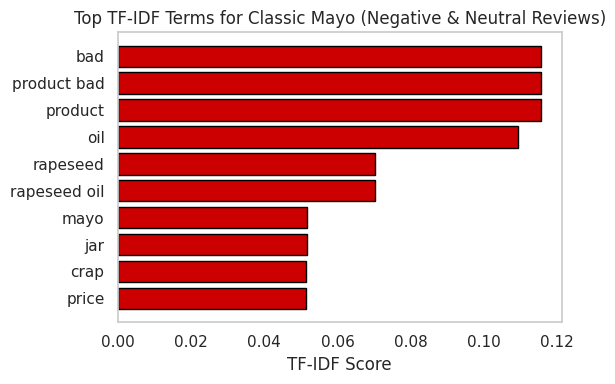

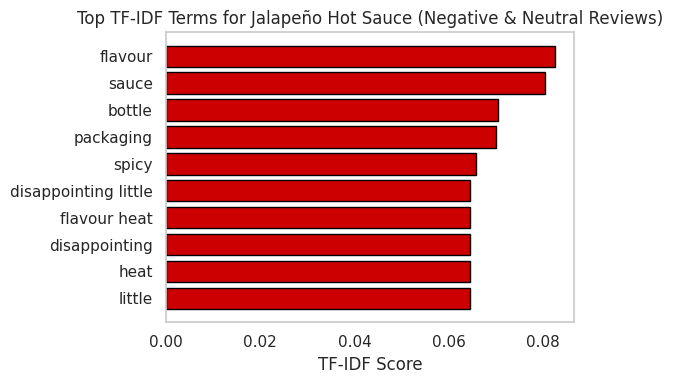

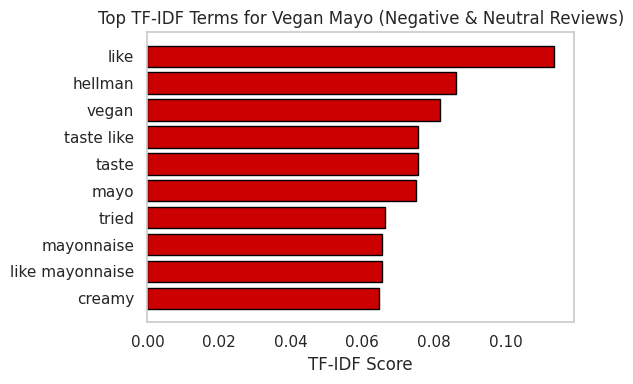

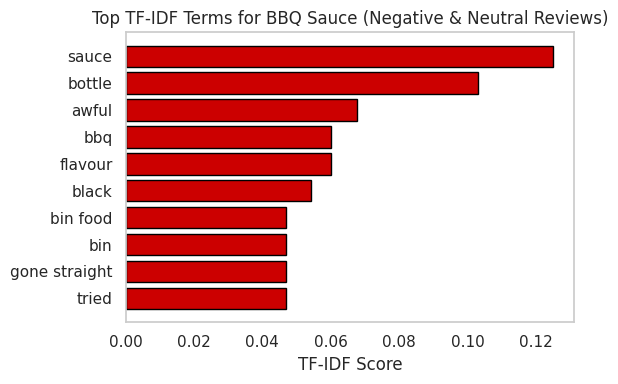

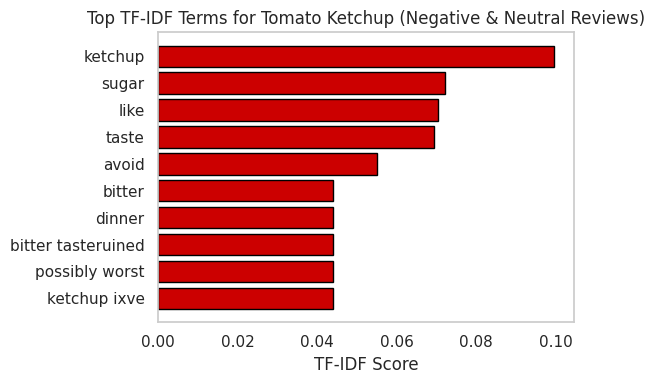

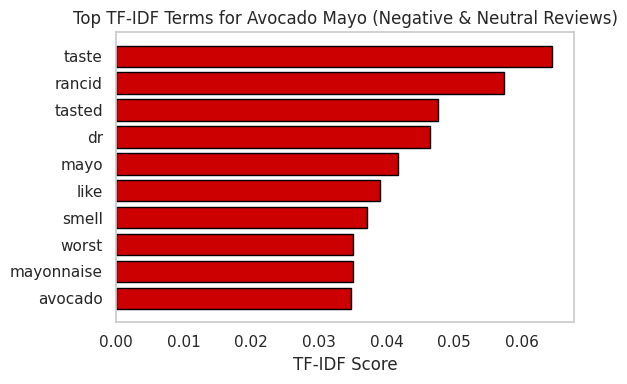

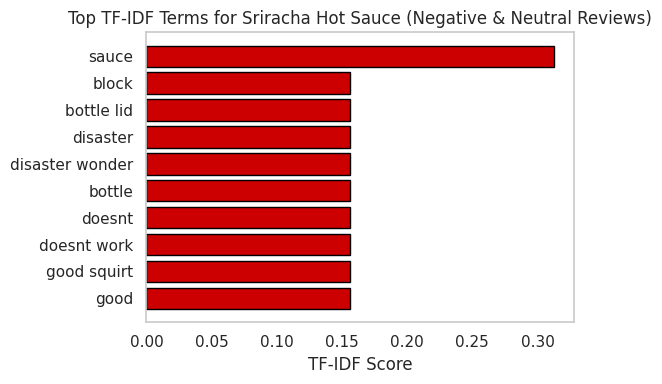

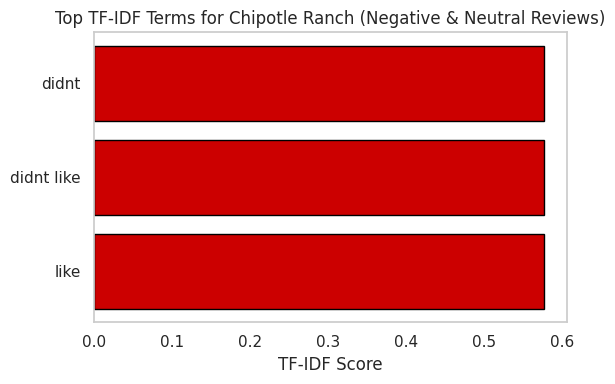

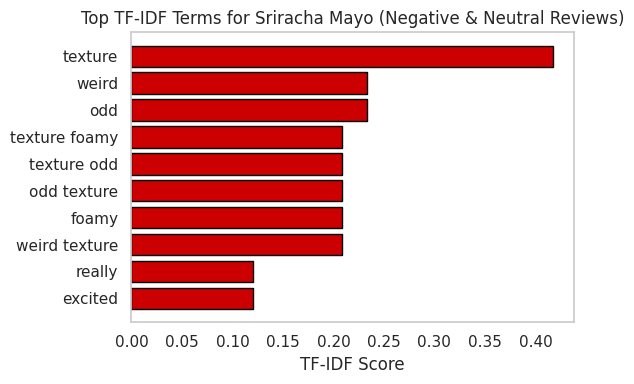

In [136]:
# Filter only positive reviews
filtered_df = df_reviews[df_reviews['vader_sentiment_label'] == 'Negative']
filtered_df = filtered_df[filtered_df['clean_comment'].notna()]

# Get unique product groups
product_groups = filtered_df['product_group'].dropna().unique()

# Loop through each product group
for group in product_groups:
    group_data = filtered_df[filtered_df['product_group'] == group]

    if group_data.empty:
        continue

    tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
    tfidf_matrix = tfidf.fit_transform(group_data['clean_comment'])

    tfidf_scores = tfidf_matrix.mean(axis=0).A1
    tfidf_terms = tfidf.get_feature_names_out()

    tfidf_df = pd.DataFrame({'term': tfidf_terms, 'score': tfidf_scores})
    top_terms = tfidf_df.sort_values(by='score', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.barh(top_terms['term'][::-1], top_terms['score'][::-1], color='#cc0000', edgecolor='black')
    plt.title(f"Top TF-IDF Terms for {group} (Negative & Neutral Reviews)")
    plt.xlabel("TF-IDF Score")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

In [137]:
# Initialise a list to collect data
tfidf_positive_list = []

# Filter for positive reviews
filtered_df = df_reviews[df_reviews['vader_sentiment_label'] == 'Positive']
filtered_df = filtered_df[filtered_df['clean_comment'].notna()]
product_groups = filtered_df['product_group'].dropna().unique()

# Loop through each product group
for group in product_groups:
    group_data = filtered_df[filtered_df['product_group'] == group]
    if group_data.empty:
        continue

    tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
    tfidf_matrix = tfidf.fit_transform(group_data['clean_comment'])
    tfidf_scores = tfidf_matrix.mean(axis=0).A1
    tfidf_terms = tfidf.get_feature_names_out()

    tfidf_df = pd.DataFrame({'Term': tfidf_terms, 'Score': tfidf_scores})
    tfidf_df['Product_Group'] = group
    tfidf_df['Sentiment'] = 'Positive'

    # Append top 10 to the master list
    tfidf_positive_list.append(tfidf_df.sort_values(by='Score', ascending=False).head(10))

# Combine everything
tfidf_positive_all = pd.concat(tfidf_positive_list, ignore_index=True)


In [138]:
# Initialise a list to collect data
tfidf_negneu_list = []

# Filter for negative and neutral
filtered_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])]
filtered_df = filtered_df[filtered_df['clean_comment'].notna()]
product_groups = filtered_df['product_group'].dropna().unique()

# Loop through each product group
for group in product_groups:
    group_data = filtered_df[filtered_df['product_group'] == group]
    if group_data.empty:
        continue

    tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
    tfidf_matrix = tfidf.fit_transform(group_data['clean_comment'])
    tfidf_scores = tfidf_matrix.mean(axis=0).A1
    tfidf_terms = tfidf.get_feature_names_out()

    tfidf_df = pd.DataFrame({'Term': tfidf_terms, 'Score': tfidf_scores})
    tfidf_df['Product_Group'] = group
    tfidf_df['Sentiment'] = 'Negative/Neutral'

    tfidf_negneu_list.append(tfidf_df.sort_values(by='Score', ascending=False).head(10))

# Combine everything
tfidf_negneu_all = pd.concat(tfidf_negneu_list, ignore_index=True)


In [139]:
# Combine positive and negative/neutral
tfidf_combined = pd.concat([tfidf_positive_all, tfidf_negneu_all], ignore_index=True)

# Export to CSV
tfidf_combined.to_csv("TFIDF_By_Product_Sentiment.csv", index=False)


### N-Grams of Postive, Negative and Neutral Comments


### Postive Bigram

In [140]:
from sklearn.feature_extraction.text import CountVectorizer

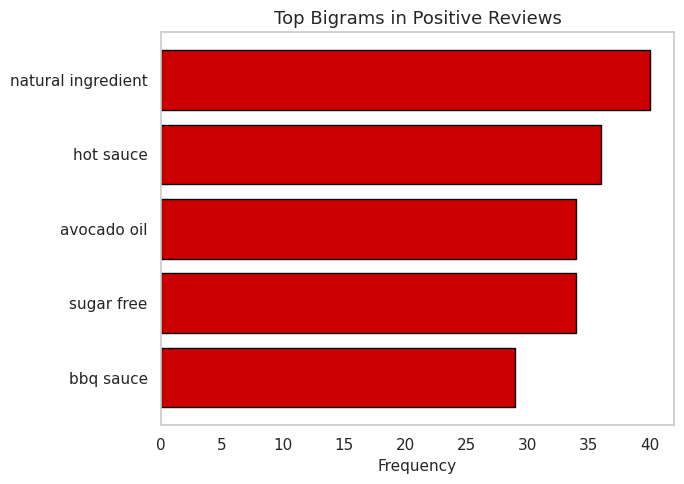

In [141]:
# Filter only Positive reviews with clean comments
positive_df = df_reviews[df_reviews['vader_sentiment_label'] == 'Positive']
positive_df = positive_df[positive_df['clean_comment'].notna()]

# Bigram extraction
vectorizer_pos = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
X_pos = vectorizer_pos.fit_transform(positive_df['clean_comment'])

# Sum frequencies
bigram_counts_pos = X_pos.sum(axis=0).A1
bigram_terms_pos = vectorizer_pos.get_feature_names_out()

bigram_freq_df_pos = pd.DataFrame({'bigram': bigram_terms_pos, 'count': bigram_counts_pos})
top_bigrams_pos = bigram_freq_df_pos.sort_values(by='count', ascending=False).head(5)

# Plot for Positive Reviews
plt.figure(figsize=(7, 5))
plt.barh(top_bigrams_pos['bigram'][::-1], top_bigrams_pos['count'][::-1], color='#cc0000', edgecolor='black')
plt.title("Top Bigrams in Positive Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.grid(False)
plt.show()

### Top 5 Postive Bigram by Time

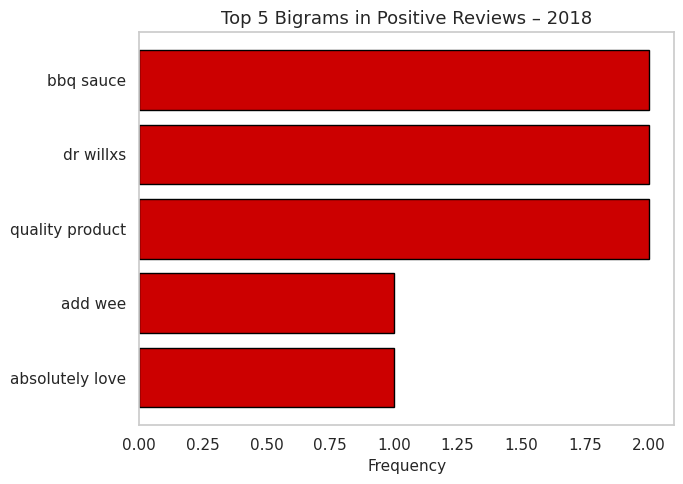

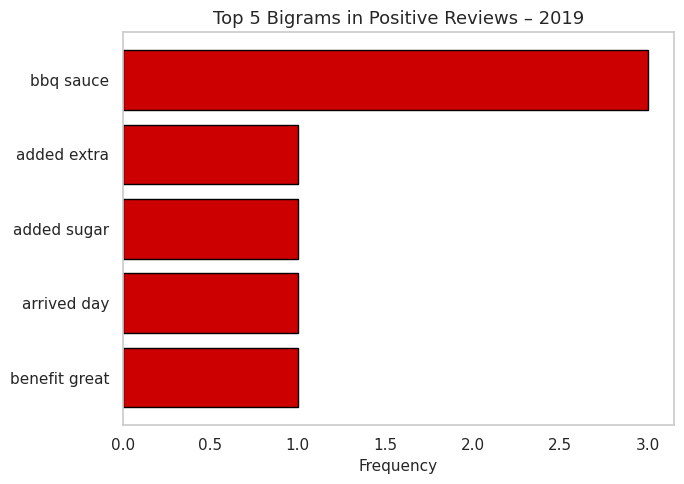

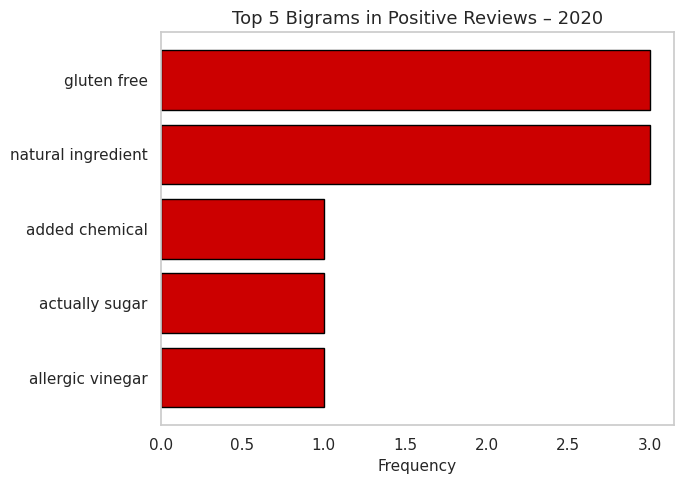

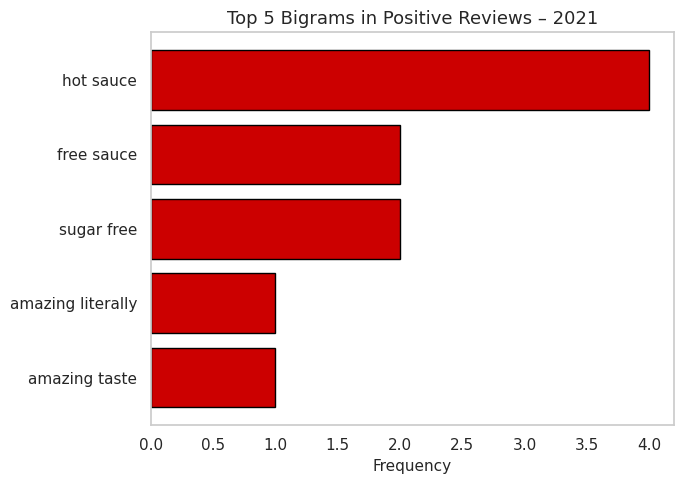

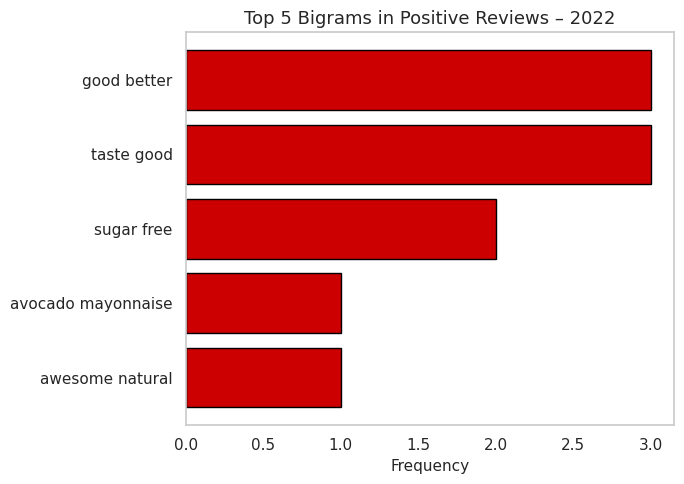

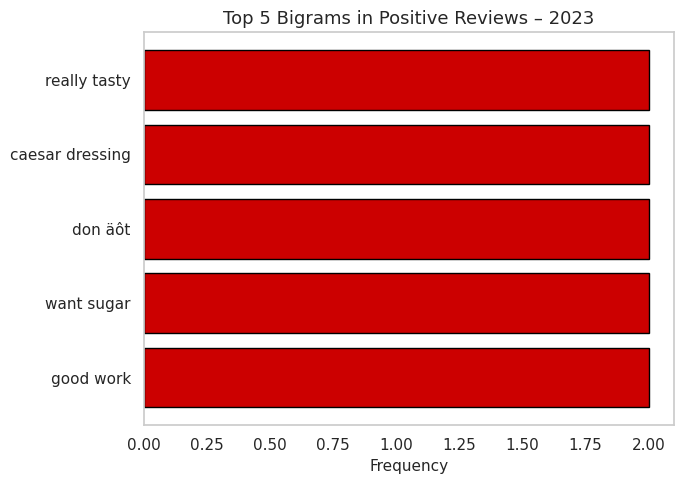

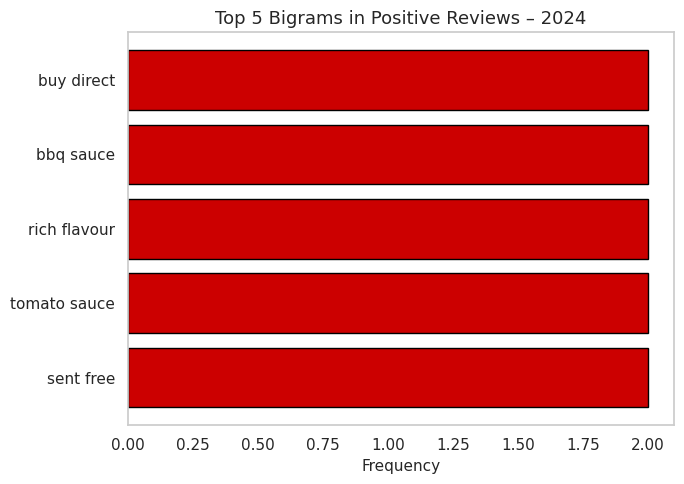

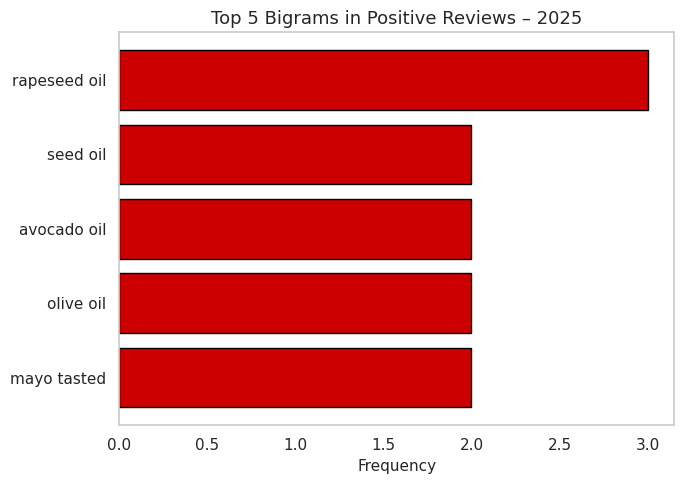

In [142]:
# Ensure 'date' is in datetime format
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# Create 'year' column
df_reviews['year'] = df_reviews['date'].dt.year

# Filter only positive reviews with clean comments
positive_df = df_reviews[
    (df_reviews['vader_sentiment_label'] == 'Positive') &
    (df_reviews['clean_comment'].notna())
].copy()

# Loop over each year in the data
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
years = positive_df['year'].dropna().unique()
years = sorted(years)

for year in years:
    yearly_df = positive_df[positive_df['year'] == year]
    comments = yearly_df['clean_comment'].dropna().tolist()

    if len(comments) < 5:
        print(f"Skipping {year} – not enough comments.")
        continue

    # Extract bigrams
    X = vectorizer.fit_transform(comments)
    bigram_counts = X.sum(axis=0).A1
    bigram_terms = vectorizer.get_feature_names_out()

    bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
    top_bigrams = bigram_freq_df.sort_values(by='count', ascending=False).head(5)

    # Plot
    plt.figure(figsize=(7, 5))
    plt.barh(top_bigrams['bigram'][::-1], top_bigrams['count'][::-1], color='#cc0000', edgecolor='black')
    plt.title(f"Top 5 Bigrams in Positive Reviews – {int(year)}", fontsize=13)
    plt.xlabel("Frequency", fontsize=11)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

### Negative Bigram

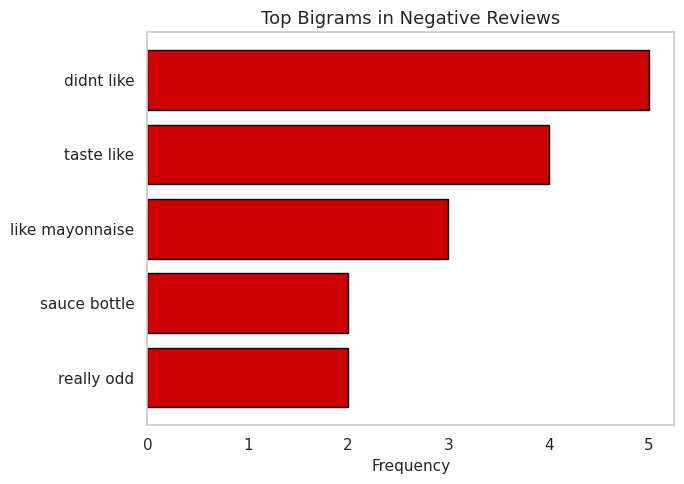

In [143]:
# Filter only Negative reviews with clean comments
negative_df = df_reviews[df_reviews['vader_sentiment_label'] == 'Negative']
negative_df = negative_df[negative_df['clean_comment'].notna()]

# Bigram extraction for negative reviews
vectorizer_neg = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
X_neg = vectorizer_neg.fit_transform(negative_df['clean_comment'])

# Sum frequencies
bigram_counts_neg = X_neg.sum(axis=0).A1
bigram_terms_neg = vectorizer_neg.get_feature_names_out()

# Create dataframe
bigram_freq_df_neg = pd.DataFrame({'bigram': bigram_terms_neg, 'count': bigram_counts_neg})
top_bigrams_neg = bigram_freq_df_neg.sort_values(by='count', ascending=False).head(5)

# Plot for Negative Reviews
plt.figure(figsize=(7, 5))
plt.barh(top_bigrams_neg['bigram'][::-1], top_bigrams_neg['count'][::-1],
         color='#cc0000', edgecolor='black')
plt.title("Top Bigrams in Negative Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.grid(False)
plt.tight_layout()
plt.show()


### Neutral Bigram

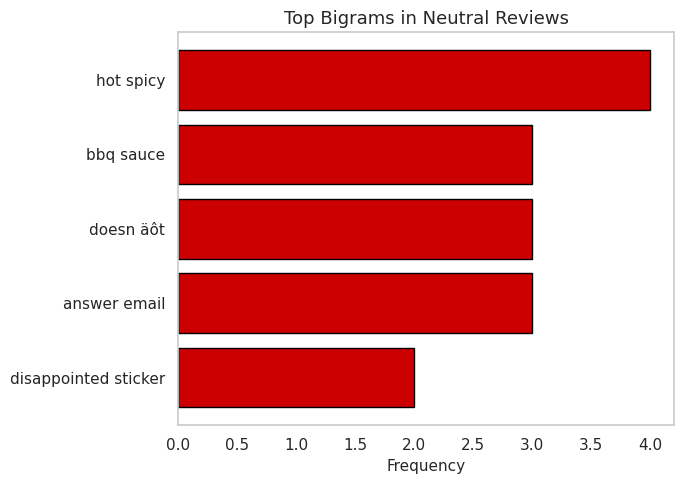

In [144]:
# Filter only Neutral reviews with clean comments
neutral_df = df_reviews[df_reviews['vader_sentiment_label'] == 'Neutral']
neutral_df = neutral_df[neutral_df['clean_comment'].notna()]

# Bigram extraction
vectorizer_neu = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
X_neu = vectorizer_neu.fit_transform(neutral_df['clean_comment'])

# Sum frequencies
bigram_counts_neu = X_neu.sum(axis=0).A1
bigram_terms_neu = vectorizer_neu.get_feature_names_out()

# Create dataframe with correct names
bigram_freq_df_neu = pd.DataFrame({'bigram': bigram_terms_neu, 'count': bigram_counts_neu})
top_bigrams_neu = bigram_freq_df_neu.sort_values(by='count', ascending=False).head(5)

# Plot for Neutral Reviews
plt.figure(figsize=(7, 5))
plt.barh(top_bigrams_neu['bigram'][::-1], top_bigrams_neu['count'][::-1],
         color='#cc0000', edgecolor='black')
plt.title("Top Bigrams in Neutral Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.grid(False)
plt.tight_layout()
plt.show()


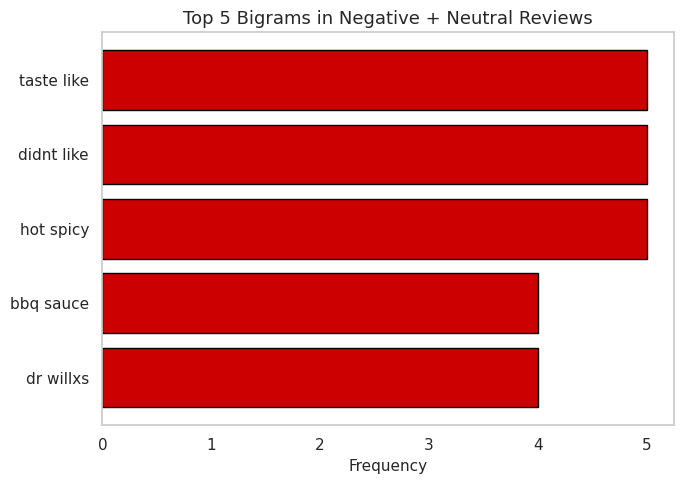

In [146]:
# Filter Negative + Neutral reviews with clean comments
filtered_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Postive','Negative', 'Neutral'])]
filtered_df = filtered_df[filtered_df['clean_comment'].notna()]

# Bigram extraction
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
X = vectorizer.fit_transform(filtered_df['clean_comment'])

# Sum frequencies
bigram_counts = X.sum(axis=0).A1
bigram_terms = vectorizer.get_feature_names_out()

bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
top_bigrams = bigram_freq_df.sort_values(by='count', ascending=False).head(5)

# Plot
plt.figure(figsize=(7, 5))
plt.barh(top_bigrams['bigram'][::-1], top_bigrams['count'][::-1], color='#cc0000', edgecolor='black')
plt.title("Top 5 Bigrams in Negative + Neutral Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.grid(False)
plt.show()

### Top 5 Negative & Neutral Comments by Time

Skipping 2018.0 – not enough comments.
Skipping 2020.0 – not enough comments.
Skipping 2022.0 – not enough comments.
Skipping 2023.0 – not enough comments.


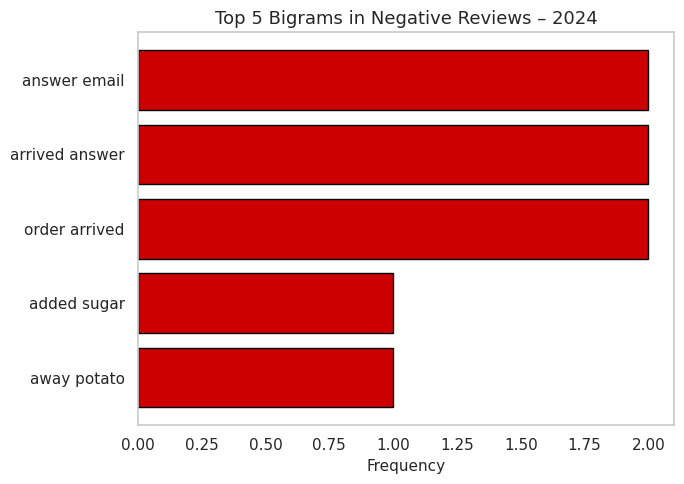

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Convert 'date' column to datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# Step 2: Create a 'year' column
df_reviews['year'] = df_reviews['date'].dt.year

# Step 3: Filter for Negative + Neutral reviews with clean comments
filtered_df = df_reviews[
    (df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])) &
    (df_reviews['clean_comment'].notna())
].copy()

# Step 4: Loop over each year in the filtered data
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
years = filtered_df['year'].dropna().unique()
years = sorted(years)

for year in years:
    yearly_df = filtered_df[filtered_df['year'] == year]
    comments = yearly_df['clean_comment'].dropna().tolist()

    if len(comments) < 5:
        print(f"Skipping {year} – not enough comments.")
        continue

    # Extract bigrams
    X = vectorizer.fit_transform(comments)
    bigram_counts = X.sum(axis=0).A1
    bigram_terms = vectorizer.get_feature_names_out()

    bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
    top_bigrams = bigram_freq_df.sort_values(by='count', ascending=False).head(5)

    # Plot
    plt.figure(figsize=(7, 5))
    plt.barh(top_bigrams['bigram'][::-1], top_bigrams['count'][::-1], color='#cc0000', edgecolor='black')
    plt.title(f"Top 5 Bigrams in Negative Reviews – {int(year)}", fontsize=13)
    plt.xlabel("Frequency", fontsize=11)
    plt.tight_layout()
    plt.grid(False)
    plt.show()


In [148]:
top_bigrams_pos.head()


bigram  count
587  natural ingredient     40
311           hot sauce     36
31          avocado oil     34
913          sugar free     34
48            bbq sauce     29

In [149]:
print(top_bigrams_pos.head())
print(top_bigrams_pos.columns)


                 bigram  count
587  natural ingredient     40
311           hot sauce     36
31          avocado oil     34
913          sugar free     34
48            bbq sauce     29
Index(['bigram', 'count'], dtype='object')


In [150]:
# Convert to DataFrames
top_bigrams_pos = pd.DataFrame(top_bigrams_pos).reset_index(drop=True)
top_bigrams_neg = pd.DataFrame(top_bigrams_neg).reset_index(drop=True)
top_bigrams_neu = pd.DataFrame(top_bigrams_neu).reset_index(drop=True)

# Keep only top 5 bigrams per sentiment
top_bigrams_pos = top_bigrams_pos.nlargest(5, 'count')
top_bigrams_neg = top_bigrams_neg.nlargest(5, 'count')
top_bigrams_neu = top_bigrams_neu.nlargest(5, 'count')

# Add sentiment labels
top_bigrams_pos['sentiment'] = 'Positive'
top_bigrams_neg['sentiment'] = 'Negative'
top_bigrams_neu['sentiment'] = 'Neutral'

# Keep only necessary columns (drop extra index columns if present)
top_bigrams_pos = top_bigrams_pos[['bigram', 'count', 'sentiment']]
top_bigrams_neg = top_bigrams_neg[['bigram', 'count', 'sentiment']]
top_bigrams_neu = top_bigrams_neu[['bigram', 'count', 'sentiment']]

# Export individual CSVs
top_bigrams_pos.to_csv('positive_bigrams.csv', index=False)
top_bigrams_neg.to_csv('negative_bigrams.csv', index=False)
top_bigrams_neu.to_csv('neutral_bigrams.csv', index=False)

# Combine and export all
combined_df = pd.concat([top_bigrams_pos, top_bigrams_neg, top_bigrams_neu])
combined_df.to_csv('bigrams_by_sentiment_newest.csv', index=False)


## N-grams by Product Group

### Postive Comments

In [151]:
# Postive Bigram by Product Group
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display, clear_output

# Function to plot bigrams for positive reviews of a selected product
def plot_positive_bigrams(product_name):
    clear_output(wait=True)

    # Filter data
    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Positive') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No positive reviews for {product_name}")
        return

    # Bigram extraction
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    bigram_counts = X.sum(axis=0).A1
    bigram_terms = vectorizer.get_feature_names_out()

    bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
    top_bigrams = bigram_freq_df.sort_values(by='count', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.barh(top_bigrams['bigram'][::-1], top_bigrams['count'][::-1], color='#cc0000', edgecolor='black')
    plt.title(f"Top Positive Bigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Create dropdown
product_dropdown = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Connect dropdown to plot
widgets.interact(plot_positive_bigrams, product_name=product_dropdown)

interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=('Avocado Mayo', 'B…

<function __main__.plot_positive_bigrams(product_name)>

### Negative Comments

In [153]:
from IPython.display import display, clear_output

def plot_negative_bigrams(product_name):
    clear_output(wait=True)

    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Negative') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No negative reviews for {product_name}")
        return

    vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    bigram_counts = X.sum(axis=0).A1
    bigram_terms = vectorizer.get_feature_names_out()

    bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
    top_bigrams = bigram_freq_df.sort_values(by='count', ascending=False).head(10)

    plt.figure(figsize=(7, 4))
    plt.barh(top_bigrams['bigram'][::-1], top_bigrams['count'][::-1], color='#cc0000', edgecolor='black')
    plt.title(f"Top Negative Bigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Dropdown widget
neg_product_dropdown = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product (Negative):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

widgets.interact(plot_negative_bigrams, product_name=neg_product_dropdown)


interactive(children=(Dropdown(description='Product (Negative):', layout=Layout(width='50%'), options=('Avocad…

<function __main__.plot_negative_bigrams(product_name)>

### Neutral Comments

In [154]:
def plot_neutral_bigrams(product_name):
    clear_output(wait=True)

    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Neutral') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No neutral reviews for {product_name}")
        return

    vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    bigram_counts = X.sum(axis=0).A1
    bigram_terms = vectorizer.get_feature_names_out()

    bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
    top_bigrams = bigram_freq_df.sort_values(by='count', ascending=False).head(10)

    plt.figure(figsize=(7, 4))
    plt.barh(top_bigrams['bigram'][::-1], top_bigrams['count'][::-1], color='#cc0000', edgecolor='black')
    plt.title(f"Top Neutral Bigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Dropdown widget
neutral_product_dropdown = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product (Neutral):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

widgets.interact(plot_neutral_bigrams, product_name=neutral_product_dropdown)

interactive(children=(Dropdown(description='Product (Neutral):', layout=Layout(width='50%'), options=('Avocado…

<function __main__.plot_neutral_bigrams(product_name)>

In [155]:
# Export bigram by product group

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Initialise container for all bigrams
all_bigrams = []

# Define function to extract top bigrams by product and sentiment
def get_top_bigrams_by_product(product_name, sentiment):
    df_filtered = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == sentiment) &
        (df_reviews['clean_comment'].notna())
    ]

    if df_filtered.empty:
        return None

    comments = df_filtered['clean_comment'].tolist()
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
    X = vectorizer.fit_transform(comments)
    bigram_counts = X.sum(axis=0).A1
    bigram_terms = vectorizer.get_feature_names_out()

    bigram_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
    top_bigrams = bigram_df.sort_values(by='count', ascending=False).head(10)
    top_bigrams['product_group'] = product_name
    top_bigrams['sentiment'] = sentiment
    top_bigrams['comment_count'] = len(comments)

    return top_bigrams

# Loop through products and sentiments
product_groups = sorted(df_reviews['product_group'].dropna().unique())
sentiments = ['Positive', 'Negative', 'Neutral']

for product in product_groups:
    for sentiment in sentiments:
        top_bigrams = get_top_bigrams_by_product(product, sentiment)
        if top_bigrams is not None:
            all_bigrams.append(top_bigrams)

# Combine and export
if all_bigrams:
    final_df = pd.concat(all_bigrams)
    final_df.to_csv('bigrams_by_product_group.csv', index=False)
    print(" Exported to 'bigrams_by_product_group.csv'")
else:
    print(" No bigrams found for export.")


 Exported to 'bigrams_by_product_group.csv'


## Trigrams of Postive, Negative and Neutral Reviews

### Postive Trigram

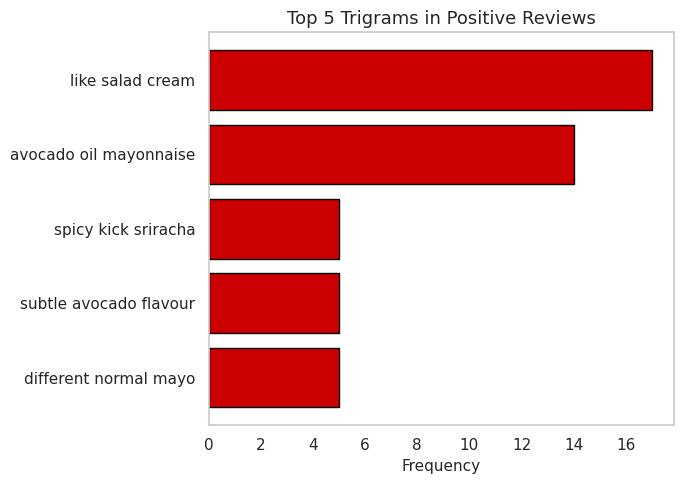

In [156]:
# Filter only Positive reviews with clean comments
positive_df = df_reviews[
    (df_reviews['vader_sentiment_label'] == 'Positive') &
    (df_reviews['clean_comment'].notna())
]

# Trigram extraction
vectorizer_tri = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
X_tri = vectorizer_tri.fit_transform(positive_df['clean_comment'])

# Sum frequencies
trigram_counts = X_tri.sum(axis=0).A1
trigram_terms = vectorizer_tri.get_feature_names_out()

trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(5)

# Plot for Positive Reviews
plt.figure(figsize=(7, 5))
plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='#cc0000', edgecolor='black')
plt.title("Top 5 Trigrams in Positive Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.tight_layout()
plt.grid(False)
plt.show()


### Negative Trigrams

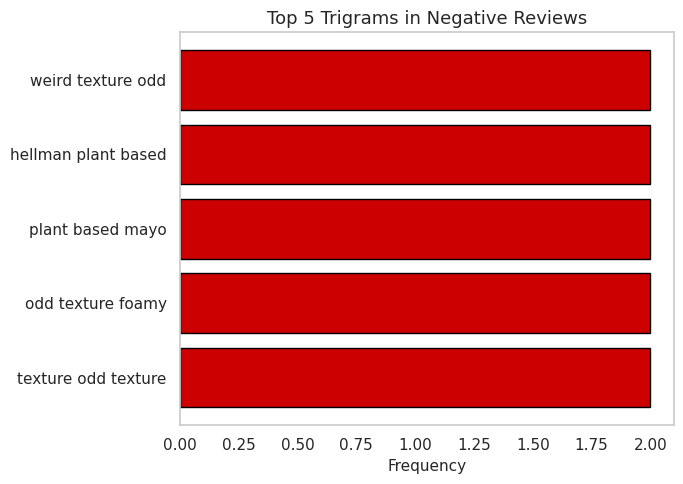

In [157]:
# Filter only Positive reviews with clean comments
positive_df = df_reviews[
    (df_reviews['vader_sentiment_label'] == 'Negative') &
    (df_reviews['clean_comment'].notna())
]

# Trigram extraction
vectorizer_tri = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
X_tri = vectorizer_tri.fit_transform(positive_df['clean_comment'])

# Sum frequencies
trigram_counts = X_tri.sum(axis=0).A1
trigram_terms = vectorizer_tri.get_feature_names_out()

trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(5)

# Plot for Positive Reviews
plt.figure(figsize=(7, 5))
plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='#cc0000', edgecolor='black')
plt.title("Top 5 Trigrams in Negative Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.tight_layout()
plt.grid(False)
plt.show()


### Neutral Trigrams

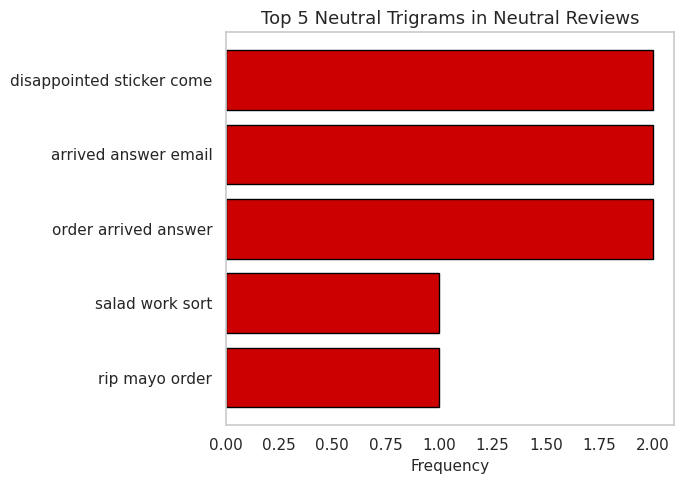

In [158]:
# Filter only Positive reviews with clean comments
positive_df = df_reviews[
    (df_reviews['vader_sentiment_label'] == 'Neutral') &
    (df_reviews['clean_comment'].notna())
]

# Trigram extraction
vectorizer_tri = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
X_tri = vectorizer_tri.fit_transform(positive_df['clean_comment'])

# Sum frequencies
trigram_counts = X_tri.sum(axis=0).A1
trigram_terms = vectorizer_tri.get_feature_names_out()

trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(5)

# Plot for Positive Reviews
plt.figure(figsize=(7, 5))
plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='#cc0000', edgecolor='black')
plt.title("Top 5 Neutral Trigrams in Neutral Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.tight_layout()
plt.grid(False)
plt.show()

In [159]:
# Export Trigrams by Sentiment
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Prepare storage
all_trigrams = []

# Loop through sentiments
for sentiment in ['Positive', 'Negative', 'Neutral']:
    df_sent = df_reviews[
        (df_reviews['vader_sentiment_label'] == sentiment) &
        (df_reviews['clean_comment'].notna())
    ].copy()

    if df_sent.empty:
        continue

    comments = df_sent['clean_comment'].tolist()
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
    X = vectorizer.fit_transform(comments)
    trigram_counts = X.sum(axis=0).A1
    trigram_terms = vectorizer.get_feature_names_out()

    trigram_df = pd.DataFrame({
        'trigram': trigram_terms,
        'count': trigram_counts
    })

    top_trigrams = trigram_df.sort_values(by='count', ascending=False).head(5)
    top_trigrams['sentiment'] = sentiment
    top_trigrams['comment_count'] = len(comments)

    all_trigrams.append(top_trigrams)

# Combine and export
if all_trigrams:
    trigram_combined = pd.concat(all_trigrams)
    trigram_combined.to_csv('trigrams_by_sentiment.csv', index=False)
    print(" Exported to 'trigrams_by_sentiment.csv'")
else:
    print(" No trigrams found.")


 Exported to 'trigrams_by_sentiment.csv'


### Postive Trigrams by Time

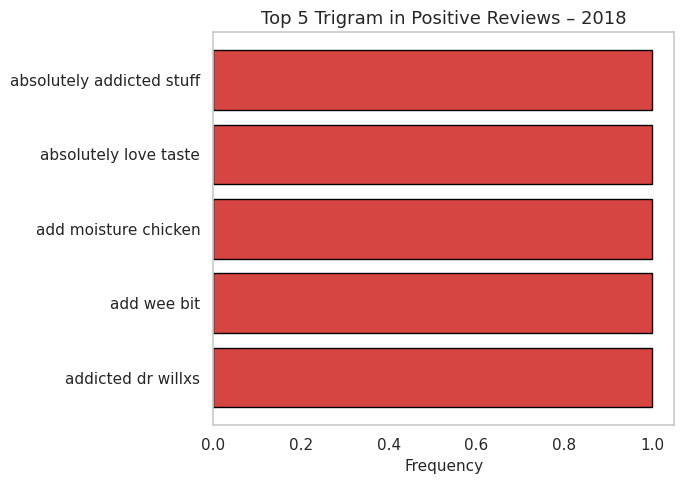

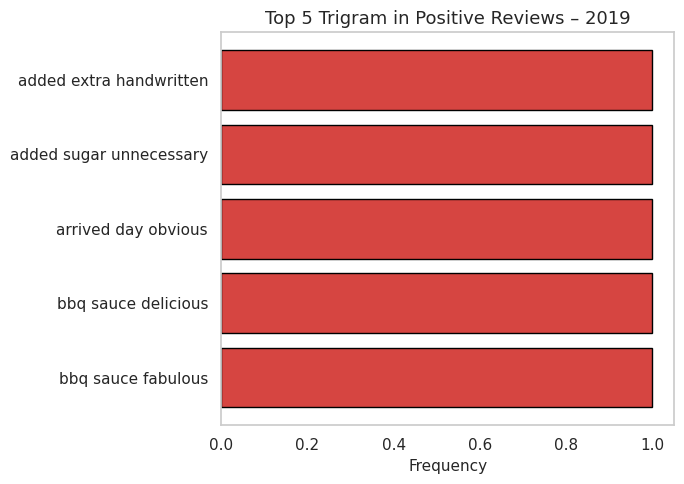

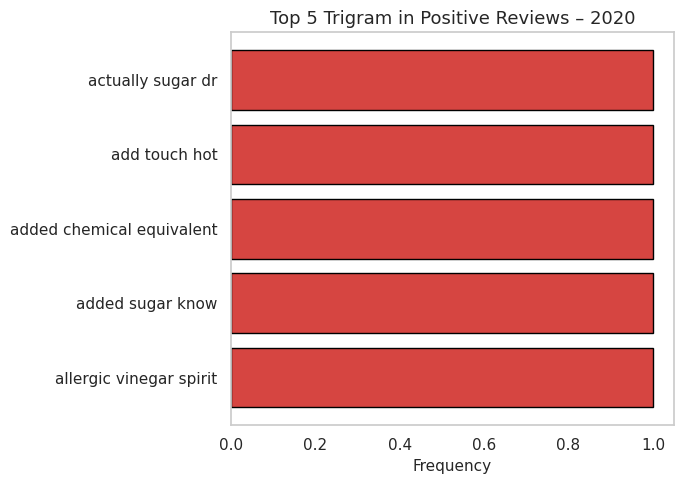

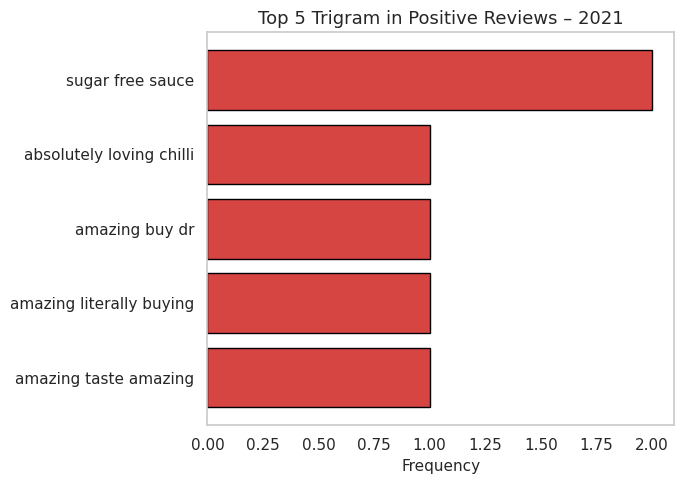

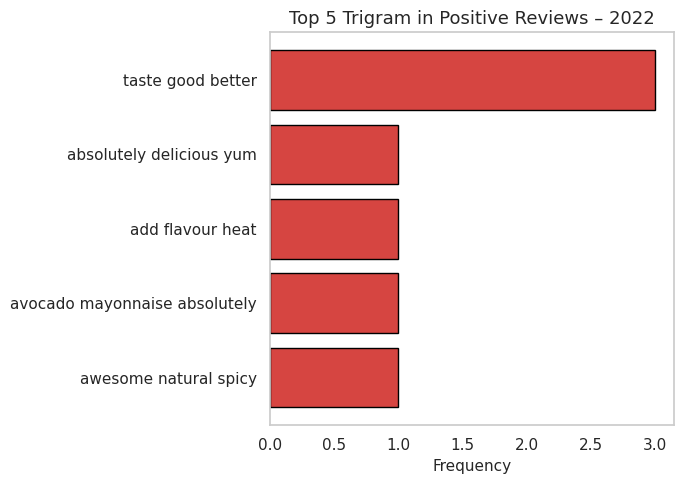

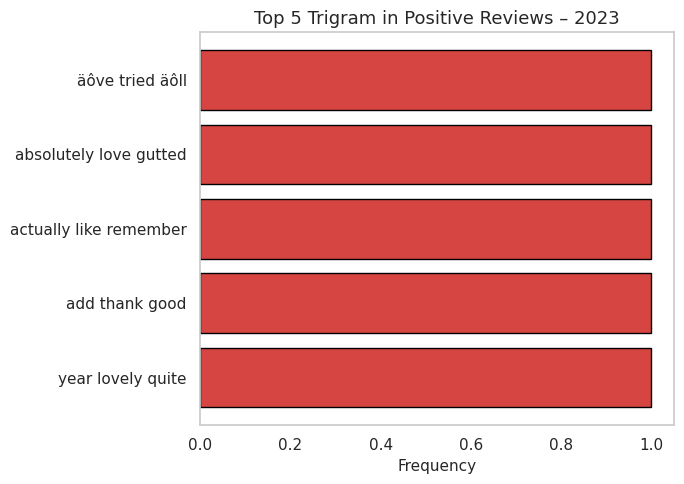

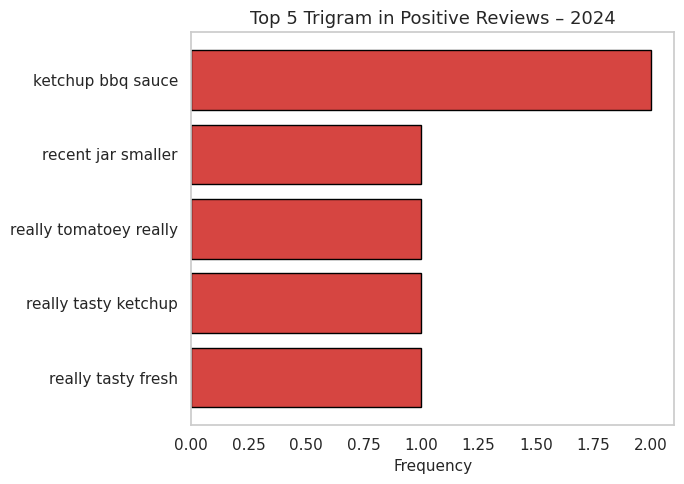

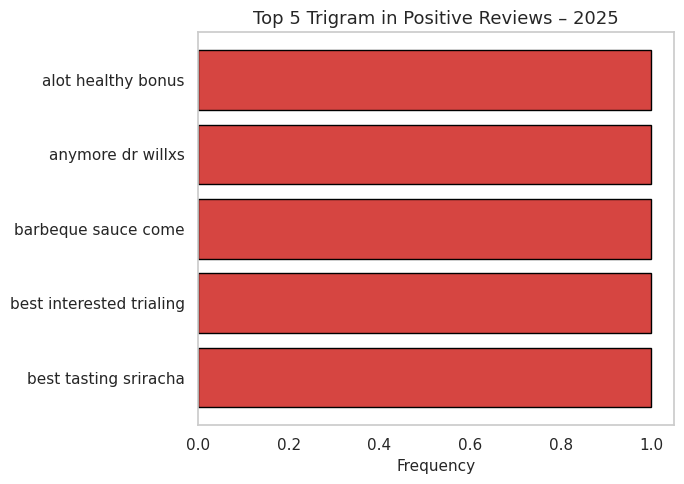

In [223]:
# Ensure 'date' is in datetime format
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# Create a 'year' column
df_reviews['year'] = df_reviews['date'].dt.year

#  Filter for Positive reviews with clean comments
positive_df = df_reviews[
    (df_reviews['vader_sentiment_label'] == 'Positive') &
    (df_reviews['clean_comment'].notna())
].copy()

# Loop over each year in the data
vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
years = positive_df['year'].dropna().unique()
years = sorted(years)

for year in years:
    yearly_df = positive_df[positive_df['year'] == year]
    comments = yearly_df['clean_comment'].dropna().tolist()

    if len(comments) < 5:
        print(f"Skipping {year} – not enough comments.")
        continue

    # Extract trigrams
    X = vectorizer.fit_transform(comments)
    trigram_counts = X.sum(axis=0).A1
    trigram_terms = vectorizer.get_feature_names_out()

    trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
    top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(5)

    # Plot
    plt.figure(figsize=(7, 5))
    plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='#D64541', edgecolor='black')
    plt.title(f"Top 5 Trigram in Positive Reviews – {int(year)}", fontsize=13)
    plt.xlabel("Frequency", fontsize=11)
    plt.tight_layout()
    plt.grid(False)
    plt.show()


## Negative + Neutral Trigrams by Time


Skipping 2018 – not enough comments.
Skipping 2020 – not enough comments.
Skipping 2022 – not enough comments.
Skipping 2023 – not enough comments.


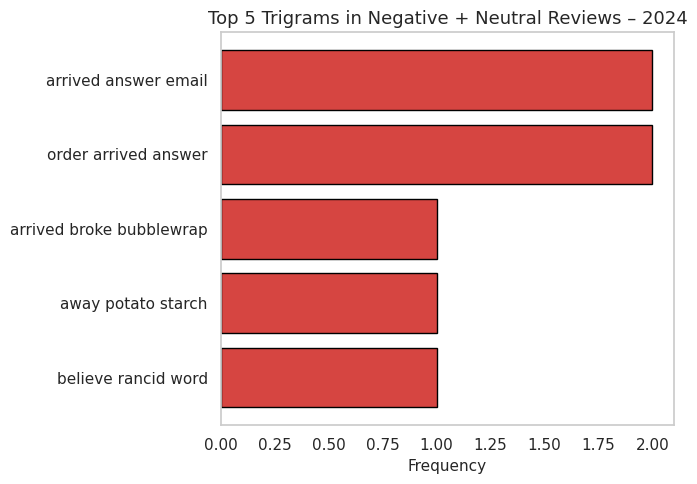

In [224]:
# Step 1: Convert 'date' to datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# Step 2: Create 'year' column
df_reviews['year'] = df_reviews['date'].dt.year

# Step 3: Filter for Negative + Neutral reviews with clean comments
filtered_df = df_reviews[
    (df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])) &
    (df_reviews['clean_comment'].notna())
].copy()

# Step 4: Loop over each year
vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
years = filtered_df['year'].dropna().unique()
years = sorted(years)

for year in years:
    yearly_df = filtered_df[filtered_df['year'] == year]
    comments = yearly_df['clean_comment'].dropna().tolist()

    if len(comments) < 5:
        print(f"Skipping {year} – not enough comments.")
        continue

    # Extract trigrams
    X = vectorizer.fit_transform(comments)
    trigram_counts = X.sum(axis=0).A1
    trigram_terms = vectorizer.get_feature_names_out()

    trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
    top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(5)

    # Plot
    plt.figure(figsize=(7, 5))
    plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='#D64541', edgecolor='black')
    plt.title(f"Top 5 Trigrams in Negative + Neutral Reviews – {year}", fontsize=13)
    plt.xlabel("Frequency", fontsize=11)
    plt.tight_layout()
    plt.grid(False)
    plt.show()


## N-gram by Product Group

### Postive Trigram by Product

In [225]:
# Positive Trigram by Product Group

# Function to plot trigrams for positive reviews of a selected product
def plot_positive_trigrams(product_name):
    clear_output(wait=True)

    # Filter data
    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Positive') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No positive reviews for {product_name}")
        return

    # Trigram extraction
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    trigram_counts = X.sum(axis=0).A1
    trigram_terms = vectorizer.get_feature_names_out()

    trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
    top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='#D64541', edgecolor='black')
    plt.title(f"Top Positive Trigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Create dropdown
product_dropdown_trigram = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Connect dropdown to plot
widgets.interact(plot_positive_trigrams, product_name=product_dropdown_trigram)


interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=('Avocado Mayo', 'B…

<function __main__.plot_positive_trigrams(product_name)>

### Negative Trigram by Product

In [226]:
# Function to plot trigrams for negative reviews of a selected product
def plot_negative_trigrams(product_name):
    clear_output(wait=True)

    # Filter data
    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Negative') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No negative reviews for {product_name}")
        return

    # Trigram extraction
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    trigram_counts = X.sum(axis=0).A1
    trigram_terms = vectorizer.get_feature_names_out()

    trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
    top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='#D64541', edgecolor='black')
    plt.title(f"Top Negative Trigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Create dropdown
product_dropdown_neg_trigram = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Connect dropdown to plot
widgets.interact(plot_negative_trigrams, product_name=product_dropdown_neg_trigram)


interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=('Avocado Mayo', 'B…

<function __main__.plot_negative_trigrams(product_name)>

## Neutral Trigram by Product

In [227]:
# Function to plot trigrams for neutral reviews of a selected product
def plot_neutral_trigrams(product_name):
    clear_output(wait=True)

    # Filter data
    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Neutral') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No neutral reviews for {product_name}")
        return

    # Trigram extraction
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    trigram_counts = X.sum(axis=0).A1
    trigram_terms = vectorizer.get_feature_names_out()

    trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
    top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='#D64541', edgecolor='black')
    plt.title(f"Top Neutral Trigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Create dropdown
product_dropdown_neutral_trigram = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Connect dropdown to plot
widgets.interact(plot_neutral_trigrams, product_name=product_dropdown_neutral_trigram)


interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=('Avocado Mayo', 'B…

<function __main__.plot_neutral_trigrams(product_name)>

In [167]:
# Total reviews
total_reviews = len(df_reviews)

# Filter Negative + Neutral
neg_neu_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])]
problem_reviews = len(neg_neu_df)

# Calculate %
problem_pct = round((problem_reviews / total_reviews) * 100, 1)

# Print summary
print(f"📊 Total Reviews: {total_reviews}")
print(f"❗ Negative + Neutral Reviews: {problem_reviews}")
print(f"⚠️ These represent {problem_pct}% of all reviews.")


📊 Total Reviews: 843
❗ Negative + Neutral Reviews: 107
⚠️ These represent 12.7% of all reviews.


In [168]:
# Prepare list to store all rows
all_product_trigrams = []

# Loop over all combinations of product group and sentiment
product_groups = sorted(df_reviews['product_group'].dropna().unique())
sentiments = ['Positive', 'Negative', 'Neutral']

for product in product_groups:
    for sentiment in sentiments:
        df_filtered = df_reviews[
            (df_reviews['product_group'] == product) &
            (df_reviews['vader_sentiment_label'] == sentiment) &
            (df_reviews['clean_comment'].notna())
        ]

        if df_filtered.empty:
            print(f"Skipping {product} – {sentiment}: no comments found.")
            continue

        comments = df_filtered['clean_comment'].tolist()
        vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)

        try:
            X = vectorizer.fit_transform(comments)
            if X.shape[1] == 0:
                print(f"Skipping {product} – {sentiment}: no valid trigrams.")
                continue
        except ValueError:
            print(f"Skipping {product} – {sentiment}: empty vocabulary.")
            continue

        trigram_counts = X.sum(axis=0).A1
        trigram_terms = vectorizer.get_feature_names_out()

        trigram_df = pd.DataFrame({
            'trigram': trigram_terms,
            'count': trigram_counts
        })

        top_trigrams = trigram_df.sort_values(by='count', ascending=False).head(10)
        top_trigrams['product_group'] = product
        top_trigrams['sentiment'] = sentiment
        top_trigrams['comment_count'] = len(comments)

        all_product_trigrams.append(top_trigrams)

# Combine and export
if all_product_trigrams:
    trigrams_by_product_sentiment = pd.concat(all_product_trigrams)
    trigrams_by_product_sentiment.to_csv("trigrams_by_product_group.csv", index=False)
    print(" Exported to 'trigrams_by_product_group.csv'")
else:
    print(" No trigrams found to export.")



Skipping Buffalo Hot Sauce – Negative: no comments found.
Skipping Caesar Dressing – Negative: no comments found.
Skipping Caesar Dressing – Neutral: no comments found.
Skipping Chipotle Ranch – Negative: empty vocabulary.
Skipping Chipotle Ranch – Neutral: no comments found.
 Exported to 'trigrams_by_product_group.csv'


## Theme Analysis

In [169]:
# Define your themes exactly as provided
themes = {
    'high_approval': [
        'amazing', 'awesome', 'love', 'delicious', 'bundle', 'dream', 'yummy', 'congrats', 'wicked', 'killing',
        'try', 'well done', 'delish', 'omg', 'lush', 'woweee', 'great', 'good', 'brilliant', 'yum', 'exciting',
        'wow', 'lovely', 'favourite', 'xxx', 'congratulations', 'rushing', 'huge', 'creation', 'fantastic',
        'unbelievable', 'hello'
    ],
    'price_value': [
        'price', 'expensive', 'ordered', 'box', 'value', 'waitrose', 'srp', 'cost', 'money', 'cheap', 'deal', '£'
    ],
    'packaging_issue': [
        'squeeze', 'bottle', 'nozzle', 'kit', 'shrunk', 'jar', 'lid', 'top', 'packaging', 'cap', 'broken', 'seal', 'manufacture'
    ],
    'taste_issue': [
        'taste', 'tastes', 'crap', 'bland', 'hot', 'sundried', 'pasta', 'chicken', 'bad', 'flavour', 'awful',
        'aftertaste', 'sour', 'weird', 'disgusting'
    ],
    'product_mismatch': [
        'sriracha', 'ketchup', 'wills', 'dr', 'heinz', 'mayo', 'sauce', 'different', 'wrong', 'fake', 'misleading', 'label'
    ],
    'ingredient_concern': [
         'oil', 'tbsp', 'pan', 'add', 'new', 'vegan', 'tortilla', 'egg', 'sugar',
        'preservative', 'salt', 'ingredient', 'stevia'
    ]
}

# Filter only negative + neutral reviews
problem_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])].copy()
problem_df = problem_df[problem_df['clean_comment'].notna()]

# Assign themes based on keyword matching
def tag_themes(text):
    text = text.lower()
    matches = [theme for theme, keywords in themes.items() if any(kw in text for kw in keywords)]
    return matches if matches else ['other']

problem_df['themes'] = problem_df['clean_comment'].apply(tag_themes)

# Explode theme column for counting
theme_exploded = problem_df.explode('themes')

# Count frequency
theme_counts = theme_exploded['themes'].value_counts().reset_index()
theme_counts.columns = ['theme', 'count']

theme_counts


theme  count
0    product_mismatch     67
1         taste_issue     58
2  ingredient_concern     32
3       high_approval     25
4     packaging_issue     19
5         price_value     13
6               other     13

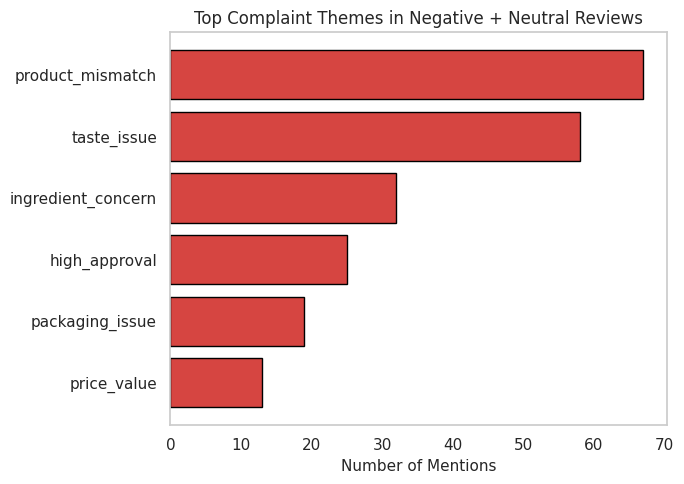

In [228]:
import matplotlib.pyplot as plt

# Only include themes that aren't 'positive_feedback' or 'other' for cleaner view
plot_df = theme_counts[~theme_counts['theme'].isin(['positive_feedback', 'other'])].copy()

# Sort for better visuals
plot_df = plot_df.sort_values(by='count', ascending=True)

# Plot
plt.figure(figsize=(7, 5))
plt.barh(plot_df['theme'], plot_df['count'], color='#D64541', edgecolor='black')

# Labels and layout
plt.title("Top Complaint Themes in Negative + Neutral Reviews", fontsize=12)
plt.xlabel("Number of Mentions", fontsize=11)
plt.ylabel("")
plt.grid(False)
plt.tight_layout()
plt.show()

In [171]:
 themes = {
    'high_approval': [
        'amazing', 'awesome', 'love', 'delicious', 'bundle', 'dream', 'yummy', 'congrats', 'wicked', 'killing',
        'try', 'well done', 'delish', 'omg', 'lush', 'woweee', 'great', 'good', 'brilliant', 'yum', 'exciting',
        'wow', 'lovely', 'favourite', 'xxx', 'congratulations', 'rushing', 'huge', 'creation', 'fantastic',
        'unbelievable', 'hello'
    ],
    'price_value': [
        'price', 'expensive', 'ordered', 'box', 'value', 'waitrose', 'srp', 'cost', 'money', 'cheap', 'deal', '£'
    ],
    'packaging_issue': [
        'squeeze', 'bottle', 'nozzle', 'kit', 'shrunk', 'jar', 'lid', 'top', 'packaging', 'cap', 'broken', 'seal', 'manufacture'
    ],
    'taste_issue': [
        'taste', 'tastes', 'crap', 'bland', 'hot', 'sundried', 'pasta', 'chicken', 'bad', 'flavour', 'awful',
        'aftertaste', 'sour', 'weird', 'disgusting'
    ],
    'product_mismatch': [
        'sriracha', 'ketchup', 'wills', 'dr', 'heinz', 'mayo', 'sauce', 'different', 'wrong', 'fake', 'misleading', 'label'
    ],
    'ingredient_concern': [
         'oil', 'tbsp', 'pan', 'add', 'new', 'vegan', 'tortilla', 'egg', 'sugar',
        'preservative', 'salt', 'ingredient', 'stevia'
    ]
}

In [172]:
def tag_themes_flexible(text):
    text = text.lower()
    matched_themes = []
    for theme, keywords in themes.items():
        for keyword in keywords:
            if keyword in text:
                matched_themes.append(theme)
                break  # only one match per theme
    return matched_themes if matched_themes else ['other']

In [173]:
problem_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])].copy()
problem_df = problem_df[problem_df['clean_comment'].notna()]

problem_df['themes'] = problem_df['clean_comment'].apply(tag_themes_flexible)

In [174]:
theme_exploded = problem_df.explode('themes')
theme_counts = theme_exploded['themes'].value_counts().reset_index()
theme_counts.columns = ['theme', 'count']
theme_counts

theme  count
0    product_mismatch     67
1         taste_issue     58
2  ingredient_concern     32
3       high_approval     25
4     packaging_issue     19
5         price_value     13
6               other     13

## Net Promoter Score & Star Ratings

### NPS = % Promoters - % Detractors


In [176]:
# Map VADER sentiment to NPS category
def map_to_nps_label(sentiment):
    if sentiment == 'Positive':
        return 'Promoter'
    elif sentiment == 'Neutral':
        return 'Passive'
    else:
        return 'Detractor'

df_reviews['nps_category'] = df_reviews['vader_sentiment_label'].apply(map_to_nps_label)

# Count totals
nps_counts = df_reviews['nps_category'].value_counts(normalize=True) * 100

# Calculate NPS
nps_score = nps_counts.get('Promoter', 0) - nps_counts.get('Detractor', 0)

# Display
print("NPS Breakdown (%):")
print(nps_counts.round(2))
print(f"\nNet Promoter Score (NPS): {nps_score:.2f}")

NPS Breakdown (%):
nps_category
Promoter     87.31
Detractor     7.24
Passive       5.46
Name: proportion, dtype: float64

Net Promoter Score (NPS): 80.07


In [177]:
nps_score = nps_counts.get('Promoter', 0) - nps_counts.get('Detractor', 0)

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=nps_score,
    title={'text': "Net Promoter Score"},
    gauge={
        'axis': {'range': [-100, 100]},
        'bar': {'color': "crimson"},
        'steps': [
            {'range': [-100, 0], 'color': '#800000'},
            {'range': [0, 50], 'color': '#cc0000'},
            {'range': [50, 100], 'color': '#ff4d4d'}
        ]
    }
))
fig.update_layout(height=300, width=500)
fig.show()

### NPS by Product Group

In [178]:
# Map sentiment to NPS category
df_reviews['nps_category'] = df_reviews['vader_sentiment_label'].map({
    'Positive': 'Promoter',
    'Neutral': 'Passive',
    'Negative': 'Detractor'
})

# Group by product_group and NPS category
product_group_counts = df_reviews.groupby(['product_group', 'nps_category']).size().unstack(fill_value=0)

# Calculate % per category
product_group_percent = product_group_counts.div(product_group_counts.sum(axis=1), axis=0) * 100

# Calculate NPS = % Promoter - % Detractor
product_group_percent['NPS'] = product_group_percent.get('Promoter', 0) - product_group_percent.get('Detractor', 0)

# View result
product_nps = product_group_percent[['Promoter', 'Passive', 'Detractor', 'NPS']].round(1)
product_nps = product_nps.sort_values(by='NPS', ascending=False)

product_nps

nps_category        Promoter  Passive  Detractor    NPS
product_group                                          
Caesar Dressing        100.0      0.0        0.0  100.0
Buffalo Hot Sauce       94.4      5.6        0.0   94.4
Jalapeño Hot Sauce      92.1      2.6        5.3   86.8
Sriracha Hot Sauce      88.0     10.0        2.0   86.0
Sriracha Mayo           90.6      4.7        4.7   85.9
Classic Mayo            91.0      3.4        5.6   85.4
Tomato Ketchup          88.7      6.5        4.8   83.9
Vegan Mayo              87.1      4.8        8.1   79.0
BBQ Sauce               84.9      8.1        7.0   77.9
Avocado Mayo            77.5      9.8       12.7   64.7
Chipotle Ranch          50.0      0.0       50.0    0.0

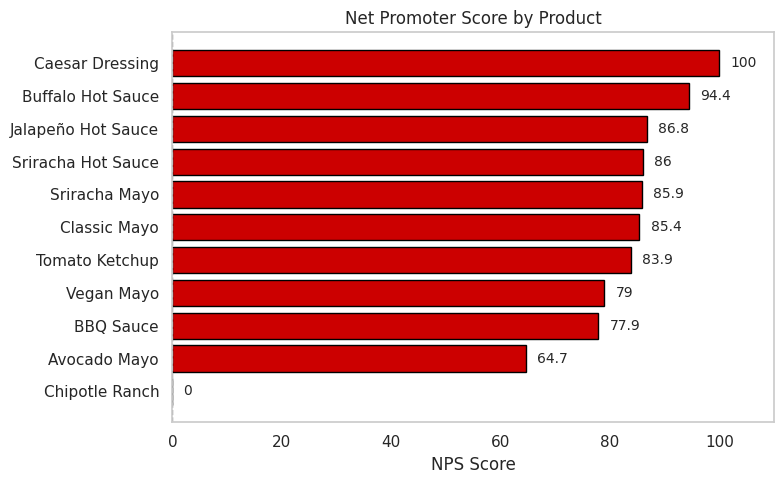

In [181]:
fig, ax = plt.subplots(figsize=(8, 5))
product_nps_sorted = product_nps.sort_values(by="NPS", ascending=True)

bars = ax.barh(product_nps_sorted.index, product_nps_sorted["NPS"], color="#CC0000", edgecolor="black")

# Custom label formatter
def format_label(val):
    return f'{val:.0f}' if val % 1 == 0 else f'{val:.1f}'

labels = [format_label(val) for val in product_nps_sorted["NPS"]]
ax.bar_label(bars, labels=labels, label_type='edge', padding=8, fontsize=10)

ax.axvline(0, color="gray", linestyle="--", linewidth=1)
ax.set_title("Net Promoter Score by Product")
ax.set_xlabel("NPS Score")

# Add spacing to the x-axis
ax.set_xlim(0, product_nps_sorted["NPS"].max() + 10)

ax.grid(False)
plt.tight_layout()
plt.show()


In [182]:
# First, count number of reviews per product
review_counts = df_reviews.groupby('product_group').size().reset_index(name='review_count')

# Assuming you have a DataFrame with NPS values per product
# For example: df_nps with columns ['product', 'nps']

# Merge them
product_nps = product_nps.merge(review_counts, on='product_group', how='left')

# Preview the result
print(product_nps.sort_values(by='NPS', ascending=False))


         product_group  Promoter  Passive  Detractor    NPS  review_count
0      Caesar Dressing     100.0      0.0        0.0  100.0             5
1    Buffalo Hot Sauce      94.4      5.6        0.0   94.4            18
2   Jalapeño Hot Sauce      92.1      2.6        5.3   86.8           114
3   Sriracha Hot Sauce      88.0     10.0        2.0   86.0            50
4        Sriracha Mayo      90.6      4.7        4.7   85.9            64
5         Classic Mayo      91.0      3.4        5.6   85.4            89
6       Tomato Ketchup      88.7      6.5        4.8   83.9           124
7           Vegan Mayo      87.1      4.8        8.1   79.0            62
8            BBQ Sauce      84.9      8.1        7.0   77.9            86
9         Avocado Mayo      77.5      9.8       12.7   64.7           102
10      Chipotle Ranch      50.0      0.0       50.0    0.0             2


###  NPS by Platform

In [183]:
# Group by source and NPS category
source_counts = df_reviews.groupby(['source', 'nps_category']).size().unstack(fill_value=0)

# Calculate % per category
source_percent = source_counts.div(source_counts.sum(axis=1), axis=0) * 100

# Calculate NPS
source_percent['NPS'] = source_percent.get('Promoter', 0) - source_percent.get('Detractor', 0)

# View result
source_nps = source_percent[['Promoter', 'Passive', 'Detractor', 'NPS']].round(1)
source_nps = source_nps.sort_values(by='NPS', ascending=False)

source_nps

nps_category  Promoter  Passive  Detractor   NPS
source                                          
Yotpo             87.0      8.9        4.1  83.0
Tesco             89.8      1.8        8.4  81.3
Ocado             86.0      3.5       10.5  75.5
Waitrose          83.3      4.2       12.5  70.8

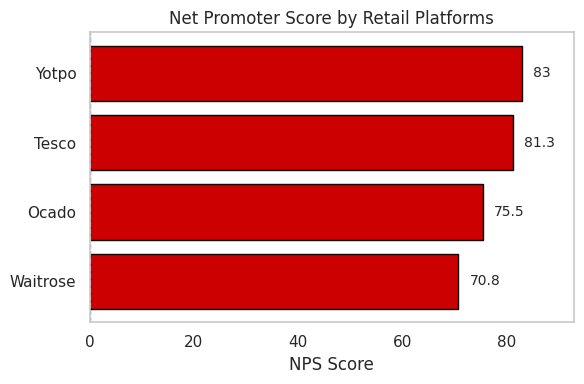

In [185]:
fig, ax = plt.subplots(figsize=(6, 4))
source_nps_sorted = source_nps.sort_values(by="NPS", ascending=True)

bars = ax.barh(source_nps_sorted.index, source_nps_sorted["NPS"], color="#CC0000", edgecolor="black")

# Custom label formatter
def format_label(val):
    return f'{val:.0f}' if val % 1 == 0 else f'{val:.1f}'

labels = [format_label(val) for val in source_nps_sorted["NPS"]]
ax.bar_label(bars, labels=labels, label_type='edge', padding=8, fontsize=10)

ax.axvline(0, color="gray", linestyle="--", linewidth=1)
ax.set_title("Net Promoter Score by Retail Platforms")
ax.set_xlabel("NPS Score")

# Add for clean spacing
ax.set_xlim(0, source_nps_sorted["NPS"].max() + 10)

ax.grid(False)
plt.tight_layout()
plt.show()


In [186]:
# Cross-tab NPS × Sentiment (normalised per NPS group)
nps_sentiment_ct = pd.crosstab(
    df_reviews['nps_category'],
    df_reviews['vader_sentiment_label'],
    normalize='index'
) * 100  # convert to percentages

# Round for cleaner display
nps_sentiment_ct = nps_sentiment_ct.round(1)

# Display table
print("4.2.4 Cross-Tab: NPS × Sentiment (%)")
display(nps_sentiment_ct)


4.2.4 Cross-Tab: NPS × Sentiment (%)


vader_sentiment_label  Negative  Neutral  Positive
nps_category                                      
Detractor                 100.0      0.0       0.0
Passive                     0.0    100.0       0.0
Promoter                    0.0      0.0     100.0

In [187]:
df_reviews[['rating', 'nps_category', 'vader_sentiment_label']].sample(10)

rating nps_category vader_sentiment_label
300       5     Promoter              Positive
167       5     Promoter              Positive
680       5     Promoter              Positive
805       2    Detractor              Negative
144       5     Promoter              Positive
379       5     Promoter              Positive
579       4     Promoter              Positive
6         4    Detractor              Negative
545       5     Promoter              Positive
314       5     Promoter              Positive

### STAR Rating

In [188]:
# Count how many reviews for each star rating
df_reviews['rating'].value_counts().sort_index()

rating
1     77
2     25
3     52
4     90
5    599
Name: count, dtype: int64

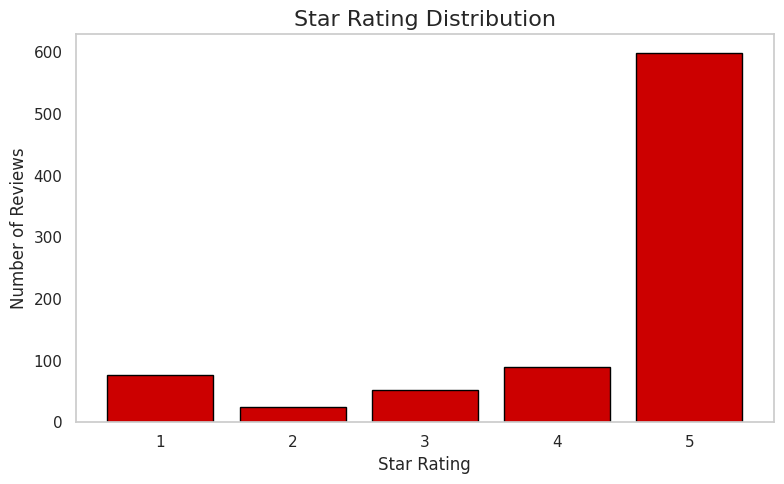

In [189]:
# Count and sort star ratings
rating_counts = df_reviews['rating'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values, color='#CC0000', edgecolor='black')
plt.title('Star Rating Distribution', fontsize=16)
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rating_counts.index)
plt.grid(False)
plt.tight_layout()
plt.show()

In [190]:
print("Yotpo:", df_yotpo.shape[0])
print("External:", df_external.shape[0])

Yotpo: 370
External: 473


In [191]:
# Count reviews by source and rating
rating_counts = df_reviews.groupby(['source', 'rating']).size().reset_index(name='count')

# Total reviews per source
total_counts = df_reviews.groupby('source').size().reset_index(name='total_reviews')

# Merge and calculate percentage of 5-star reviews
rating_merged = pd.merge(rating_counts, total_counts, on='source')
rating_merged['percentage'] = (rating_merged['count'] / rating_merged['total_reviews']) * 100

# Filter only 5-star ratings
five_star = rating_merged[rating_merged['rating'] == 5]

# Find retailer with highest % of 5-star reviews
top_retailer = five_star.sort_values(by='percentage', ascending=False).head(1)

# Display result
print("Retailer with highest % of 5-star reviews:")
print(top_retailer[['source', 'percentage']])


Retailer with highest % of 5-star reviews:
   source  percentage
19  Yotpo   83.513514


In [192]:
# Count reviews by source and rating
rating_counts = df_reviews.groupby(['source', 'rating']).size().reset_index(name='count')

# Total reviews per source
total_counts = df_reviews.groupby('source').size().reset_index(name='total_reviews')

# Merge and calculate percentage of 5-star reviews
rating_merged = pd.merge(rating_counts, total_counts, on='source')
rating_merged['percentage'] = (rating_merged['count'] / rating_merged['total_reviews']) * 100

# Filter only 5-star ratings
five_star = rating_merged[rating_merged['rating'] == 5]

# Sort by percentage (highest to lowest)
five_star_sorted = five_star.sort_values(by='percentage', ascending=False)

# Display table


print("Percentage of 5-star reviews by platform:")
display(five_star_sorted[['source', 'percentage']])


Percentage of 5-star reviews by platform:


source  percentage
19     Yotpo   83.513514
14  Waitrose   81.250000
9      Tesco   67.555556
4      Ocado   49.500000

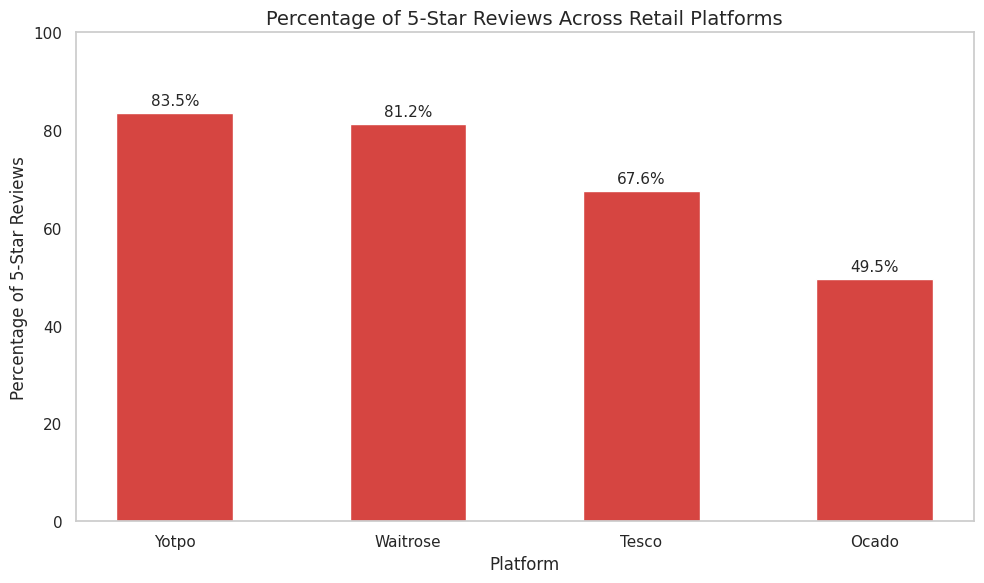

In [193]:
# Bar chart to visualise percentage of 5-star reviews by platform with value labels and straight x-axis labels
plt.figure(figsize=(10, 6))
bars = plt.bar(five_star_sorted['source'], five_star_sorted['percentage'], color='#D64541',width=0.5)

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=11)

plt.xlabel('Platform', fontsize=12)
plt.ylabel('Percentage of 5-Star Reviews', fontsize=12)
plt.title('Percentage of 5-Star Reviews Across Retail Platforms', fontsize=14)

# Keep x-axis labels horizontal
plt.xticks(rotation=0)

plt.ylim(0, 100)
plt.tight_layout()
plt.grid(False)
plt.show()



## Time Analysis

In [194]:
# Convert the 'date' column to datetime objects, coercing errors to NaT
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

years = df_reviews['date'].dt.year.dropna().astype(int).unique()

print("Years in your data:", sorted(years))

Years in your data: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]


In [195]:
df_reviews.shape

(843, 12)

### Number of reviews per month



In [196]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])  # Convert to datetime
df_reviews.set_index('date', inplace=True)  # Set as index

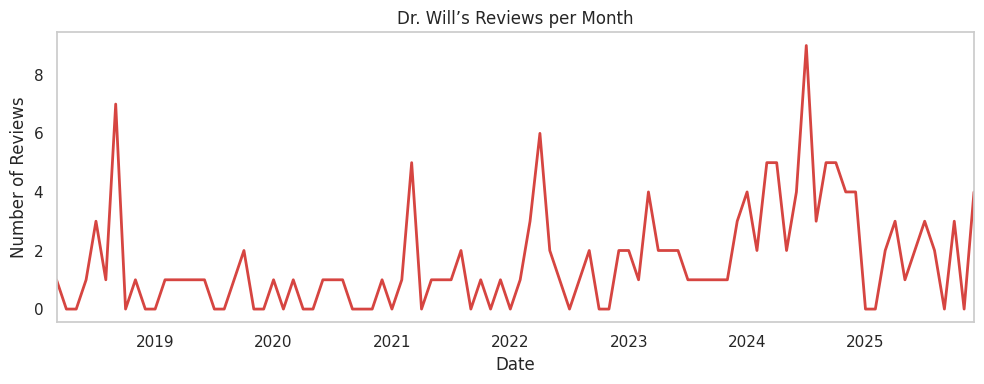

In [197]:
# Resample to month‐end buckets and count
monthly_counts = df_reviews.resample('ME').size().rename('review_count')

# Plot
plt.figure(figsize=(10, 4))
monthly_counts.plot(color='#D64541', linewidth=2)
plt.title("Dr. Will’s Reviews per Month")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.grid(False)
plt.show()

### Monthly average sentiment over time

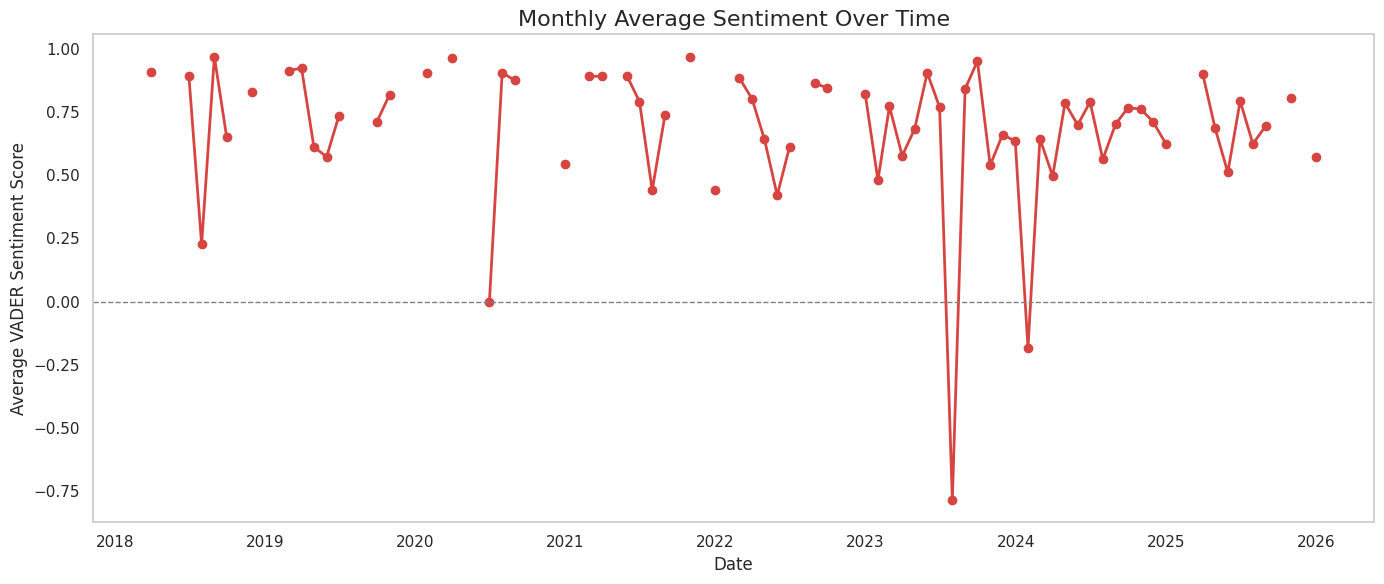

In [198]:
# Resample using 'ME' (Month-End) to avoid deprecation warning
monthly_sentiment = df_reviews.resample('ME')['vader_score'].mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_sentiment.index, monthly_sentiment, color='#D64541', linewidth=2, marker='o')

plt.title("Monthly Average Sentiment Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average VADER Sentiment Score", fontsize=12)
plt.grid(False)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

In [199]:
print(df_reviews['vader_score'].describe()) # to check the above graph

count    843.000000
mean       0.646073
std        0.407227
min       -0.944200
25%        0.585900
50%        0.812600
75%        0.911750
max        0.989200
Name: vader_score, dtype: float64


### Rolling Average


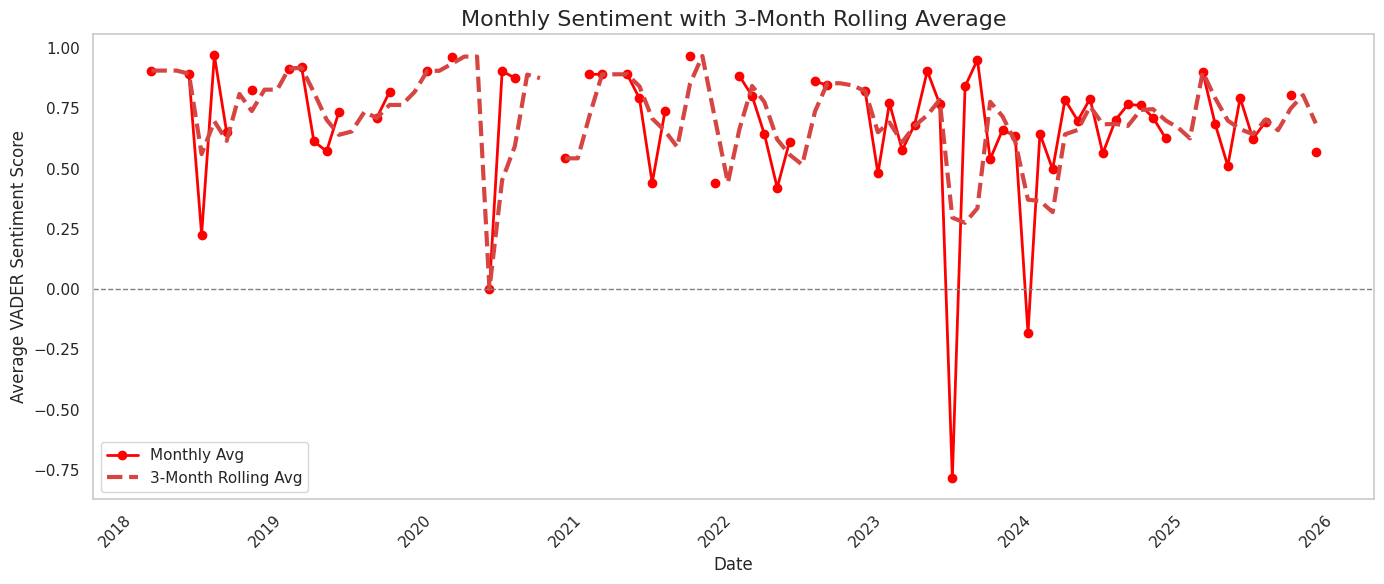

In [200]:
# Calculate 3-month rolling average
rolling_avg = monthly_sentiment.rolling(window=3, min_periods=1).mean()

# Plot both original and rolling average
plt.figure(figsize=(14, 6))
plt.plot(monthly_sentiment.index, monthly_sentiment, color='red', linewidth=2, marker='o', label='Monthly Avg')
plt.plot(rolling_avg.index, rolling_avg, color='#D64541', linewidth=3, linestyle='--', label='3-Month Rolling Avg')

# Plotting
plt.title("Monthly Sentiment with 3-Month Rolling Average", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average VADER Sentiment Score", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(False)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [201]:
!pip install ipywidgets

### Sentiment Trend by Product over time

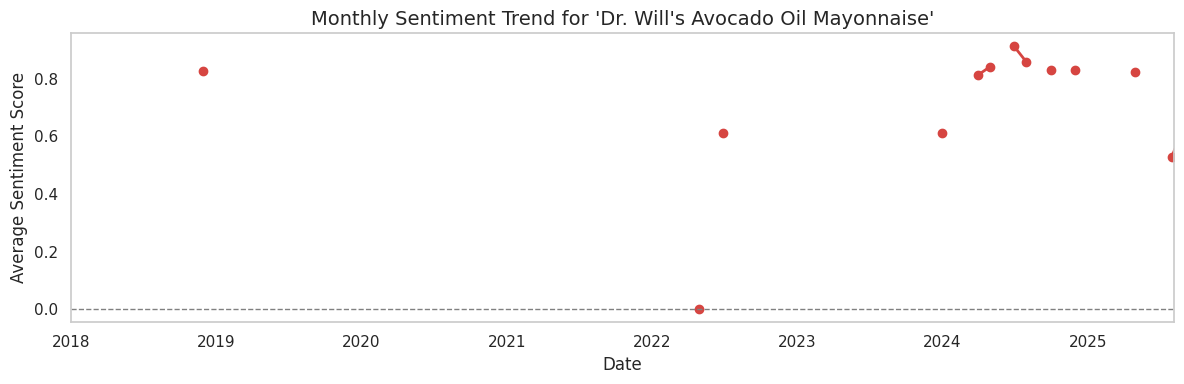

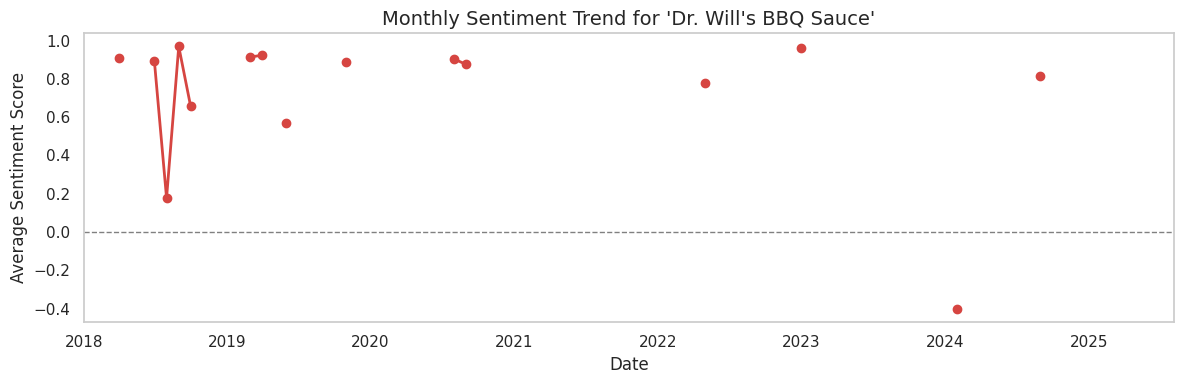

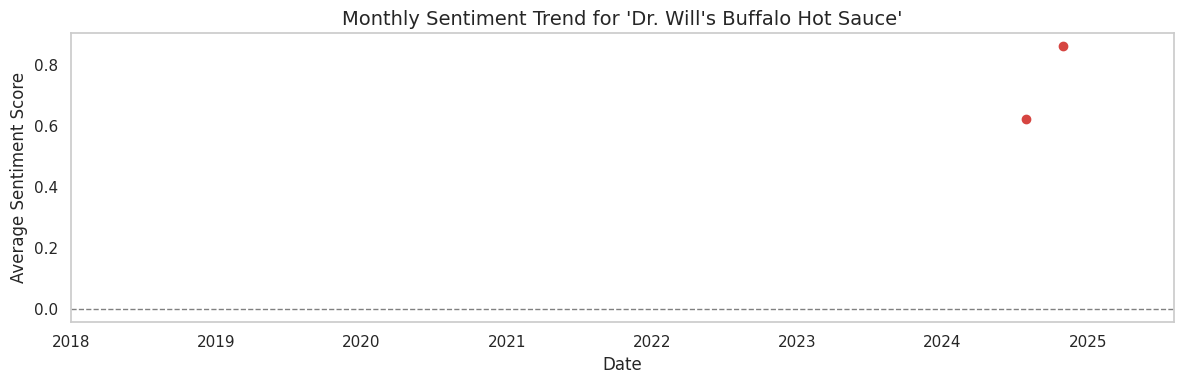

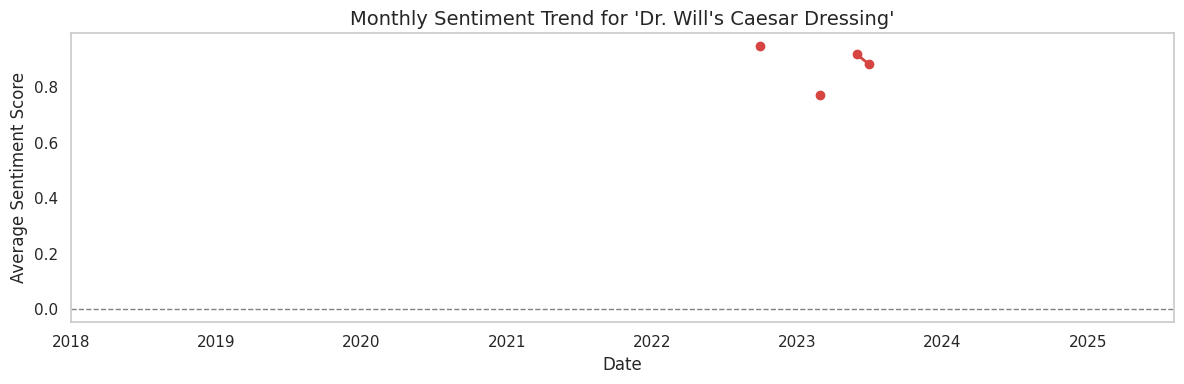

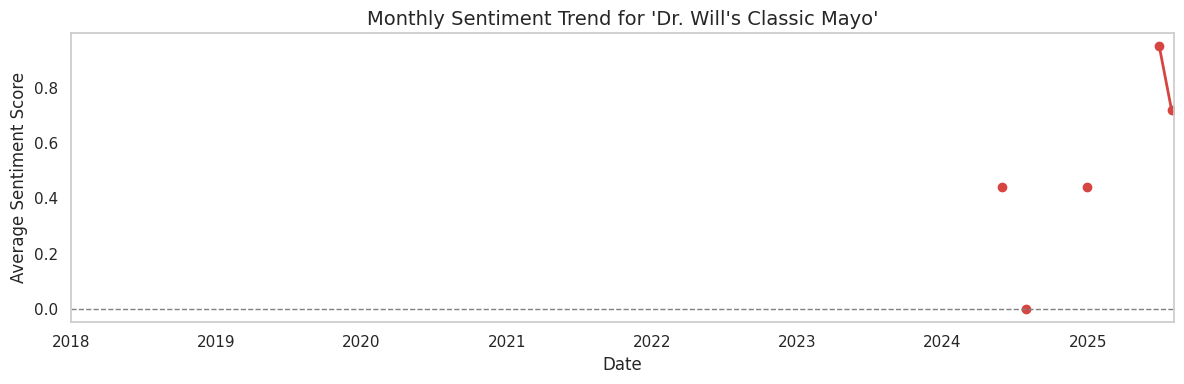

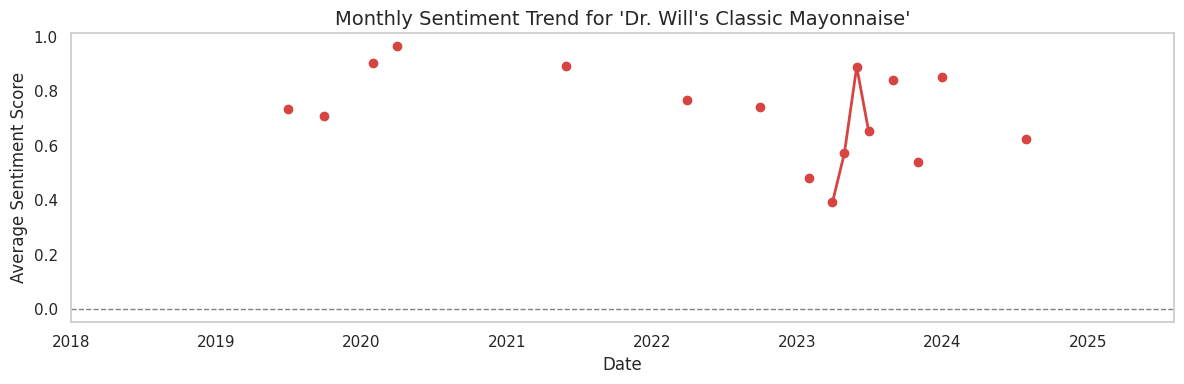

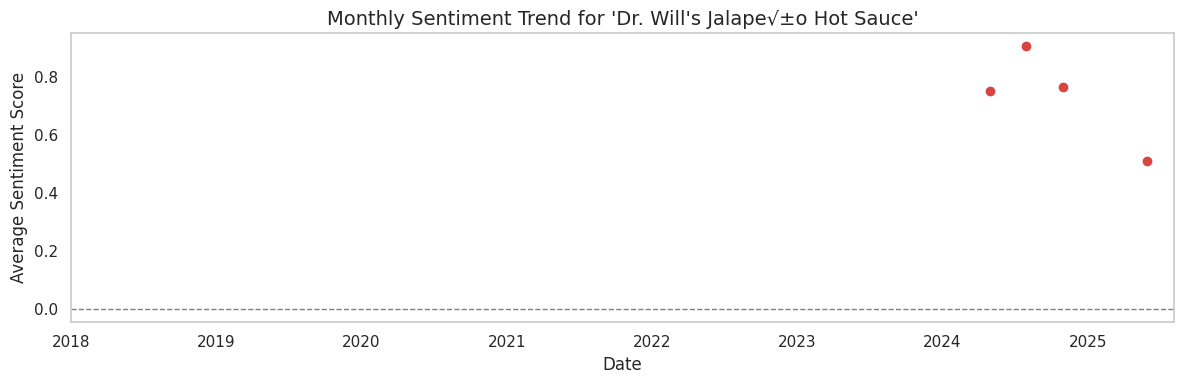

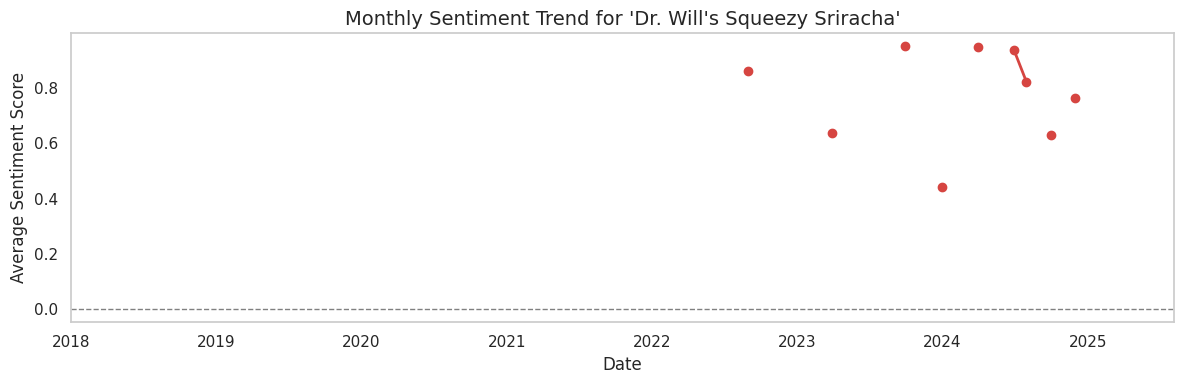

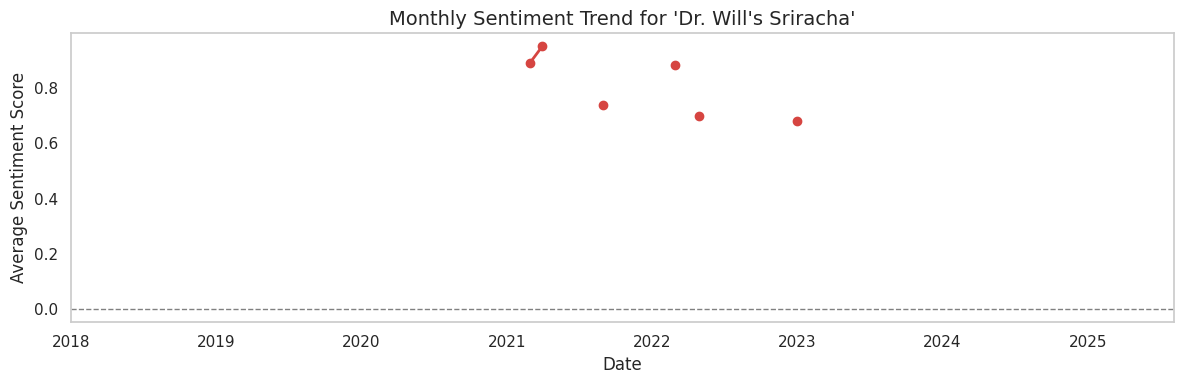

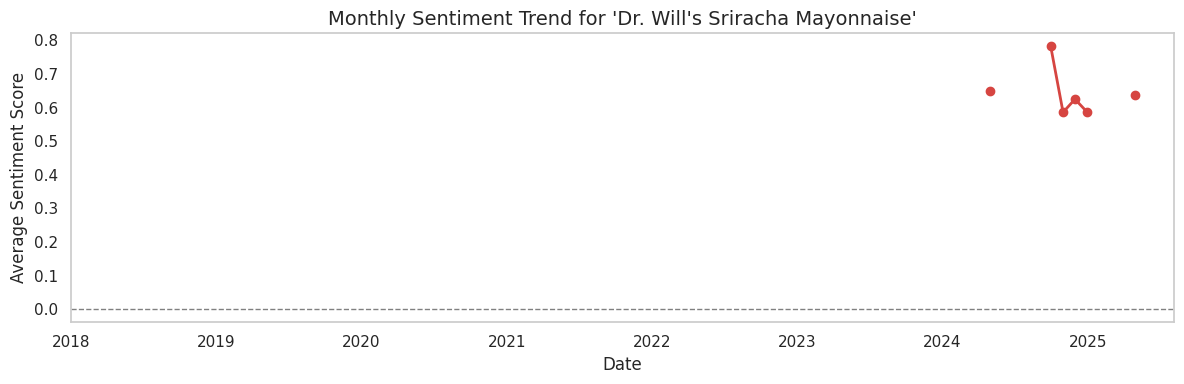

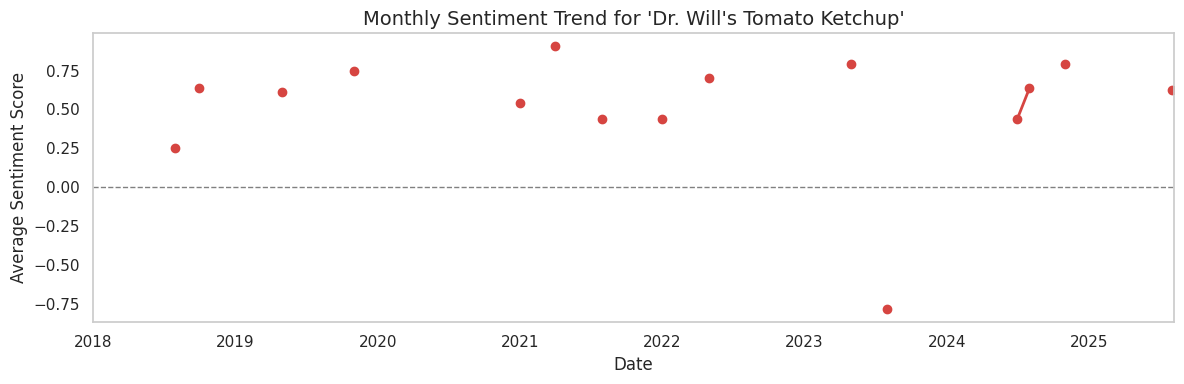

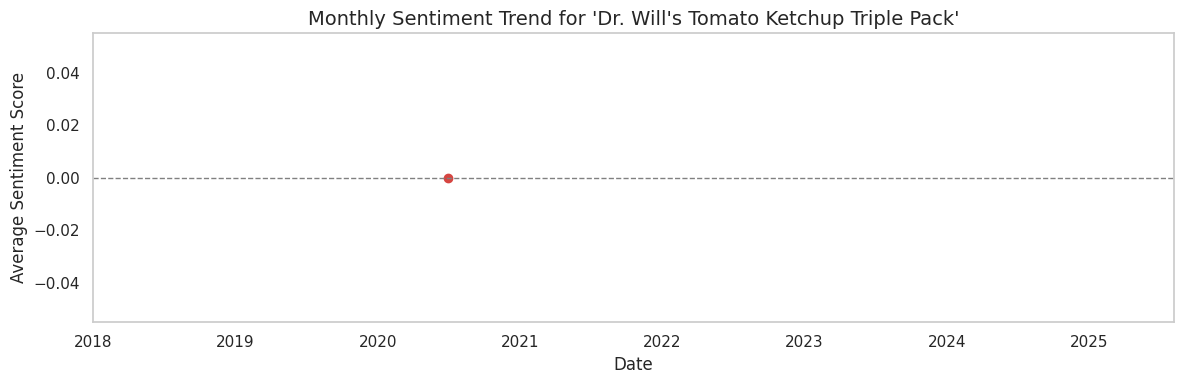

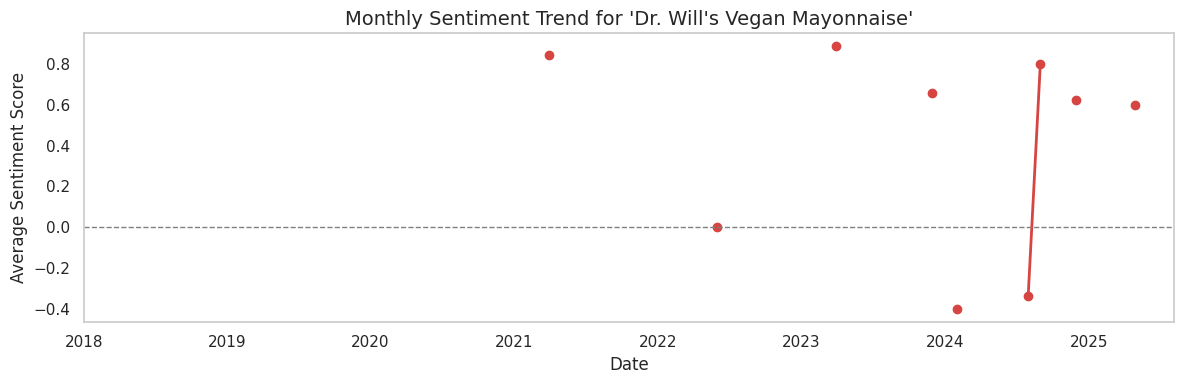

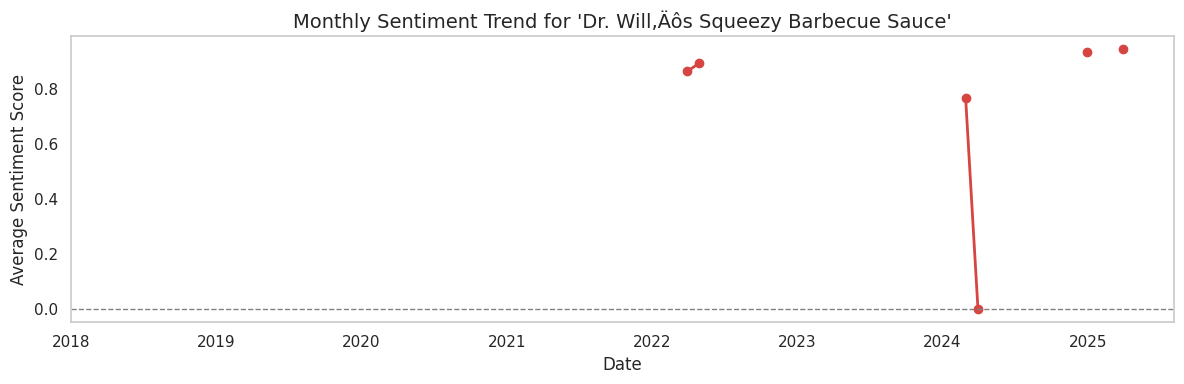

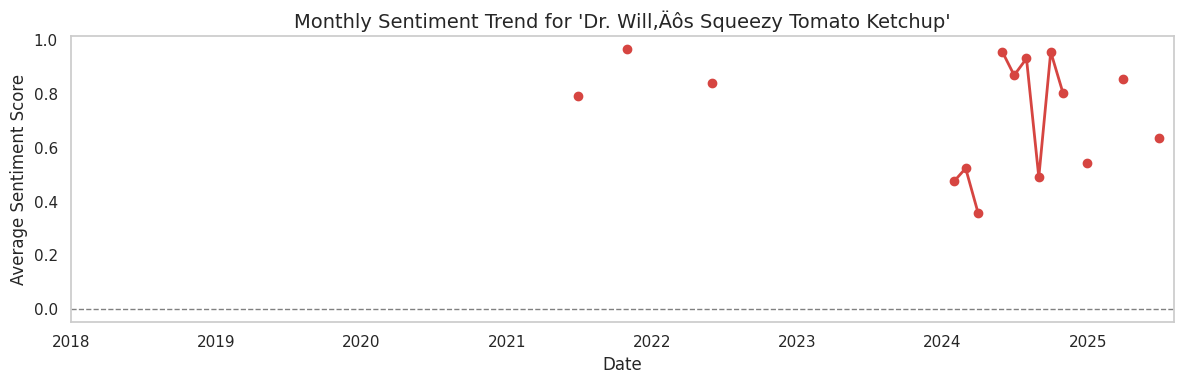

In [204]:
# Convert 'date' column to datetime safely
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# Strictly remove any dates beyond mid-2025
cutoff_date = pd.to_datetime('2025-08-06')
df_reviews = df_reviews[df_reviews['date'] <= cutoff_date]

# Drop any missing values in critical columns
df_clean = df_reviews.dropna(subset=['vader_score', 'product', 'date'])

# Set 'date' as index for resampling
df_clean = df_clean.set_index('date')

# Group by product and resample sentiment monthly
monthly_sentiment_by_product = (
    df_clean
    .groupby('product')
    .resample('ME')['vader_score']  # 'ME' = Month-End
    .mean()
    .reset_index()
)

# Get sorted list of all products
product_options = sorted(monthly_sentiment_by_product['product'].unique())

# Set global x-axis limits (same for all plots)
min_date = pd.to_datetime('2018-01-01')
max_date = pd.to_datetime('2025-08-06')

# Loop through each product and plot sentiment over time
for product in product_options:
    df_filtered = monthly_sentiment_by_product[
        monthly_sentiment_by_product['product'] == product
    ]

    plt.figure(figsize=(12, 4))
    plt.plot(
        df_filtered['date'],
        df_filtered['vader_score'],
        marker='o',
        linewidth=2,
        color='#D64541'
    )
    plt.title(f"Monthly Sentiment Trend for '{product}'", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Average Sentiment Score")
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.xlim(min_date, max_date)  # Ensures consistent x-axis across all charts
    plt.xticks(rotation=0)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [205]:
# to recheck previous graph
monthly_sentiment_by_product[
    monthly_sentiment_by_product['product'] == "Dr. Will's Sriracha"
]

product       date  vader_score
293  Dr. Will's Sriracha 2021-02-28      0.89080
294  Dr. Will's Sriracha 2021-03-31      0.95060
295  Dr. Will's Sriracha 2021-04-30          NaN
296  Dr. Will's Sriracha 2021-05-31          NaN
297  Dr. Will's Sriracha 2021-06-30          NaN
298  Dr. Will's Sriracha 2021-07-31          NaN
299  Dr. Will's Sriracha 2021-08-31      0.73725
300  Dr. Will's Sriracha 2021-09-30          NaN
301  Dr. Will's Sriracha 2021-10-31          NaN
302  Dr. Will's Sriracha 2021-11-30          NaN
303  Dr. Will's Sriracha 2021-12-31          NaN
304  Dr. Will's Sriracha 2022-01-31          NaN
305  Dr. Will's Sriracha 2022-02-28      0.88430
306  Dr. Will's Sriracha 2022-03-31          NaN
307  Dr. Will's Sriracha 2022-04-30      0.70030
308  Dr. Will's Sriracha 2022-05-31          NaN
309  Dr. Will's Sriracha 2022-06-30          NaN
310  Dr. Will's Sriracha 2022-07-31          NaN
311  Dr. Will's Sriracha 2022-08-31          NaN
312  Dr. Will's Sriracha 2022-09-30          NaN
313  Dr. Will's Sriracha 2022-10-31          NaN
314  Dr. Will's Sriracha 2022-11-30          NaN
315  Dr. Will's Sriracha 2022-12-31      0.68020

In [206]:
df_reviews.head()

date  rating                              product  \
3  2025-07-05 11:37:00       5              Dr. Will's Classic Mayo   
7  2025-05-04 13:24:00       2       Dr. Will's Jalape√±o Hot Sauce   
14 2025-06-03 09:53:00       5  Dr. Will‚Äôs Squeezy Tomato Ketchup   
23 2025-08-02 04:35:00       5    Dr. Will's Avocado Oil Mayonnaise   
24 2025-08-02 04:17:00       5  Dr. Will‚Äôs Squeezy Barbecue Sauce   

                                        clean_comment  yotpo_sentiment source  \
3   major tangy ixve never fan mayo hand best woul...         0.428422  Yotpo   
7                               sadly impressed sweet         0.007312  Yotpo   
14                             best tomato sauce ever         0.986636  Yotpo   
23  delicious reasonably priced trace dreaded rape...         0.982266  Yotpo   
24  perfect trifecta taste healthy ingredient pric...         0.969252  Yotpo   

         product_group  vader_score vader_sentiment_label sentiment_flag  \
3         Classic Mayo       0.7193              Positive           None   
7   Jalapeño Hot Sauce       0.5106              Positive           None   
14      Tomato Ketchup       0.6369              Positive           None   
23        Avocado Mayo       0.6369              Positive           None   
24           BBQ Sauce       0.7506              Positive           None   

      year nps_category  
3   2025.0     Promoter  
7   2025.0     Promoter  
14  2025.0     Promoter  
23  2025.0     Promoter  
24  2025.0     Promoter

## Sentiment + NPS Trend by Product

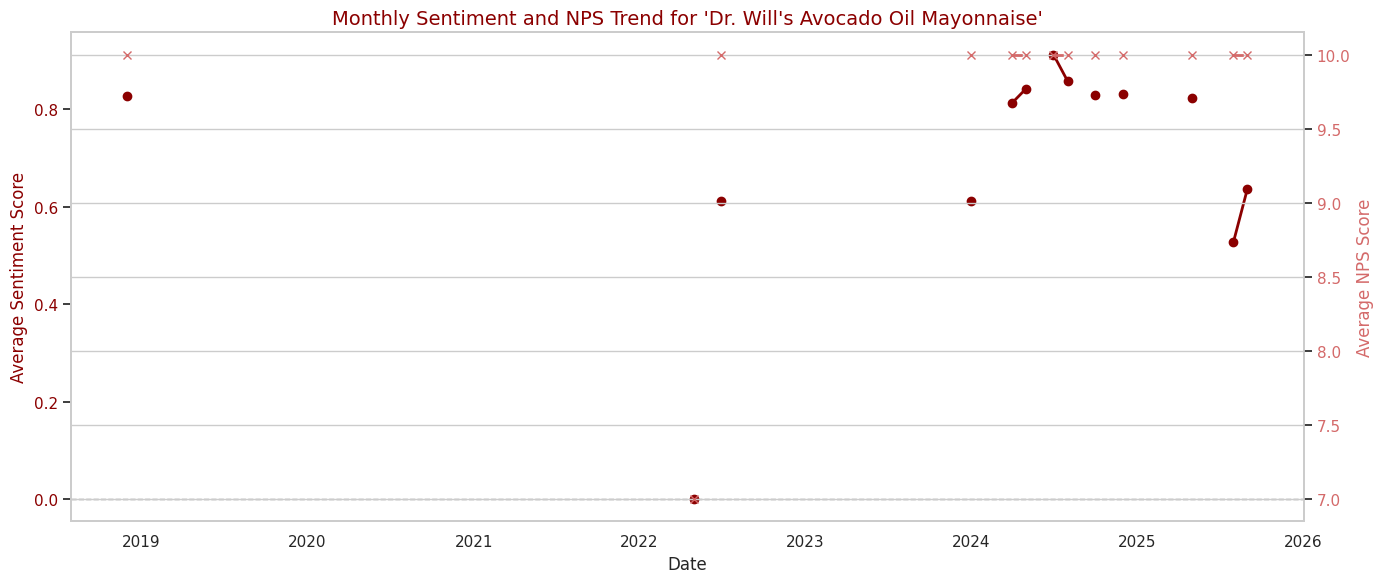

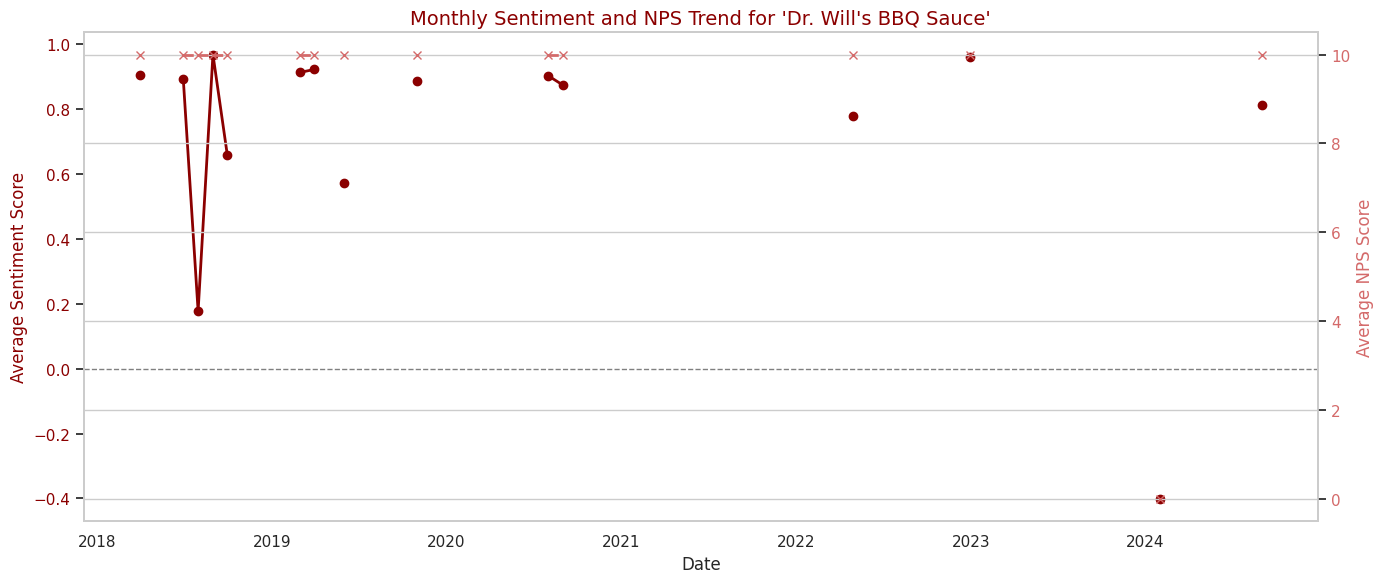

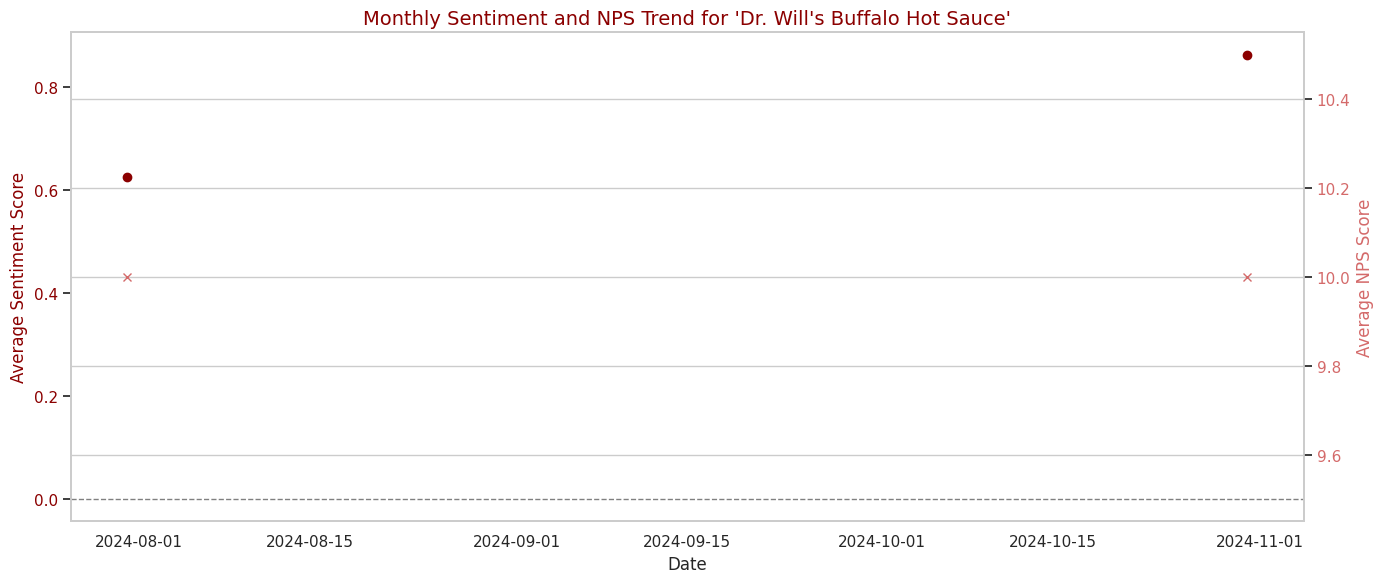

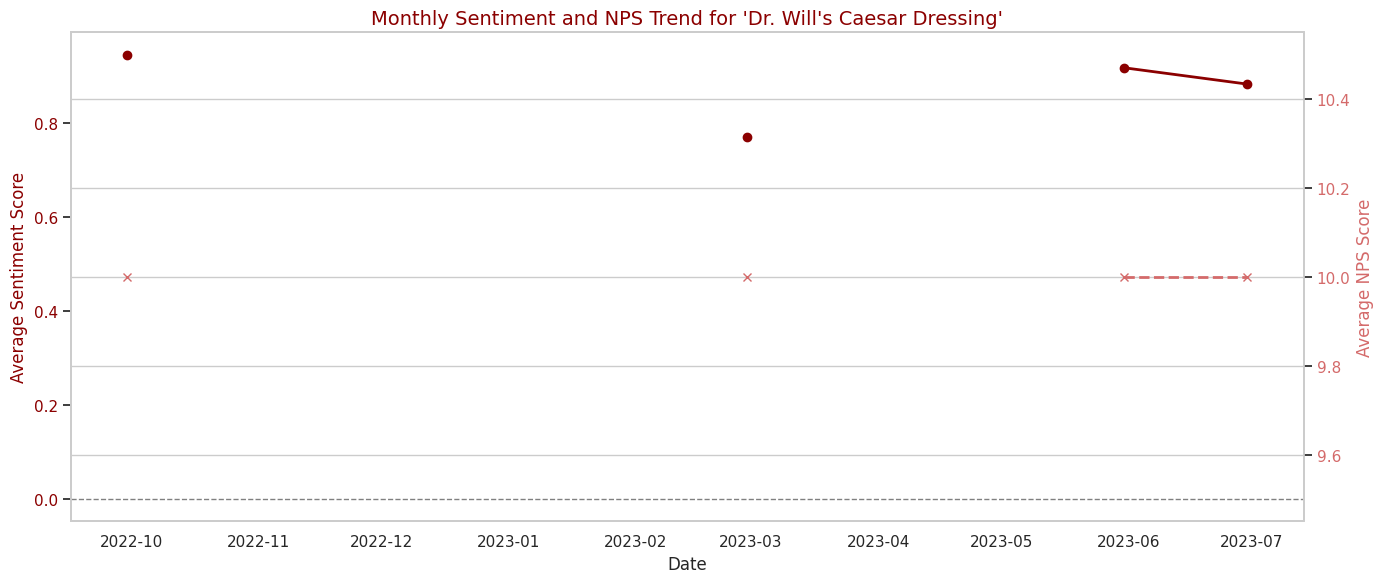

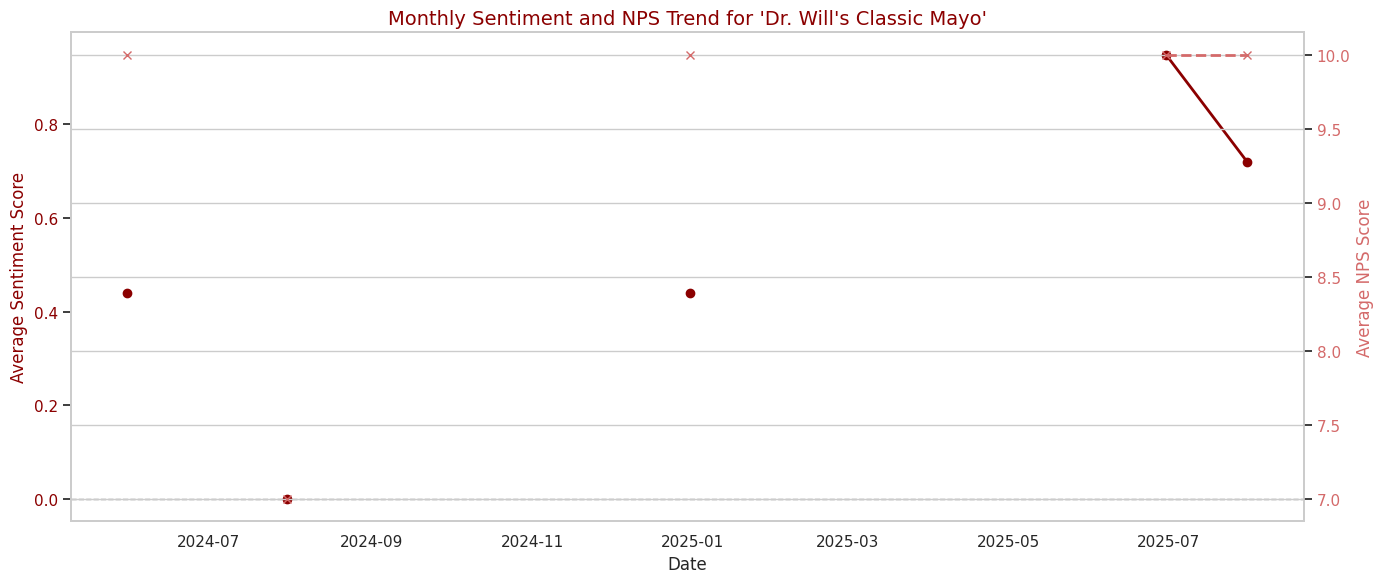

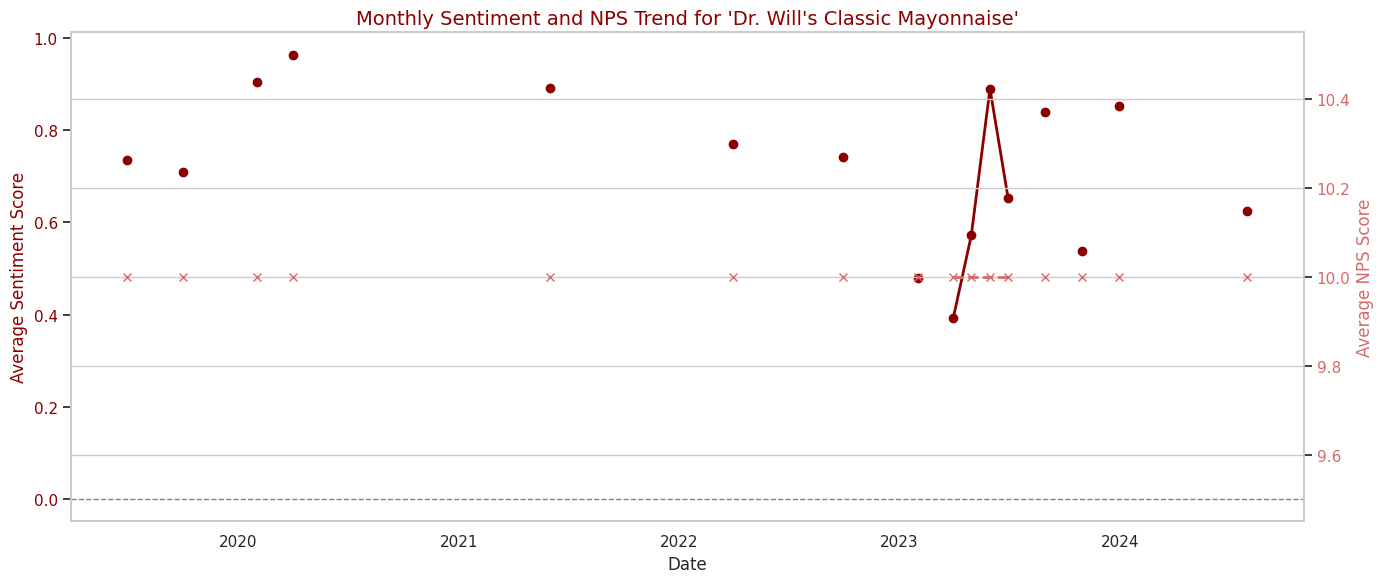

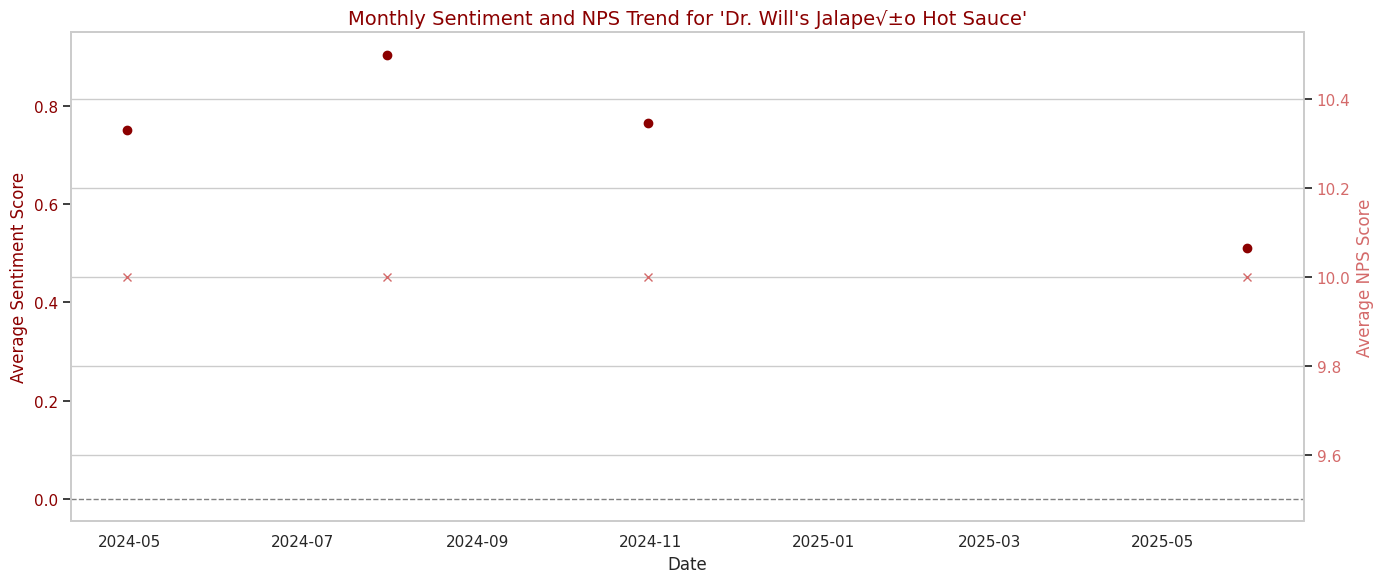

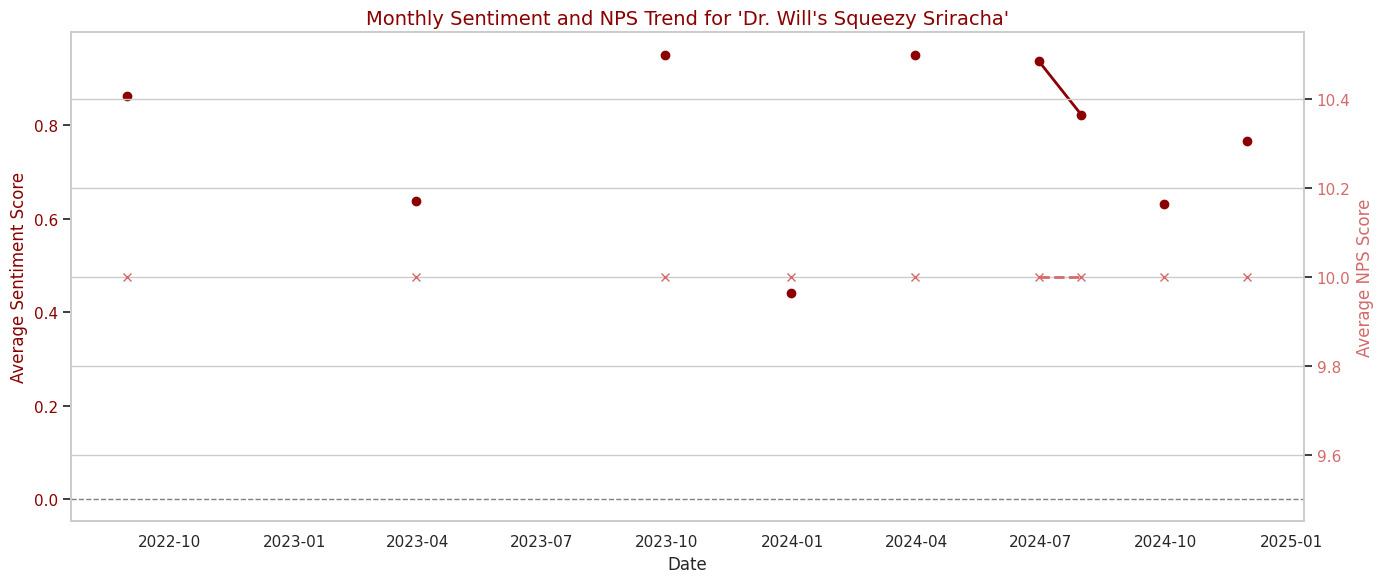

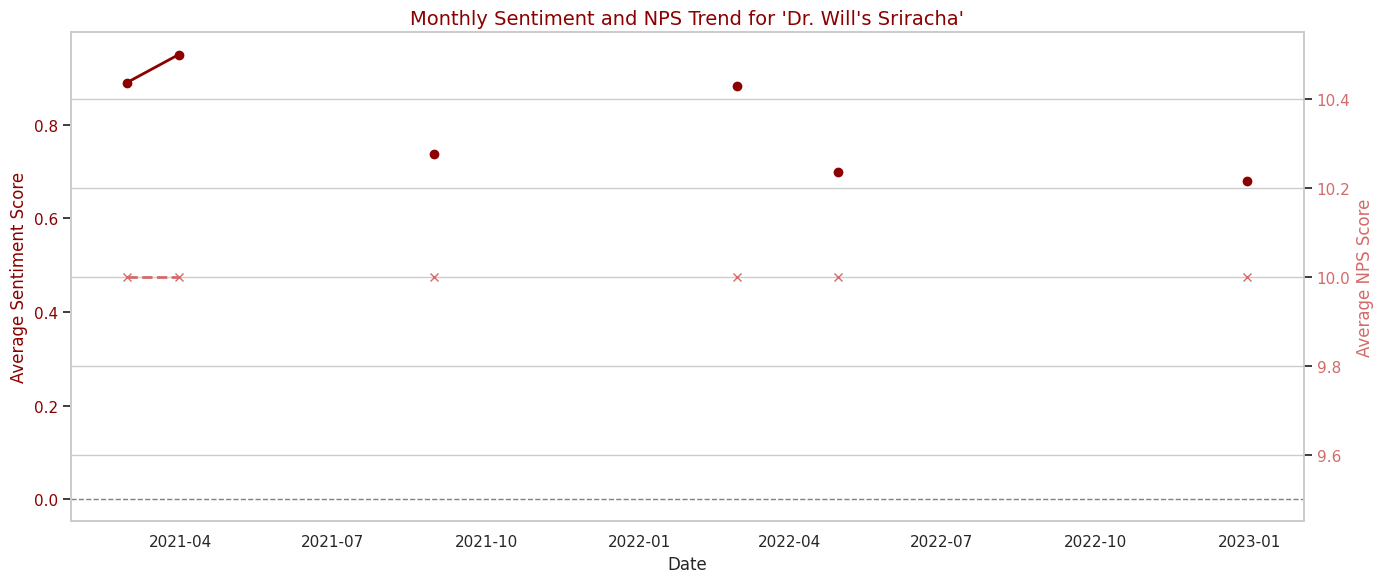

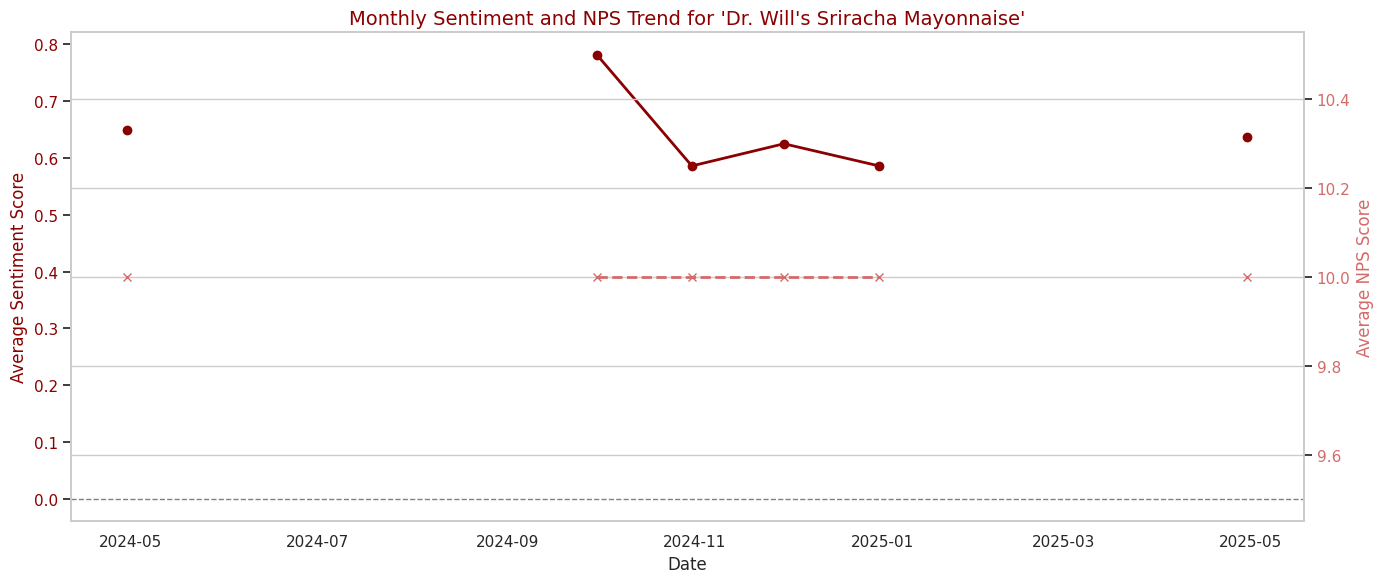

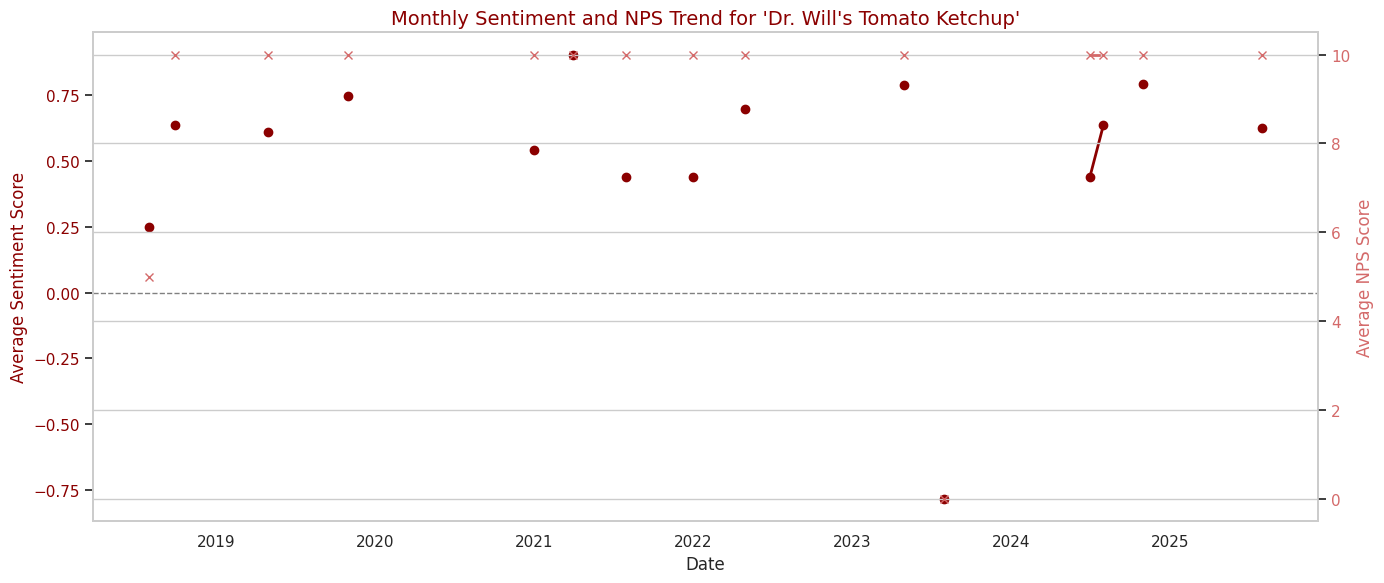

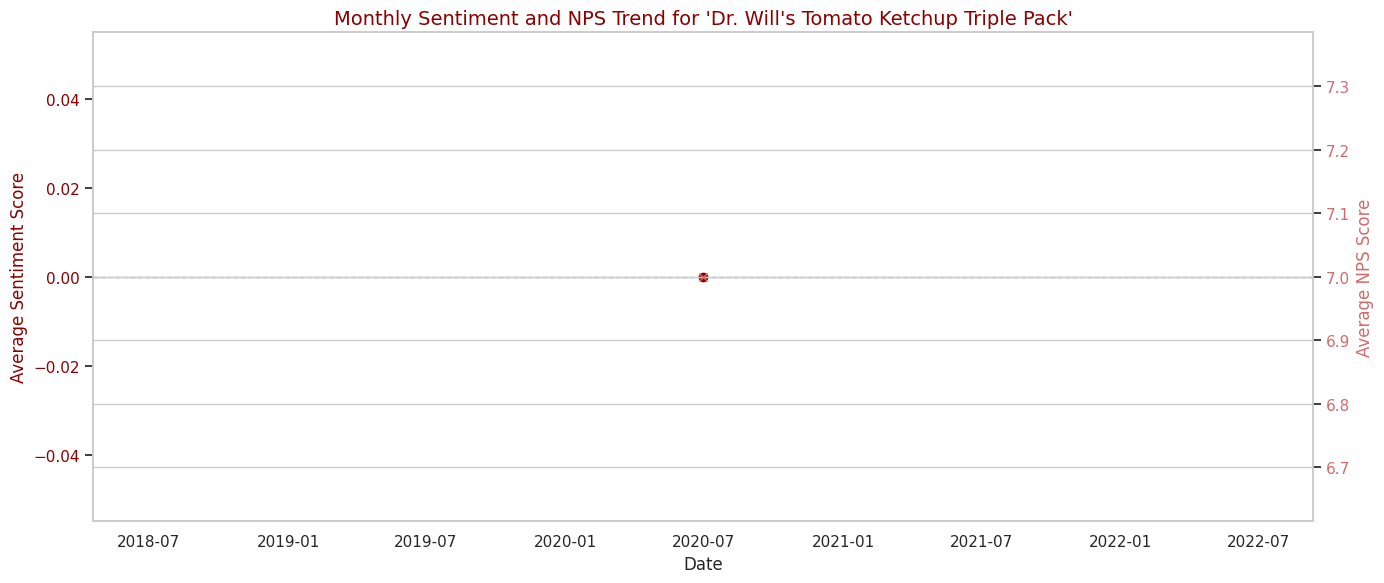

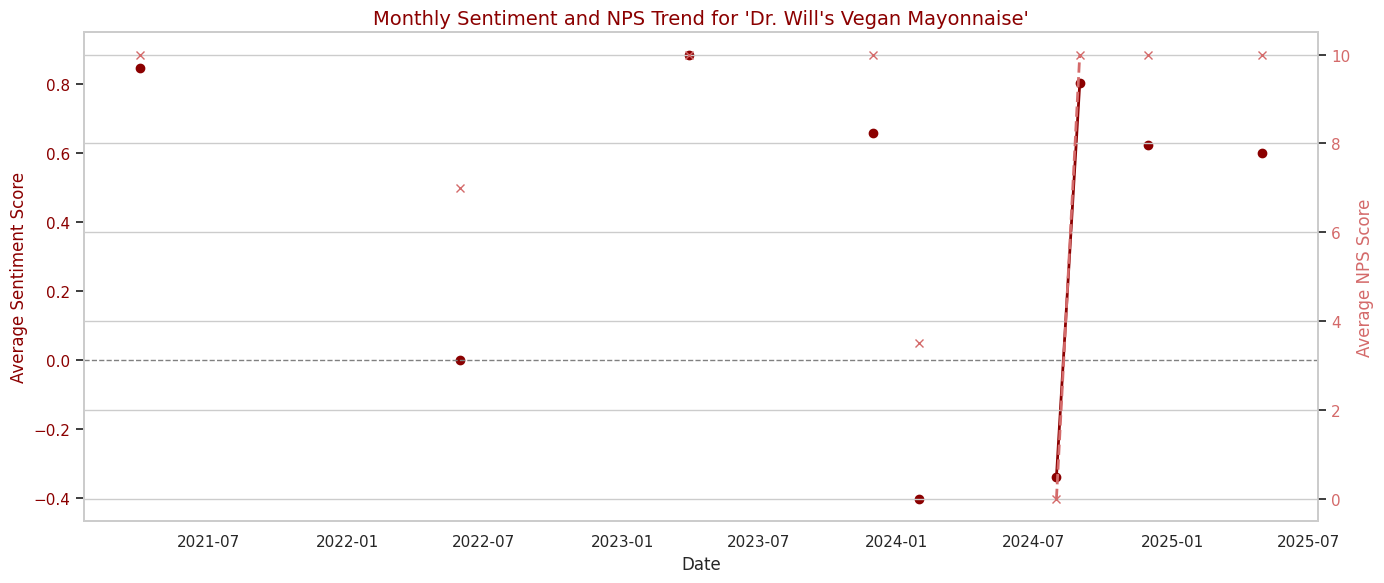

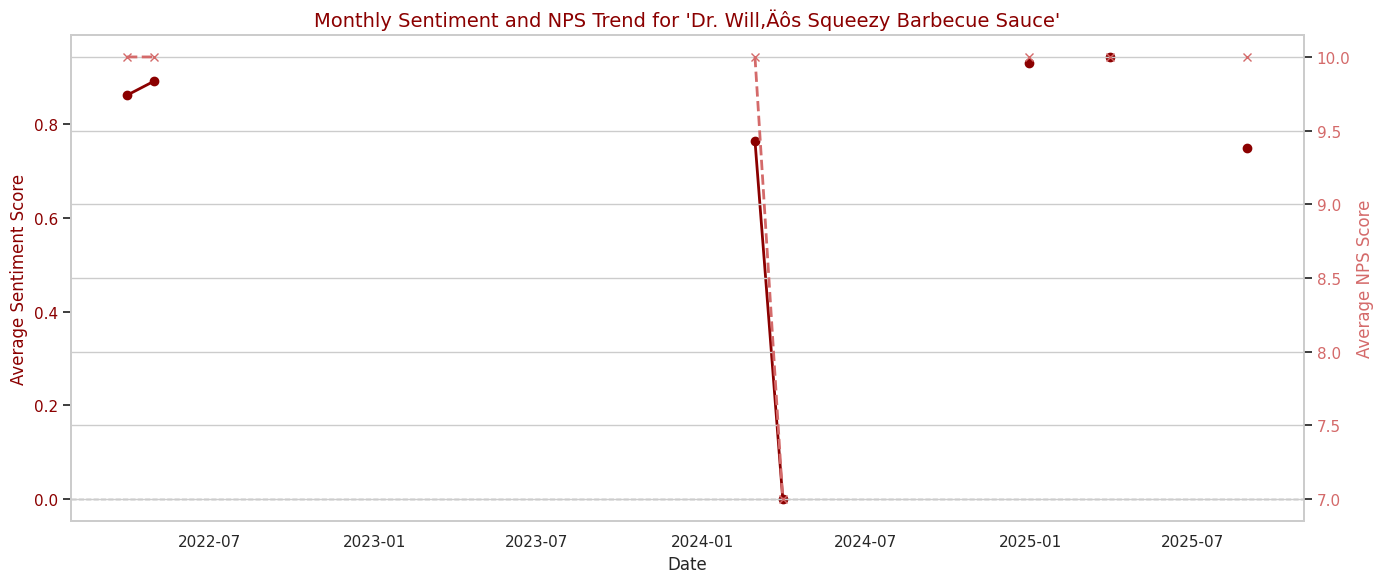

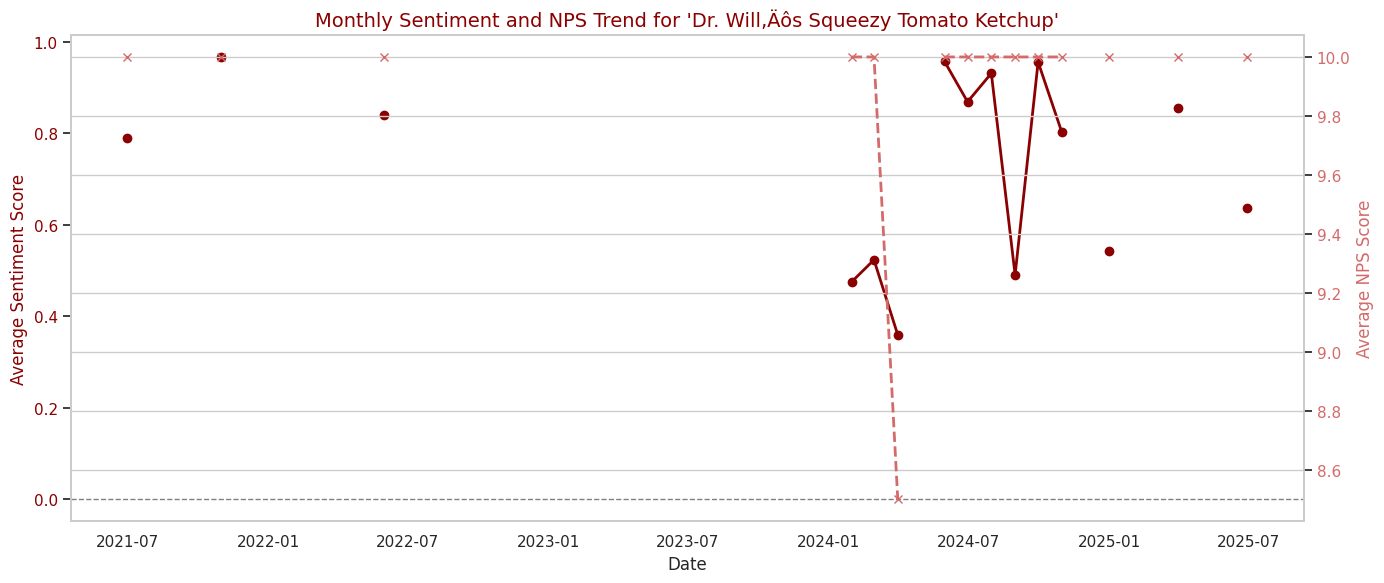

In [235]:
#  Data Cleaning
if 'date' not in df_reviews.columns:
    df_reviews = df_reviews.reset_index()

df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')
df_clean = df_reviews.dropna(subset=['vader_score', 'product', 'nps_category', 'date'])
df_clean = df_clean.set_index('date')

#  NPS Mapping
nps_mapping = {'Promoter': 10, 'Passive': 7, 'Detractor': 0}
df_clean['nps_score'] = df_clean['nps_category'].map(nps_mapping)

#  Monthly Aggregation
monthly_stats = (
    df_clean
    .groupby('product')
    .resample('ME')[['vader_score', 'nps_score']]
    .mean()
    .reset_index()
)

#  Unique Product List
product_options = sorted(monthly_stats['product'].dropna().unique())

#  Plot All Products One by One
for product in product_options:
    df_filtered = monthly_stats[monthly_stats['product'] == product]

    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Sentiment → Dark Red
    ax1.plot(df_filtered['date'], df_filtered['vader_score'],
             color='#8B0000', marker='o', linewidth=2, label='Sentiment')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Average Sentiment Score", color='#8B0000')
    ax1.tick_params(axis='y', labelcolor='#8B0000')
    ax1.axhline(0, linestyle='--', linewidth=1, color='gray')
    ax1.grid(False)

    # NPS → Muted Red
    ax2 = ax1.twinx()
    ax2.plot(df_filtered['date'], df_filtered['nps_score'],
             color='#D46A6A', marker='x', linestyle='--', linewidth=2, label='NPS')
    ax2.set_ylabel("Average NPS Score", color='#D46A6A')
    ax2.tick_params(axis='y', labelcolor='#D46A6A')

    # Title
    plt.title(f"Monthly Sentiment and NPS Trend for '{product}'", fontsize=14, color='#8B0000')
    fig.tight_layout()
    plt.show()


## Season Decomposition

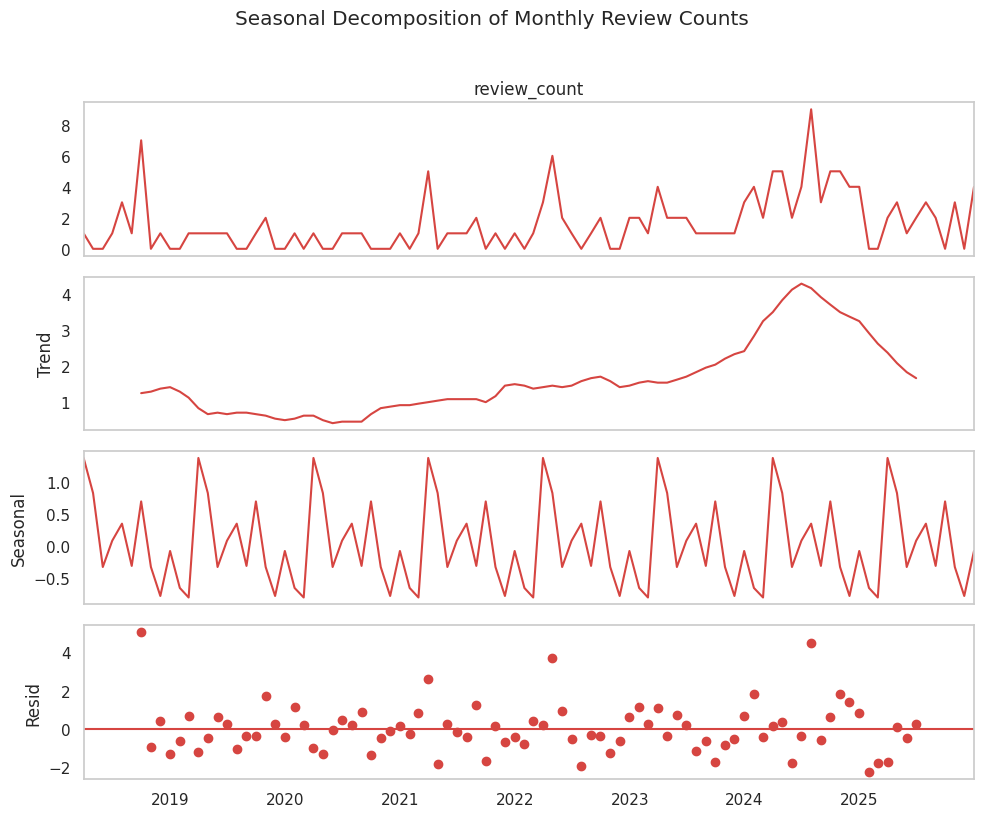

In [236]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Run decomposition
decomp = seasonal_decompose(monthly_counts, model='additive', period=12)

# Plot the components
fig = decomp.plot()
fig.set_size_inches(10, 8)
plt.suptitle("Seasonal Decomposition of Monthly Review Counts", y=1.02)

# Make all lines steelblue and remove grid
for ax in fig.axes:
    ax.grid(False)  # Remove grid
    for line in ax.get_lines():
        line.set_color('#D64541')

plt.tight_layout()
plt.show()


# In-Depth Theme Analysis


In [212]:
# Recreate the keyword themes
themes = {
    'positive_feedback': [...],  # as before
    'price_value': [...],
    'packaging_issue': [...],
    'taste_issue': [...],
    'product_mismatch': [...],
    'ingredient_concern': [...]
}

# Flatten problem-related keywords
problem_keywords = []
for theme, words in themes.items():
    if theme != 'positive_feedback':
        problem_keywords.extend(words)

# Flags
low_vader_flag = df_reviews['vader_score'] < 0.1
neg_label_flag = df_reviews['vader_sentiment_label'] == 'Negative'
detractor_flag = df_reviews['nps_category'] == 'Detractor'
explicit_flag = df_reviews.get('is_problem', False)

# Keyword match in clean_comment
keyword_flag = pd.Series(False, index=df_reviews.index)
for word in set(problem_keywords):
    keyword_flag |= df_reviews['clean_comment'].str.contains(rf'\b{word}\b', case=False, na=False)

# Final problem flag
df_reviews['is_problem_review'] = (
    low_vader_flag |
    neg_label_flag |
    detractor_flag |
    explicit_flag |
    keyword_flag
)

# Preview counts
print(df_reviews['is_problem_review'].value_counts())
df_reviews[['clean_comment', 'vader_score', 'nps_category', 'vader_sentiment_label', 'is_problem_review']].head(5)

is_problem_review
False    133
True      12
Name: count, dtype: int64


clean_comment  vader_score  \
3   major tangy ixve never fan mayo hand best woul...       0.7193   
7                               sadly impressed sweet       0.5106   
14                             best tomato sauce ever       0.6369   
23  delicious reasonably priced trace dreaded rape...       0.6369   
24  perfect trifecta taste healthy ingredient pric...       0.7506   

   nps_category vader_sentiment_label  is_problem_review  
3      Promoter              Positive              False  
7      Promoter              Positive              False  
14     Promoter              Positive              False  
23     Promoter              Positive              False  
24     Promoter              Positive              False

In [213]:
df_reviews.shape

(145, 13)

In [214]:
import pandas as pd
import re

# STEP 1: Define problem-related themes (excluding positive_feedback)
themes = {
    'price_value': ['price', 'expensive', 'ordered', 'box', 'value', 'waitrose', 'srp', 'cost', 'money', 'cheap', 'deal', '£'],
    'packaging_issue': ['squeeze', 'bottle', 'nozzle', 'kit', 'shrunk', 'jar', 'lid', 'top', 'packaging', 'cap', 'broken', 'seal', 'manufacture'],
    'taste_issue': ['taste', 'tastes', 'crap', 'bland', 'hot', 'sundried', 'pasta', 'chicken', 'bad', 'flavour', 'awful', 'aftertaste', 'sour', 'weird', 'disgusting'],
    'product_mismatch': ['sriracha', 'ketchup', 'wills', 'dr', 'heinz', 'mayo', 'sauce', 'different', 'wrong', 'fake', 'misleading', 'label'],
    'ingredient_concern': ['oil', 'tbsp', 'pan', 'add', 'new', 'vegan', 'tortilla', 'egg', 'sugar', 'preservative', 'salt', 'ingredient', 'stevia'],
    'positive_feedback': []  # Not used in theme detection
}

# STEP 2: Define theme-detection function
def detect_themes(comment):
    matched = []
    if pd.isna(comment):
        return matched
    for theme, words in themes.items():
        for word in words:
            if re.search(rf'\b{re.escape(word)}\b', str(comment), flags=re.IGNORECASE):
                matched.append(theme)
                break  # Stop at first match for a theme
    return matched

# STEP 3: Apply theme detection only to NEUTRAL or NEGATIVE sentiment rows
df_reviews['problem_themes'] = df_reviews.apply(
    lambda row: detect_themes(row['clean_comment'])
    if row['vader_sentiment_label'] in ['Neutral', 'Negative'] else [],
    axis=1
)

# STEP 4: Preview result
df_reviews[['clean_comment', 'vader_score', 'vader_sentiment_label', 'problem_themes','product_group']].head(5)

clean_comment  vader_score  \
3   major tangy ixve never fan mayo hand best woul...       0.7193   
7                               sadly impressed sweet       0.5106   
14                             best tomato sauce ever       0.6369   
23  delicious reasonably priced trace dreaded rape...       0.6369   
24  perfect trifecta taste healthy ingredient pric...       0.7506   

   vader_sentiment_label problem_themes       product_group  
3               Positive             []        Classic Mayo  
7               Positive             []  Jalapeño Hot Sauce  
14              Positive             []      Tomato Ketchup  
23              Positive             []        Avocado Mayo  
24              Positive             []           BBQ Sauce

In [215]:
df_reviews[df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])][['clean_comment', 'vader_sentiment_label','product_group','is_problem_review','problem_themes']].head(5)

clean_comment vader_sentiment_label  \
61                            thick tasty def buying x               Neutral   
63                order never arrived one answer email               Neutral   
64                order never arrived one answer email               Neutral   
77   really disappointing selling point used vegan ...              Negative   
134  jar arrived broke bubblewrap dr willxs ignores...              Negative   

      product_group  is_problem_review                          problem_themes  
61     Classic Mayo               True                                      []  
63   Tomato Ketchup               True                                      []  
64        BBQ Sauce               True                                      []  
77       Vegan Mayo               True  [product_mismatch, ingredient_concern]  
134      Vegan Mayo               True     [packaging_issue, product_mismatch]

In [216]:
df_reviews.head()

date  rating                              product  \
3  2025-07-05 11:37:00       5              Dr. Will's Classic Mayo   
7  2025-05-04 13:24:00       2       Dr. Will's Jalape√±o Hot Sauce   
14 2025-06-03 09:53:00       5  Dr. Will‚Äôs Squeezy Tomato Ketchup   
23 2025-08-02 04:35:00       5    Dr. Will's Avocado Oil Mayonnaise   
24 2025-08-02 04:17:00       5  Dr. Will‚Äôs Squeezy Barbecue Sauce   

                                        clean_comment  yotpo_sentiment source  \
3   major tangy ixve never fan mayo hand best woul...         0.428422  Yotpo   
7                               sadly impressed sweet         0.007312  Yotpo   
14                             best tomato sauce ever         0.986636  Yotpo   
23  delicious reasonably priced trace dreaded rape...         0.982266  Yotpo   
24  perfect trifecta taste healthy ingredient pric...         0.969252  Yotpo   

         product_group  vader_score vader_sentiment_label sentiment_flag  \
3         Classic Mayo       0.7193              Positive           None   
7   Jalapeño Hot Sauce       0.5106              Positive           None   
14      Tomato Ketchup       0.6369              Positive           None   
23        Avocado Mayo       0.6369              Positive           None   
24           BBQ Sauce       0.7506              Positive           None   

      year nps_category  is_problem_review problem_themes  
3   2025.0     Promoter              False             []  
7   2025.0     Promoter              False             []  
14  2025.0     Promoter              False             []  
23  2025.0     Promoter              False             []  
24  2025.0     Promoter              False             []

## Time Trend of Problem Reviews

Visualize whether the number of problem reviews has increased or decreased over time.
This plot shows how the volume of flagged reviews (those with low VADER score, negative sentiment, detractor NPS, explicit flag, or keyword issues) has changed month by month

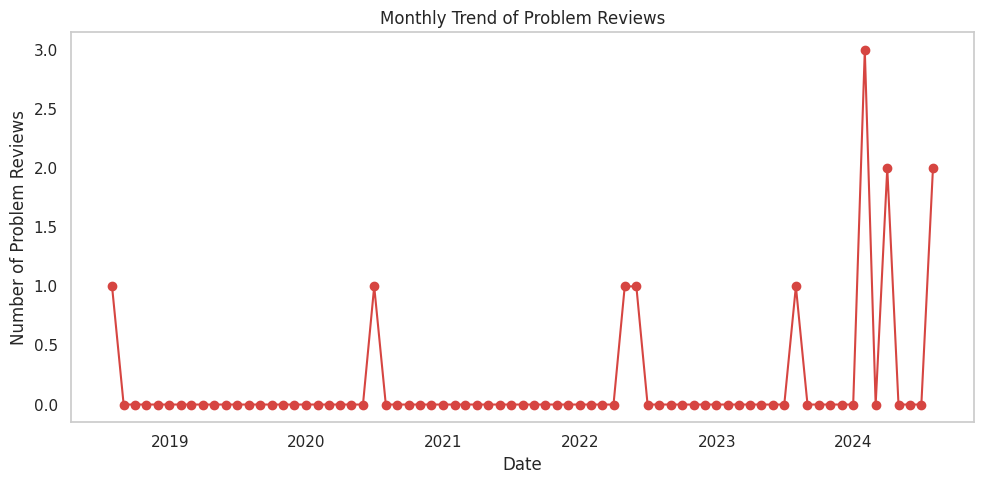

In [237]:


# Create a copy so the original df_reviews is untouched
df_time = df_reviews.copy()

# Parse 'date' into datetime format safely
df_time['date'] = pd.to_datetime(df_time['date'], errors='coerce')

#  Drop rows where date couldn't be parsed (only for plotting)
df_time = df_time[df_time['date'].notna()]

# Set date as index
df_time.set_index('date', inplace=True)

# Filter for problem reviews
df_problems = df_time[df_time['is_problem_review'] == True]

# Resample by month and count
monthly_problem_counts = df_problems.resample('ME').size()

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_problem_counts.index, monthly_problem_counts.values,
         marker='o', linestyle='-', color='#D64541')

plt.title('Monthly Trend of Problem Reviews')
plt.xlabel('Date')
plt.ylabel('Number of Problem Reviews')
plt.grid(False)
plt.tight_layout()
plt.show()



### Trend of Problem Reviews by Theme

In [238]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Ensure 'date' is a column in df_reviews (not an index)
if 'date' not in df_reviews.columns:
    df_reviews = df_reviews.reset_index()

# Explode problem themes so each theme is a separate row
exploded = df_reviews[df_reviews['is_problem_review'] == True].explode('problem_themes')

# Prepare dropdown list of unique themes
theme_options = sorted(exploded['problem_themes'].dropna().unique())
theme_dropdown = widgets.Dropdown(
    options=theme_options,
    description='Theme:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Define plotting function
def plot_theme_trend(selected_theme):
    # Filter for selected theme
    theme_df = exploded[exploded['problem_themes'] == selected_theme].copy()

    # Ensure 'date' column is in datetime format
    theme_df['date'] = pd.to_datetime(theme_df['date'], errors='coerce')
    theme_df = theme_df[theme_df['date'].notna()]  # Drop rows with invalid dates
    theme_df = theme_df.set_index('date')          # Set date as index

    # Resample by month
    monthly_counts = theme_df.resample('M').size()

    # Plot the trend
    plt.figure(figsize=(12, 5))
    plt.plot(monthly_counts.index, monthly_counts.values,
             marker='o', linestyle='-', color='#D64541')

    plt.title(f"Monthly Problem Reviews for Theme: '{selected_theme}'", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Count of Problem Reviews")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Display the interactive plot
widgets.interact(plot_theme_trend, selected_theme=theme_dropdown)


interactive(children=(Dropdown(description='Theme:', layout=Layout(width='50%'), options=('ingredient_concern'…

<function __main__.plot_theme_trend(selected_theme)>

### Top Product Groups with Most Problem Reviews


In [220]:
# Total review count per product group
total_reviews = df_reviews.groupby('product_group').size()

# Problem review count per group
problem_reviews = df_reviews[df_reviews['is_problem_review'] == True] \
                    .groupby('product_group').size()

# Combine into one DataFrame
summary = pd.DataFrame({
    'Total Reviews': total_reviews,
    'Problem Reviews': problem_reviews
})

#  Fill NaN (if any group had 0 problem reviews)
summary['Problem Reviews'] = summary['Problem Reviews'].fillna(0).astype(int)

#  Add non-problem and percentage
summary['Non-Problem Reviews'] = summary['Total Reviews'] - summary['Problem Reviews']
summary['% Problem'] = (summary['Problem Reviews'] / summary['Total Reviews'] * 100).round(1)

# Sort by problem review count
summary = summary.sort_values(by='Problem Reviews', ascending=False)

# Show
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
summary


Total Reviews  Problem Reviews  Non-Problem Reviews  \
product_group                                                             
Vegan Mayo                     11                4                    7   
Tomato Ketchup                 36                4                   32   
BBQ Sauce                      26                2                   24   
Avocado Mayo                   15                1                   14   
Classic Mayo                   24                1                   23   
Buffalo Hot Sauce               2                0                    2   
Jalapeño Hot Sauce              4                0                    4   
Caesar Dressing                 4                0                    4   
Sriracha Mayo                   6                0                    6   
Sriracha Hot Sauce             17                0                   17   

                    % Problem  
product_group                  
Vegan Mayo               36.4  
Tomato Ketchup           11.1  
BBQ Sauce                 7.7  
Avocado Mayo              6.7  
Classic Mayo              4.2  
Buffalo Hot Sauce         0.0  
Jalapeño Hot Sauce        0.0  
Caesar Dressing           0.0  
Sriracha Mayo             0.0  
Sriracha Hot Sauce        0.0

/tmp/ipython-input-4208242856.py:14: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.



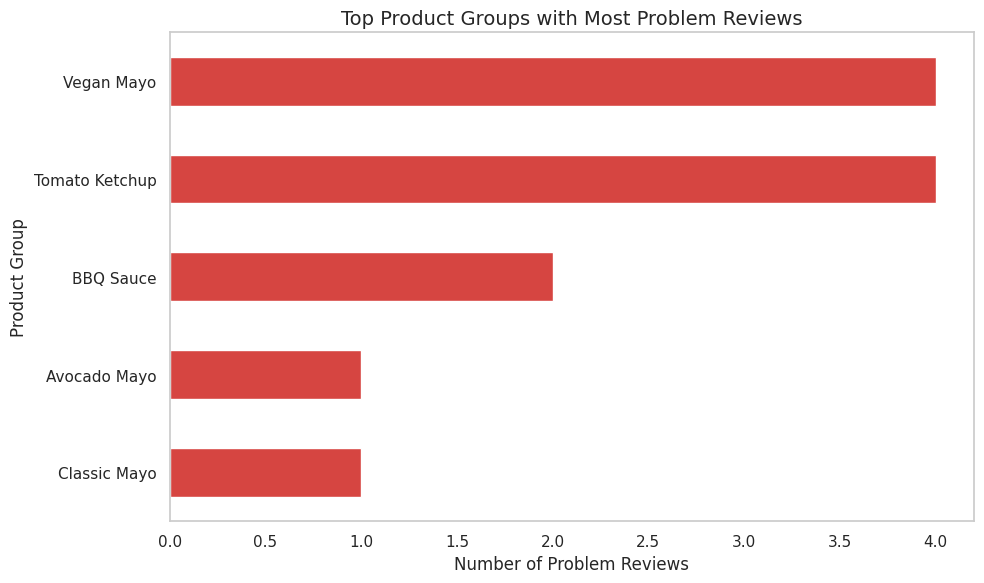

In [221]:
import matplotlib.pyplot as plt

# Group by product_group and count problem reviews
top_problem_groups = df_reviews[df_reviews['is_problem_review'] == True] \
    .groupby('product_group').size().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
top_problem_groups.plot(kind='barh', color='#D64541')
plt.title('Top Product Groups with Most Problem Reviews', fontsize=14)
plt.xlabel('Number of Problem Reviews', fontsize=12)
plt.ylabel('Product Group', fontsize=12)
plt.gca().invert_yaxis()  # highest bar at the top
plt.grid(False, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.grid(False)
plt.show()


### Problem Theme Distribution as Pie Chart


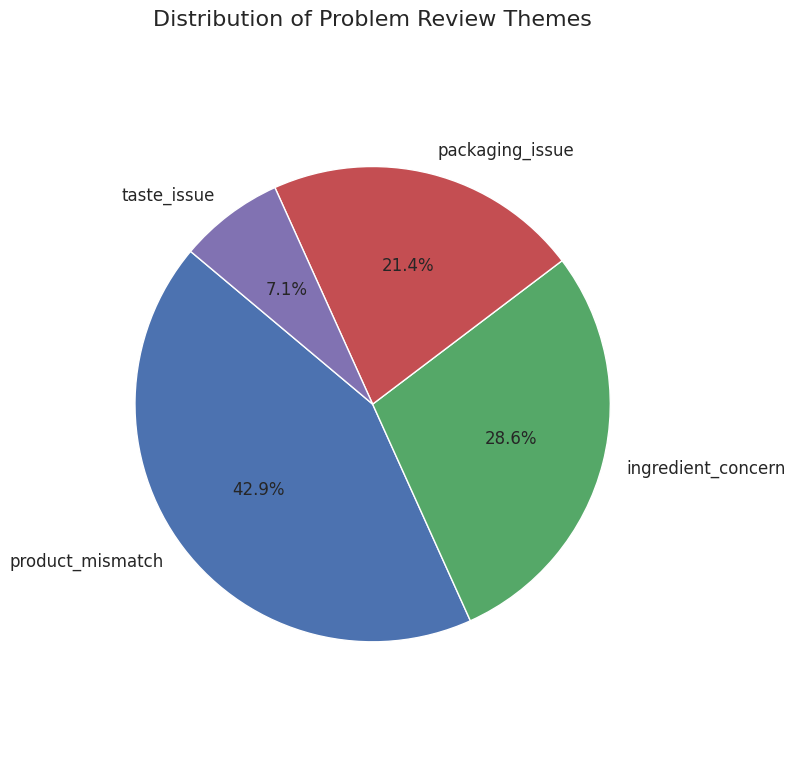

In [243]:
# Prepare data
all_themes = df_reviews[df_reviews['is_problem_review']]['problem_themes'].explode().dropna()
theme_counts = all_themes.value_counts()

# Define a custom color palette (you can adjust to match brand palette if needed)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(theme_counts,
        labels=theme_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 12})

plt.title("Distribution of Problem Review Themes", fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [244]:
df_reviews.head()

date  rating                              product  \
3  2025-07-05 11:37:00       5              Dr. Will's Classic Mayo   
7  2025-05-04 13:24:00       2       Dr. Will's Jalape√±o Hot Sauce   
14 2025-06-03 09:53:00       5  Dr. Will‚Äôs Squeezy Tomato Ketchup   
23 2025-08-02 04:35:00       5    Dr. Will's Avocado Oil Mayonnaise   
24 2025-08-02 04:17:00       5  Dr. Will‚Äôs Squeezy Barbecue Sauce   

                                        clean_comment  yotpo_sentiment source  \
3   major tangy ixve never fan mayo hand best woul...         0.428422  Yotpo   
7                               sadly impressed sweet         0.007312  Yotpo   
14                             best tomato sauce ever         0.986636  Yotpo   
23  delicious reasonably priced trace dreaded rape...         0.982266  Yotpo   
24  perfect trifecta taste healthy ingredient pric...         0.969252  Yotpo   

         product_group  vader_score vader_sentiment_label sentiment_flag  \
3         Classic Mayo       0.7193              Positive           None   
7   Jalapeño Hot Sauce       0.5106              Positive           None   
14      Tomato Ketchup       0.6369              Positive           None   
23        Avocado Mayo       0.6369              Positive           None   
24           BBQ Sauce       0.7506              Positive           None   

    year nps_category  is_problem_review problem_themes  
3   2025     Promoter              False             []  
7   2025     Promoter              False             []  
14  2025     Promoter              False             []  
23  2025     Promoter              False             []  
24  2025     Promoter              False             []

# Google Trends

To identify what sauces and health-related food terms consumers in the UK have been actively searching for (Jan 2021 – July 2025) to guide Dr. Will’s product development, brand direction, and marketing strategy.



In [253]:
!pip install pytrends

In [254]:
from pytrends.request import TrendReq
import pandas as pd

# Set up pytrends
pytrends = TrendReq(hl='en-UK', tz=360)

# Define all keywords
all_keywords = [
    "vegan mayo", "ketchup", "BBQ sauce", "healthy sauce",
    "natural condiments", "sugar free ketchup", "low calorie sauce", "healthy ketchup",
    "vegan sauce", "organic condiments", "sriracha", "hot sauce",
    "mayo alternatives", "plant based sauce", "no added sugar sauces"
]

# Function to split list into chunks of 4 (max allowed = 5 incl. date)
def chunk_keywords(lst, chunk_size=4):
    for i in range(0, len(lst), chunk_size):
        yield lst[i:i + chunk_size]

# Create a combined dataframe to store all results
combined_df = pd.DataFrame()

# Loop through chunks
for chunk in chunk_keywords(all_keywords):
    pytrends.build_payload(chunk, cat=0, timeframe='2021-01-01 2025-07-01', geo='GB')
    df_chunk = pytrends.interest_over_time()
    if 'isPartial' in df_chunk.columns:
        df_chunk = df_chunk.drop(columns=['isPartial'])

    # Merge with combined_df
    if combined_df.empty:
        combined_df = df_chunk
    else:
        combined_df = combined_df.merge(df_chunk, left_index=True, right_index=True, how='outer')

# Reset index
combined_df.reset_index(inplace=True)
combined_df.head()


date  vegan mayo  ketchup  BBQ sauce  healthy sauce  \
0 2020-12-27           6       22         17              6   
1 2021-01-03           9       25         19             11   
2 2021-01-10          10       26         21              9   
3 2021-01-17           4       25         21              9   
4 2021-01-24           3       25         21              8   

   natural condiments  sugar free ketchup  low calorie sauce  healthy ketchup  \
0                   0                   0                 47                0   
1                   0                   0                 95                0   
2                   0                   0                 92                0   
3                   0                   0                 81                0   
4                   0                   0                 94                0   

   vegan sauce  organic condiments  sriracha  hot sauce  mayo alternatives  \
0           29                   0        29         45                  0   
1           36                   0        34         45                  0   
2           33                   0        41         49                  0   
3           34                   0        39         57                  0   
4           33                   0        37         58                  0   

   plant based sauce  no added sugar sauces  
0                  0                      0  
1                  0                      0  
2                  0                      0  
3                  0                      0  
4                  0                      0

In [255]:
print("Start date:", combined_df['date'].min())
print("End date:", combined_df['date'].max())

Start date: 2020-12-27 00:00:00
End date: 2025-06-29 00:00:00


## What are people searching in health condiments?

In [256]:
combined_df['interest_HealthCondiments'] = combined_df[[
    'healthy sauce',
    'low calorie sauce',
    'plant based sauce',
    'vegan sauce',
    'sugar free ketchup',
    'vegan mayo'
]].mean(axis=1)

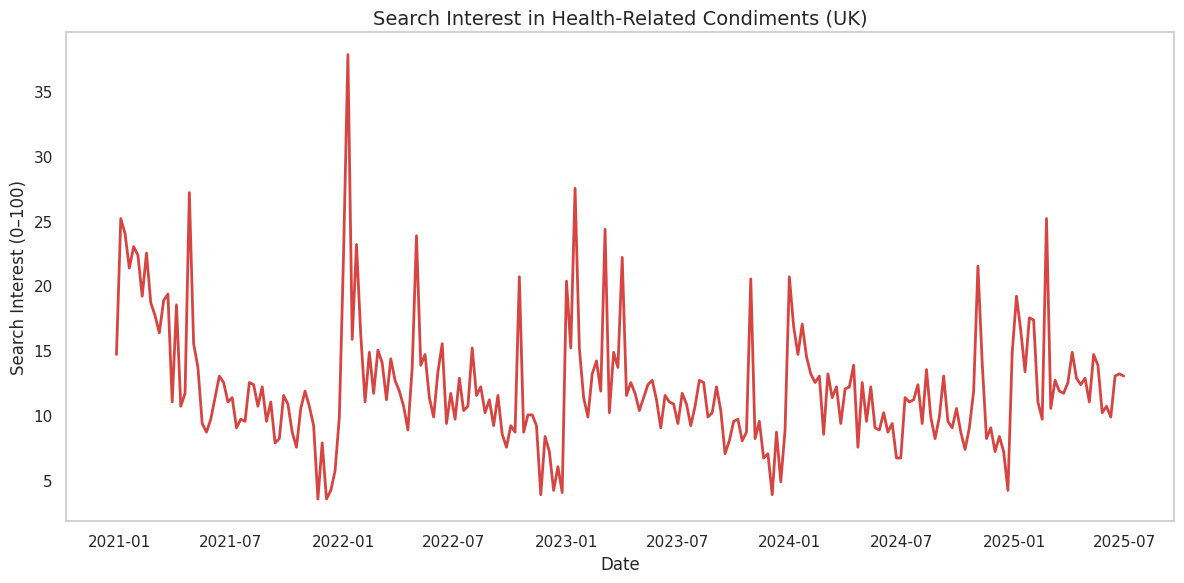

In [259]:
import matplotlib.pyplot as plt

# Plot the health-related condiment search interest over time
plt.figure(figsize=(12,6))
plt.plot(combined_df['date'], combined_df['interest_HealthCondiments'], color='#D64541', linewidth=2)

# Labels and title
plt.title('Search Interest in Health-Related Condiments (UK)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Search Interest (0–100)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


| Area           | Actionable Recommendation                                                                    |
| -------------- | -------------------------------------------------------------------------------------------- |
| **Product**    | Launch limited editions during peaks (e.g., early-year or summer BBQ season).                |
| **Marketing**  | Push SEO/blogs/social content around "healthy sauces" during rising trend periods.           |
| **Brand**      | Position as a **functional health-forward condiment brand**, not just “flavour-first.”       |
| **Innovation** | Explore unmet needs in “plant-based” or “organic condiments” — rising but not oversaturated. |


In [260]:
health_terms = [
    'healthy sauce', 'low calorie sauce','plant based sauce',
    'vegan sauce', 'sugar free ketchup', 'vegan mayo'
]

combined_df[health_terms].mean().sort_values(ascending=False)


low calorie sauce     44.427966
vegan sauce           18.283898
healthy sauce          4.707627
plant based sauce      3.080508
vegan mayo             2.250000
sugar free ketchup     0.177966
dtype: float64

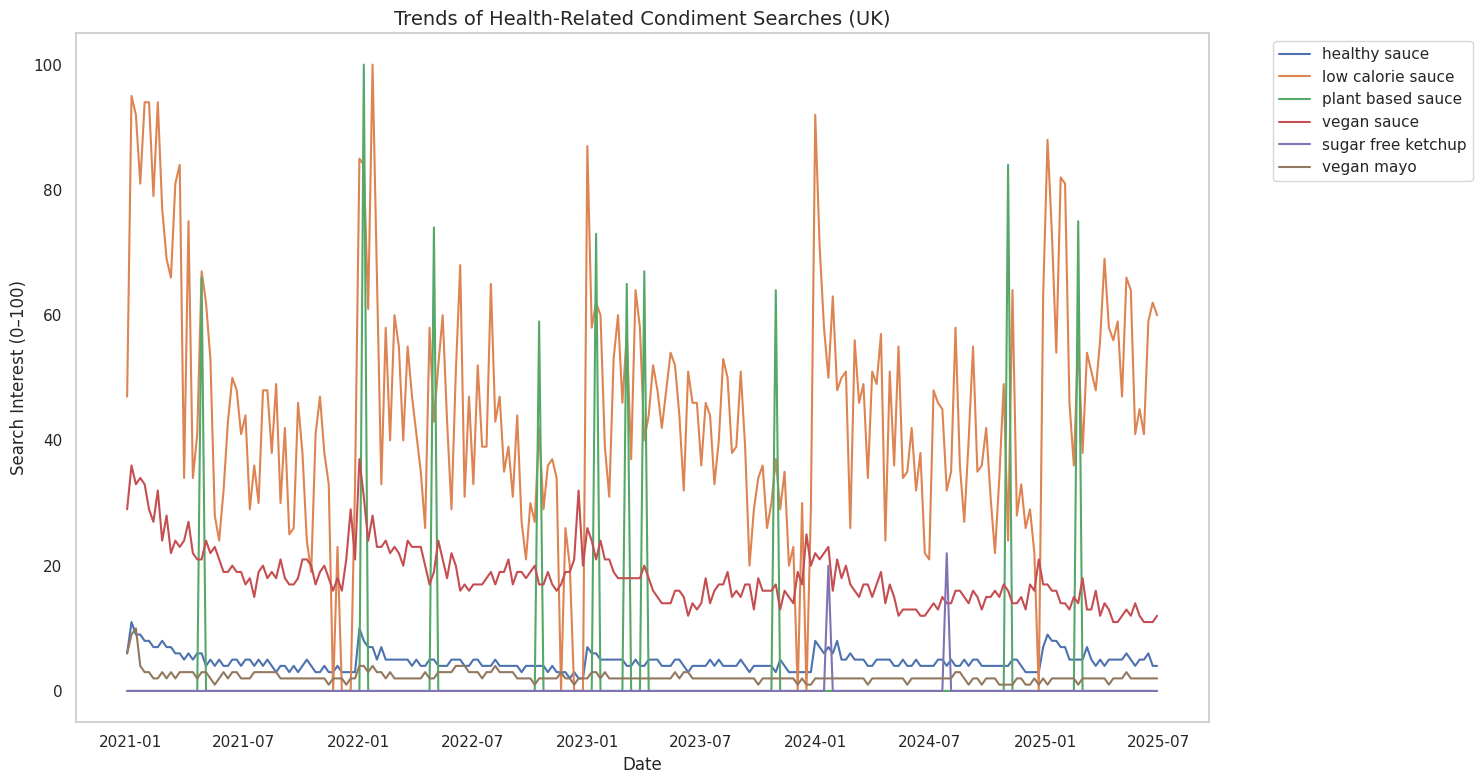

In [261]:
plt.figure(figsize=(15,8))

for term in health_terms:
    plt.plot(combined_df['date'], combined_df[term], label=term)

plt.title('Trends of Health-Related Condiment Searches (UK)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Search Interest (0–100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.grid(False)
plt.show()


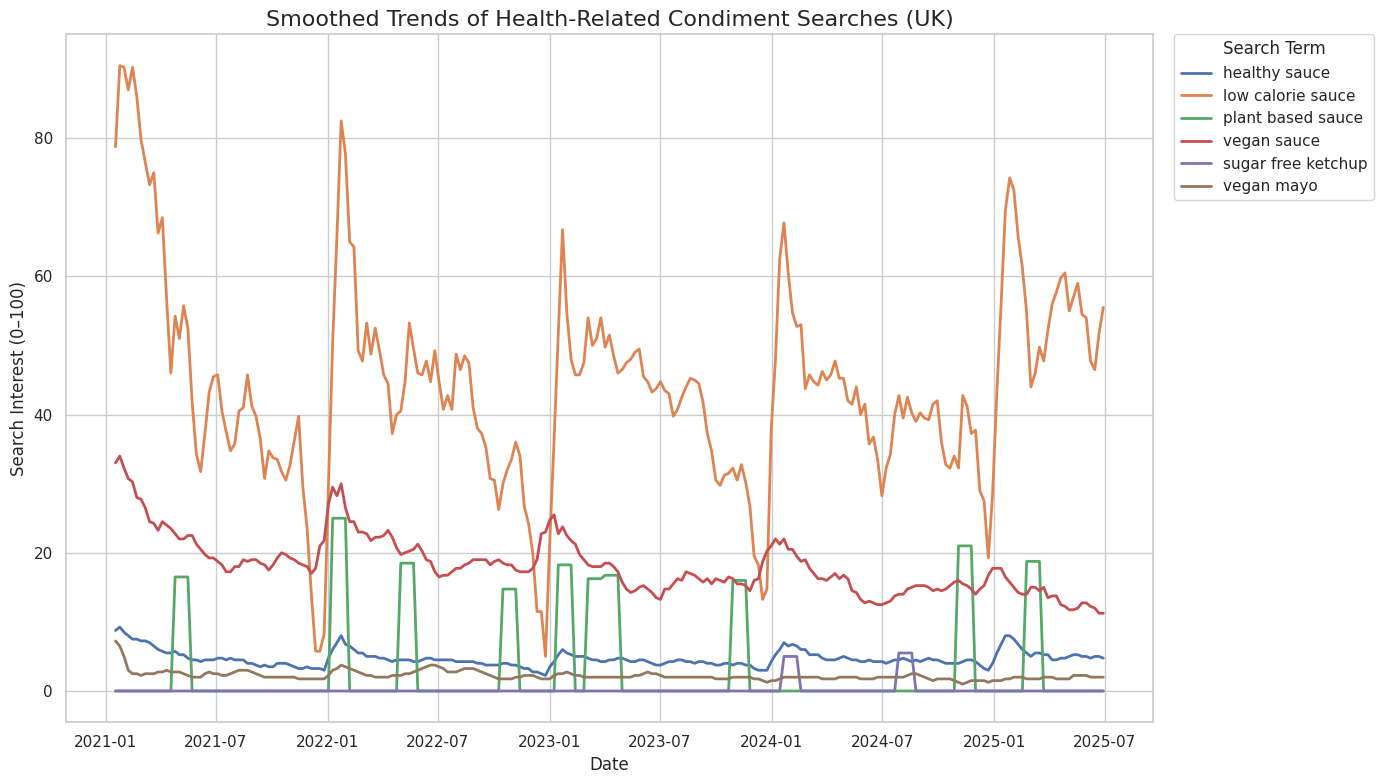

In [262]:
# Optional: smooth data with 4-week rolling average
df_smooth = combined_df.copy()
df_smooth[health_terms] = df_smooth[health_terms].rolling(4).mean()

# Set style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(14,8))
for term in health_terms:
    plt.plot(df_smooth['date'], df_smooth[term], label=term, linewidth=2)

plt.title('Smoothed Trends of Health-Related Condiment Searches (UK)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Search Interest (0–100)', fontsize=12)
plt.legend(title='Search Term', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


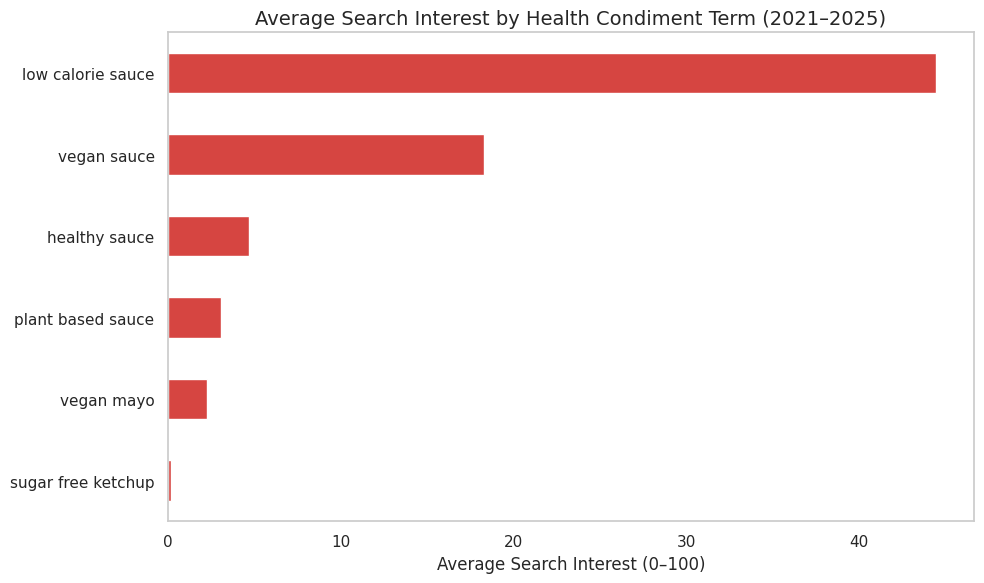

In [265]:
health_terms_avg = combined_df[health_terms].mean().sort_values(ascending=True)
health_terms_avg.plot(kind='barh', figsize=(10,6), color='#D64541')
plt.title("Average Search Interest by Health Condiment Term (2021–2025)", fontsize=14)
plt.xlabel("Average Search Interest (0–100)")
plt.grid(False, axis='x')
plt.tight_layout()
plt.grid(False)
plt.show()


## How does Dr. Will’s range compare to search interest?

In [266]:
# Dr. Will's Tomato Ketchup products
combined_df['interest_TomatoKetchup'] = combined_df[[
    'ketchup', 'sugar free ketchup', 'healthy ketchup'
]].mean(axis=1)

# Dr. Will's BBQ Sauce
combined_df['interest_BBQ'] = combined_df[[
    'BBQ sauce'
]].mean(axis=1)

# Dr. Will's Mayo range (Classic, Vegan, Avocado)
combined_df['interest_Mayo'] = combined_df[[
    'vegan mayo', 'mayo alternatives', 'healthy sauce'
]].mean(axis=1)

# Dr. Will's Avocado Mayo specific (optional – or combine under Mayo)
combined_df['interest_AvocadoMayo'] = combined_df[[
    'healthy sauce', 'vegan sauce'
]].mean(axis=1)

# Dr. Will's Spicy sauces
combined_df['interest_Sriracha'] = combined_df[[
    'sriracha', 'hot sauce'
]].mean(axis=1)

# Dr. Will's Jalapeño Hot Sauce (if data exists separately, else include in spicy)
combined_df['interest_Jalapeno'] = combined_df[[
    'hot sauce'
]].mean(axis=1)


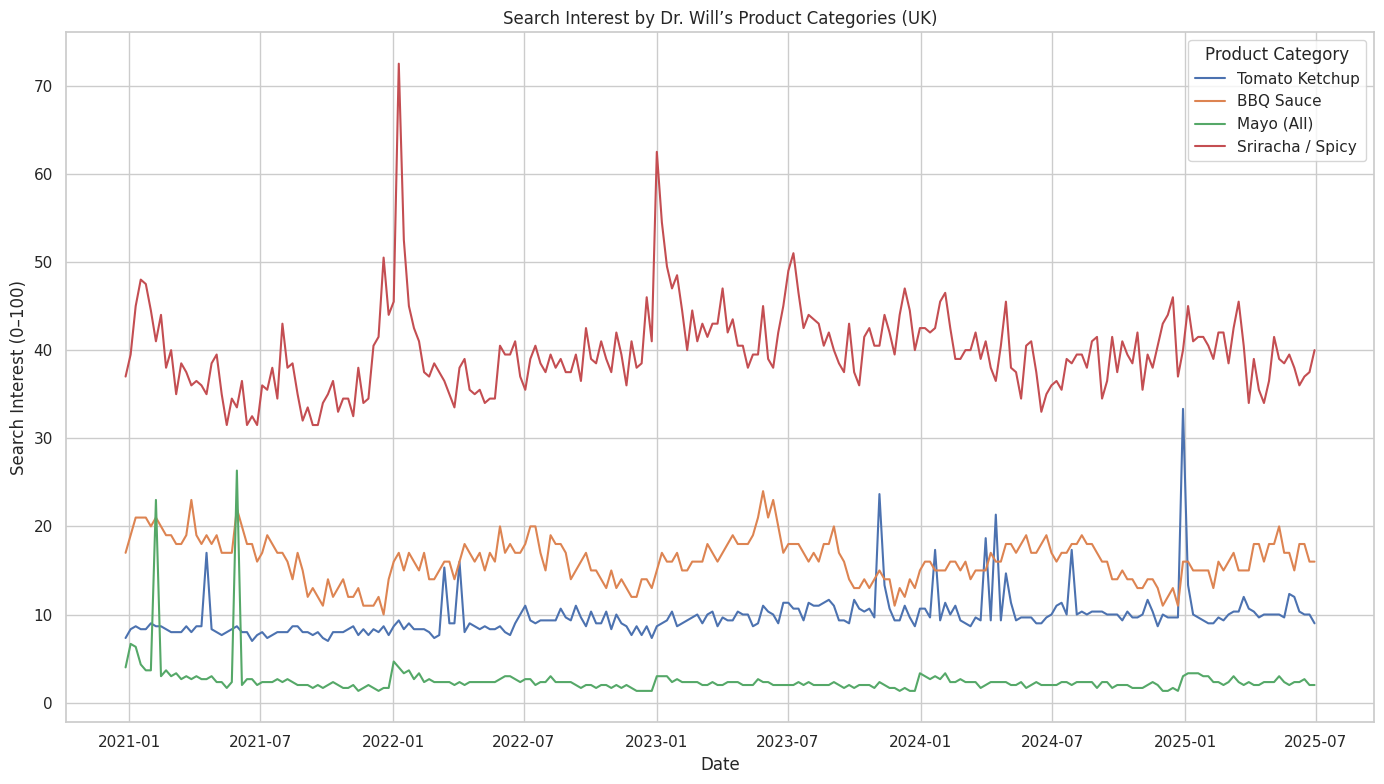

In [267]:
plt.figure(figsize=(14,8))
plt.plot(combined_df['date'], combined_df['interest_TomatoKetchup'], label='Tomato Ketchup')
plt.plot(combined_df['date'], combined_df['interest_BBQ'], label='BBQ Sauce')
plt.plot(combined_df['date'], combined_df['interest_Mayo'], label='Mayo (All)')
plt.plot(combined_df['date'], combined_df['interest_Sriracha'], label='Sriracha / Spicy')

plt.title('Search Interest by Dr. Will’s Product Categories (UK)')
plt.xlabel('Date')
plt.ylabel('Search Interest (0–100)')
plt.legend(title='Product Category')
plt.grid(True)
plt.tight_layout()
plt.show()


In [268]:
# Group by product and calculate the mean of numeric vader_score
sentiment_summary = df_reviews.groupby('product_group')['vader_score'].mean().reset_index()
sentiment_summary.columns = ['Product', 'Avg_Sentiment']


In [269]:
search_interest_df = pd.DataFrame({
    'Product': ['Tomato Ketchup', 'BBQ Sauce', 'Mayo (All)', 'Sriracha / Spicy'],
    'Avg_Search_Interest': [
        combined_df['interest_TomatoKetchup'].mean(),
        combined_df['interest_BBQ'].mean(),
        combined_df['interest_Mayo'].mean(),
        combined_df['interest_Sriracha'].mean()
    ]
})


In [270]:
comparison_df = pd.merge(search_interest_df, sentiment_summary, on='Product')

In [272]:
# Step 1: Create the comparison DataFrame
comparison_df = pd.DataFrame({
    'Product': [
        'Tomato Ketchup', 'BBQ Sauce', 'Mayo (All)', 'Sriracha / Spicy',
        'Avocado Mayo', 'Jalapeno Sauce'
    ],
    'Avg_Search_Interest': [
        combined_df['interest_TomatoKetchup'].mean(),
        combined_df['interest_BBQ'].mean(),
        combined_df['interest_Mayo'].mean(),
        combined_df['interest_Sriracha'].mean(),
        combined_df['interest_AvocadoMayo'].mean(),
        combined_df['interest_Jalapeno'].mean()
    ],
    'Avg_Sentiment': [
        df_reviews[df_reviews['product_group'] == 'Tomato Ketchup']['vader_score'].mean(),
        df_reviews[df_reviews['product_group'] == 'BBQ Sauce']['vader_score'].mean(),
        df_reviews[df_reviews['product_group'] == 'Mayo (All)']['vader_score'].mean(),
        df_reviews[df_reviews['product_group'] == 'Sriracha / Spicy']['vader_score'].mean(),
        df_reviews[df_reviews['product_group'] == 'Avocado Mayo']['vader_score'].mean(),
        df_reviews[df_reviews['product_group'] == 'Jalapeno Sauce']['vader_score'].mean()
    ]
})


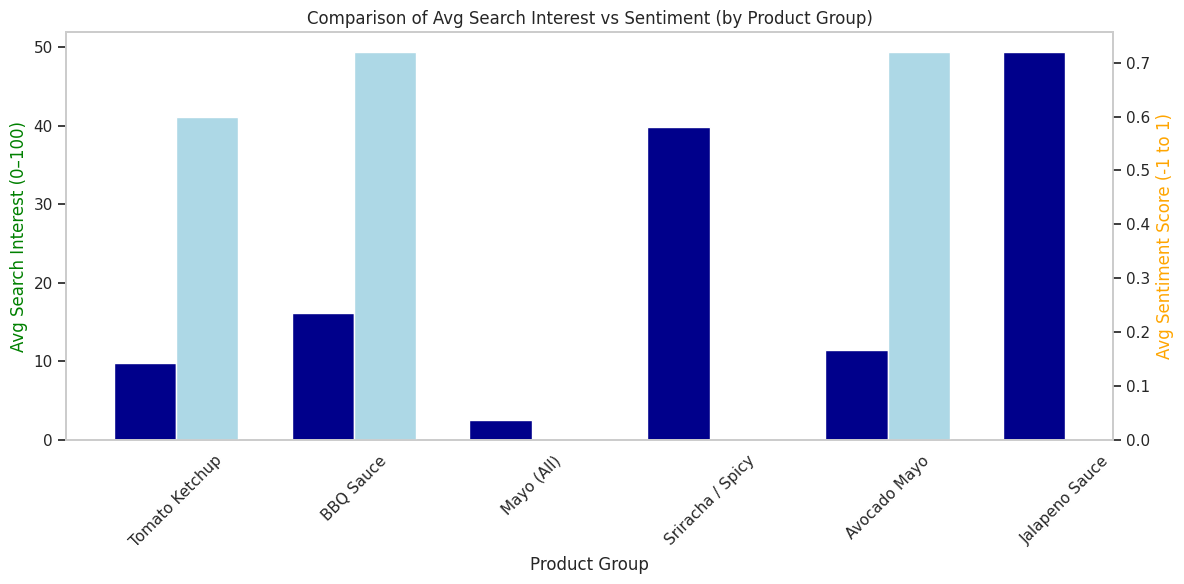

In [273]:
import matplotlib.pyplot as plt
import numpy as np

# Create positions
x = np.arange(len(comparison_df['Product']))
width = 0.35

# Set up figure and axes
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()

# Plot bars
bars1 = ax1.bar(x - width/2, comparison_df['Avg_Search_Interest'], width, label='Avg Search Interest', color='darkblue')
bars2 = ax2.bar(x + width/2, comparison_df['Avg_Sentiment'], width, label='Avg Sentiment Score', color='lightblue')

# Labels and titles
ax1.set_ylabel('Avg Search Interest (0–100)', color='green')
ax2.set_ylabel('Avg Sentiment Score (-1 to 1)', color='orange')
ax1.set_xlabel('Product Group')
plt.title('Comparison of Avg Search Interest vs Sentiment (by Product Group)')
ax1.set_xticks(x)
ax1.set_xticklabels(comparison_df['Product'], rotation=45)

# Grid and layout
ax1.grid(False)
ax2.grid(False)
fig.tight_layout()
plt.show()


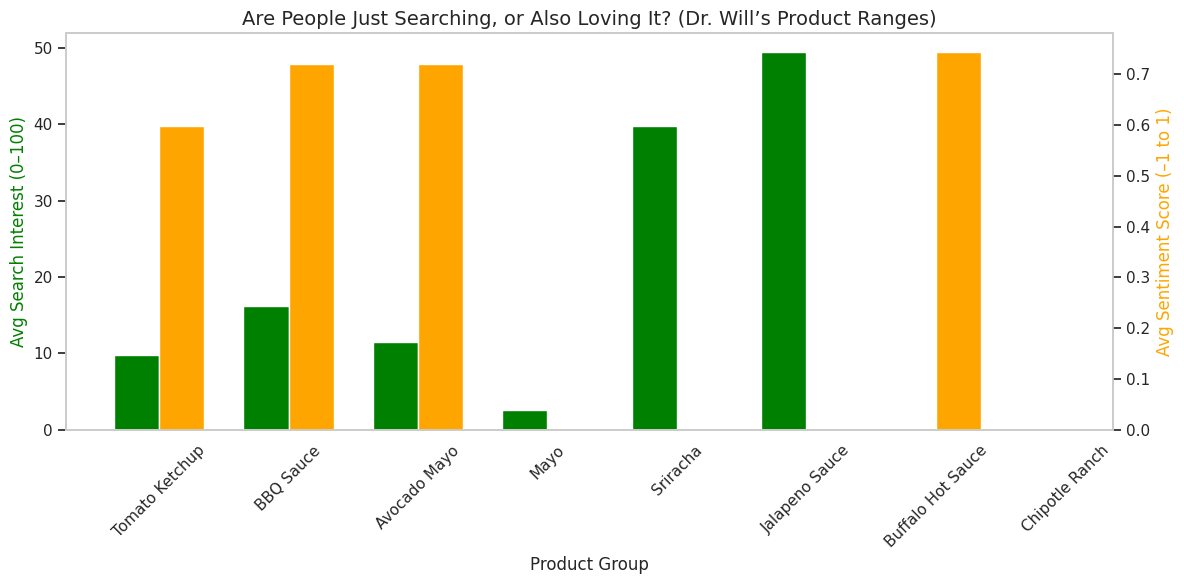

In [274]:
# Define product list
product_list = [
    'Tomato Ketchup', 'BBQ Sauce', 'Avocado Mayo', 'Mayo',
    'Sriracha', 'Jalapeno Sauce', 'Buffalo Hot Sauce', 'Chipotle Ranch'
]

# Average search interest from combined_df
search_interest_df = pd.DataFrame({
    'Product': product_list,
    'Avg_Search_Interest': [
        combined_df['interest_TomatoKetchup'].mean(),
        combined_df['interest_BBQ'].mean(),
        combined_df['interest_AvocadoMayo'].mean(),
        combined_df['interest_Mayo'].mean(),
        combined_df['interest_Sriracha'].mean(),
        combined_df['interest_Jalapeno'].mean(),
        combined_df['interest_Buffalo'].mean() if 'interest_Buffalo' in combined_df.columns else 0,
        combined_df['interest_Chipotle'].mean() if 'interest_Chipotle' in combined_df.columns else 0
    ]
})

# Average sentiment from review data
sentiment_summary = df_reviews.groupby('product_group')['vader_score'].mean().reset_index()
sentiment_summary.columns = ['Product', 'Avg_Sentiment']

# Merge both into comparison_df
comparison_df = pd.merge(search_interest_df, sentiment_summary, on='Product', how='left')

# Visualise
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(comparison_df['Product']))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Bars
ax1.bar(x - width/2, comparison_df['Avg_Search_Interest'], width, label='Avg Search Interest', color='green')
ax2.bar(x + width/2, comparison_df['Avg_Sentiment'], width, label='Avg Sentiment Score', color='orange')

# Labels
ax1.set_xlabel('Product Group', fontsize=12)
ax1.set_ylabel('Avg Search Interest (0–100)', color='green', fontsize=12)
ax2.set_ylabel('Avg Sentiment Score (–1 to 1)', color='orange', fontsize=12)

ax1.set_title('Are People Just Searching, or Also Loving It? (Dr. Will’s Product Ranges)', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(comparison_df['Product'], rotation=45)

# Layout
ax1.grid(False)
ax2.grid(False)
plt.tight_layout()
plt.show()


This chart gives Dr. Will’s a clear view of which products are trending, and whether the customer experience matches the curiosity.

In [275]:
comparison_df[['Product', 'Avg_Search_Interest', 'Avg_Sentiment']]

Product  Avg_Search_Interest  Avg_Sentiment
0     Tomato Ketchup             9.766949       0.598953
1          BBQ Sauce            16.139831       0.720454
2       Avocado Mayo            11.495763       0.720260
3               Mayo             2.505650            NaN
4           Sriracha            39.824153            NaN
5     Jalapeno Sauce            49.457627            NaN
6  Buffalo Hot Sauce             0.000000       0.743550
7     Chipotle Ranch             0.000000            NaN

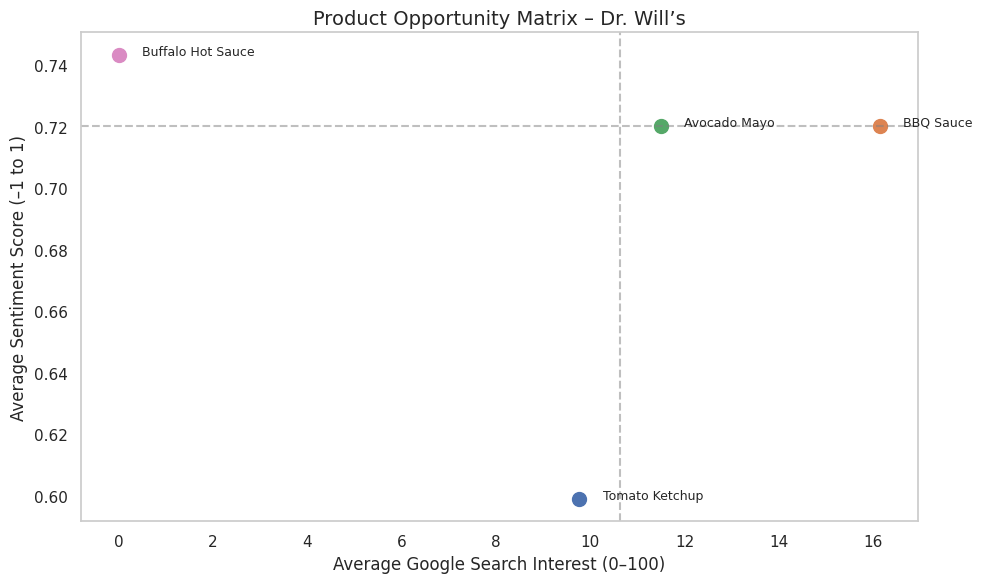

In [276]:
import matplotlib.pyplot as plt

# Filter only products with at least one of the two scores
filtered_df = comparison_df.dropna(subset=['Avg_Search_Interest', 'Avg_Sentiment'], how='all')

# Scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot product points
for i, row in filtered_df.iterrows():
    ax.scatter(row['Avg_Search_Interest'], row['Avg_Sentiment'], s=100)
    ax.text(row['Avg_Search_Interest'] + 0.5, row['Avg_Sentiment'], row['Product'], fontsize=9)

# Axis labels
ax.set_xlabel('Average Google Search Interest (0–100)', fontsize=12)
ax.set_ylabel('Average Sentiment Score (–1 to 1)', fontsize=12)
ax.set_title("Product Opportunity Matrix – Dr. Will’s", fontsize=14)

# Optional: reference lines (median)
search_median = filtered_df['Avg_Search_Interest'].median()
sentiment_median = filtered_df['Avg_Sentiment'].median()
ax.axvline(search_median, color='grey', linestyle='--', alpha=0.5)
ax.axhline(sentiment_median, color='grey', linestyle='--', alpha=0.5)

# Grid
ax.grid(True)
plt.tight_layout()
plt.grid(False)
plt.show()
